<a href="https://colab.research.google.com/github/Saurabh-Hase/capstone3_Bank-marketing-effectiveness-prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [119]:
import pandas as pd
import numpy as np

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
#Importing CSV File
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Supervised Leaning Classification/Copy of bank-full.csv',delimiter=';')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [122]:
    df.describe(include='all')

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    45211  45211     45211  45211.000000  45211  45211.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     25130  37967     29285           NaN  13766           NaN   
mean       NaN    NaN       NaN     15.806419    NaN    258.163080   
std        NaN    NaN       NaN      8.322476    NaN    257.527812   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    319.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN    36959  39922  
mean        2.763841     40.197828      0.580323      NaN    NaN  
std         3.098021    100.128746      2.303441      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

In [124]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [125]:
# checking for duplicate values
df.duplicated().sum()

0

0

In [126]:
# Renaming the output variable
df.rename(columns = {'y':'deposit'},inplace = True)

In [127]:
df.head(1)

age         job  marital education default  balance housing loan  contact  \
0   58  management  married  tertiary      no     2143     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may       261         1     -1         0  unknown      no

age         job  marital education default  balance housing loan  contact  \
0   58  management  married  tertiary      no     2143     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may       261         1     -1         0  unknown      no

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Handling class imbalaance
df['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

no     39922
yes     5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

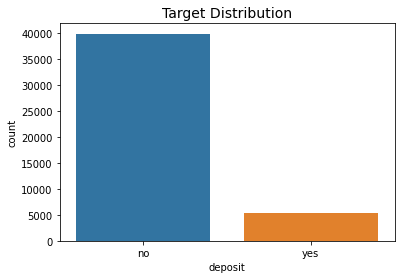

Text(0.5, 1.0, 'Target Distribution')

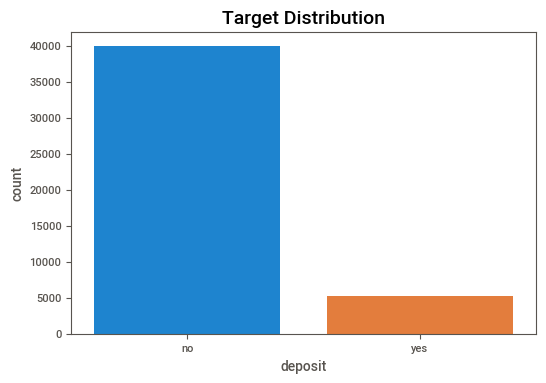

In [130]:
sns.countplot(df['deposit'])
plt.title("Target Distribution", fontsize=14)

In [131]:
num_var= df.select_dtypes(include='int64')
cat_var = df.select_dtypes(include = 'object')


In [132]:
cat_var

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome deposit  
0       may  unknown      no  
1       may  unknown      no  
2       may  unknown      no  
3       may  unknown      no  
4       may  unknown      no  
...     ...      ...     ...  
45206   nov  unknown     yes  
45207   nov  unknown     yes  
45208   nov  success     yes  
45209   nov  unknown      no  
45210   nov    other      no  

[45211 rows x 10 columns]

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome deposit  
0       may  unknown      no  
1       may  unknown      no  
2       may  unknown      no  
3       may  unknown      no  
4       may  unknown      no  
...     ...      ...     ...  
45206   nov  unknown     yes  
45207   nov  unknown     yes  
45208   nov  success     yes  
45209   nov  unknown      no  
45210   nov    other      no  

[45211 rows x 10 columns]

# Distribution of catagrical variable

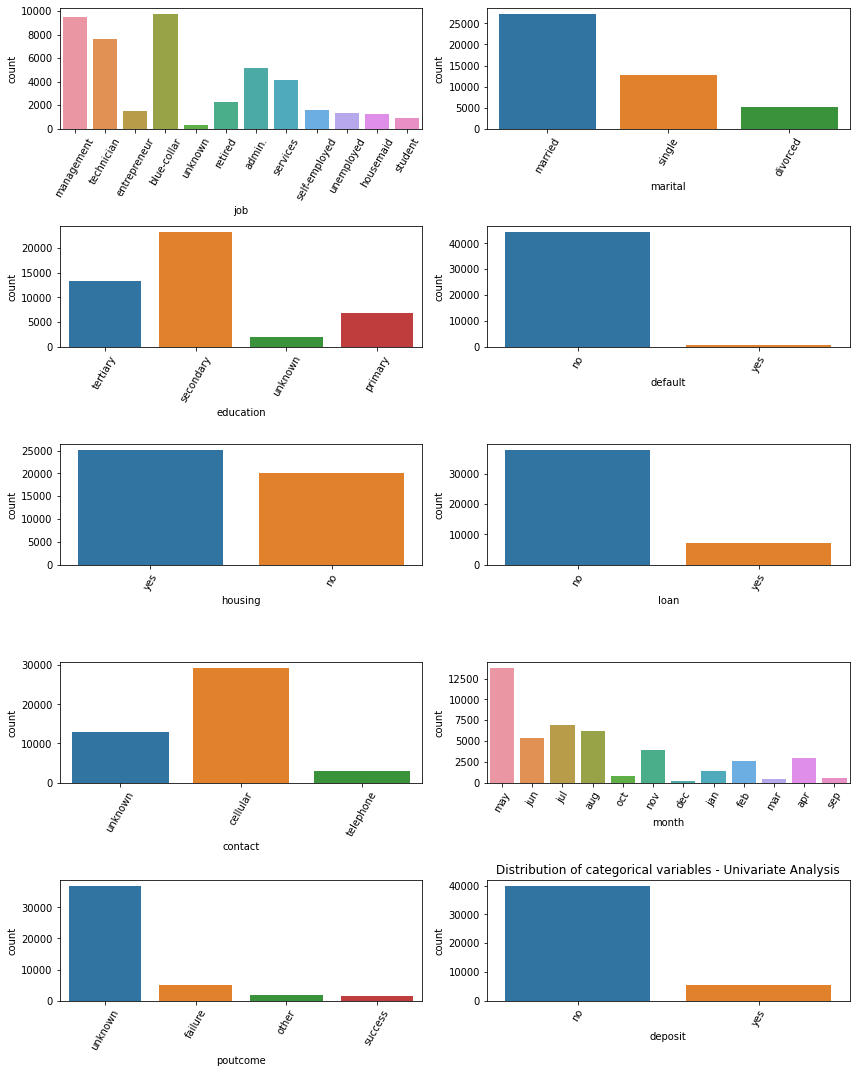

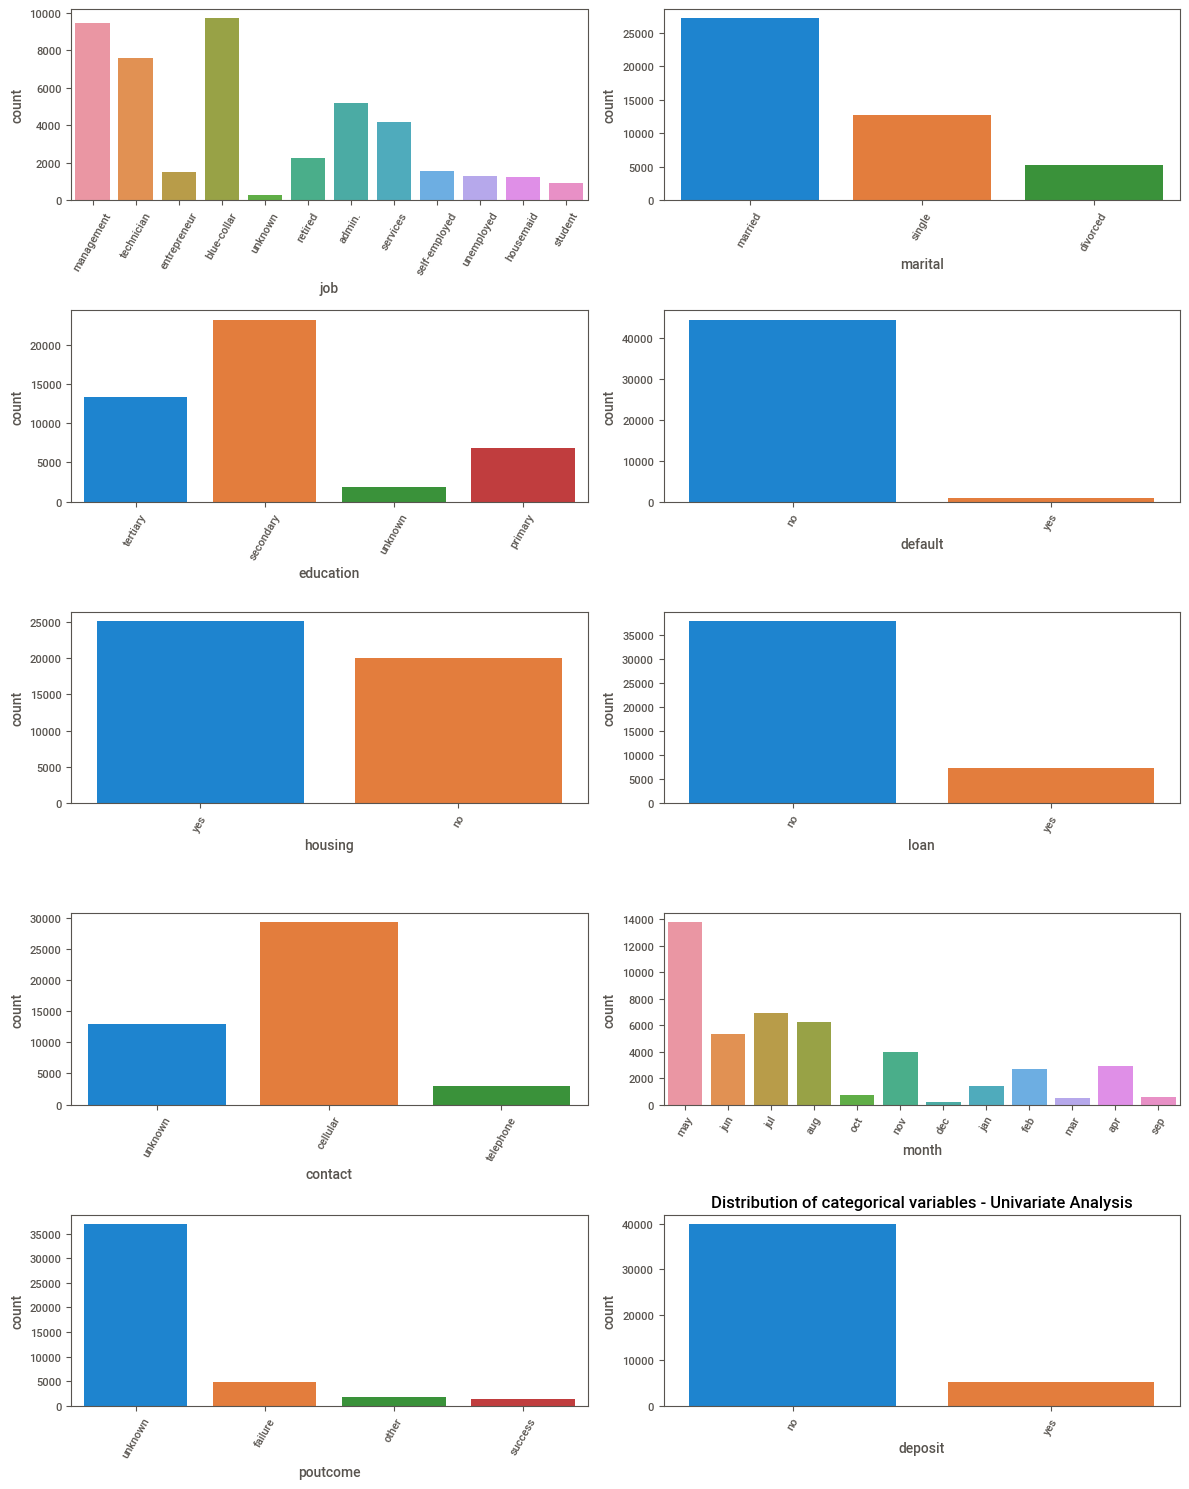

In [133]:
# Cecking Distribution For catagorical variable
fig,ax = plt.subplots(5,2,figsize=(12,15))
for col,subplot in zip(cat_var,ax.flatten()):
    sns.countplot(x = df[col],ax = subplot)
    subplot.tick_params(axis='x', rotation=60)
plt.title('Distribution of categorical variables - Univariate Analysis')
plt.tight_layout()

In [134]:
num_var= df.select_dtypes(include='int64')
columns=num_var.columns
print(columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [135]:
num_var

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

# Distribution of numerical variable

In [136]:
from scipy.stats import norm

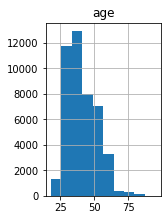

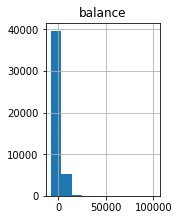

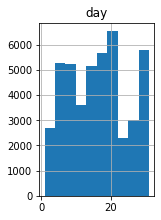

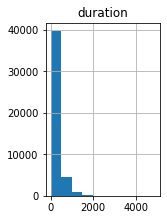

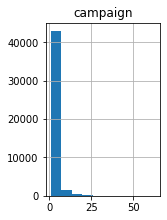

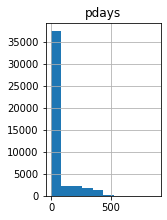

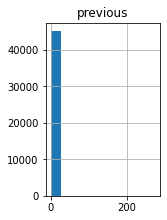

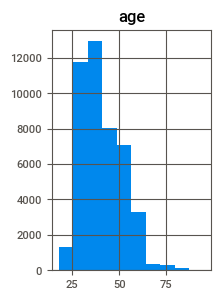

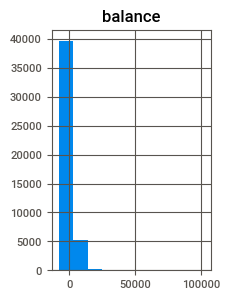

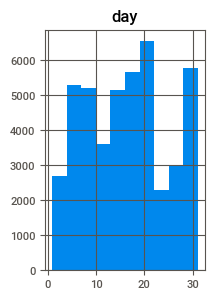

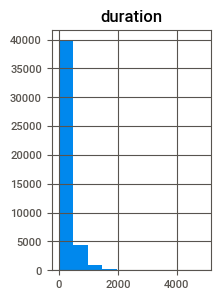

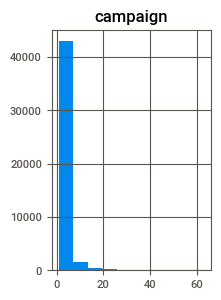

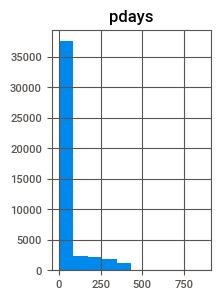

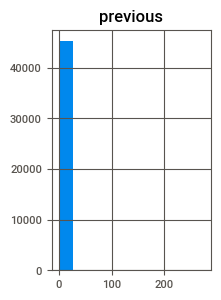

In [137]:
# Checking numerical variables
def plotvariable(df,variable):
  plt.figure(figsize=(7,7))
  plt.subplot(2,3,1)  #means in sub plot 2 row , 3 cloumns and first plot
  df[variable].hist(bins=10)
  plt.title(col)

 

for col in columns[0:7]:
  plotvariable(df,col)

# **EDA Using sweetwiz**

In [138]:
!pip install sweetviz




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



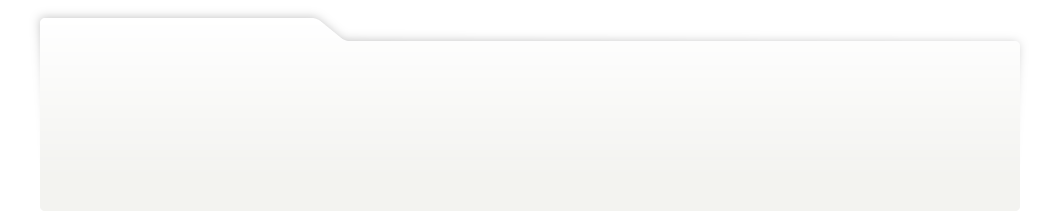
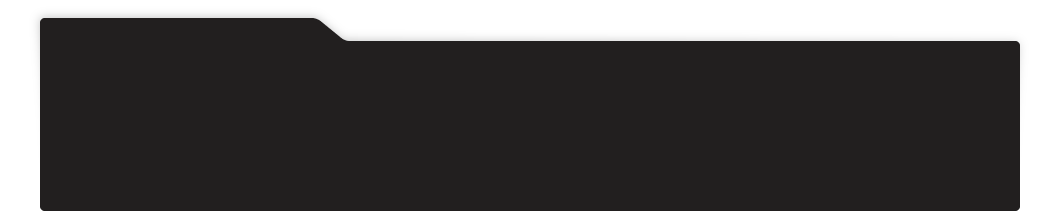
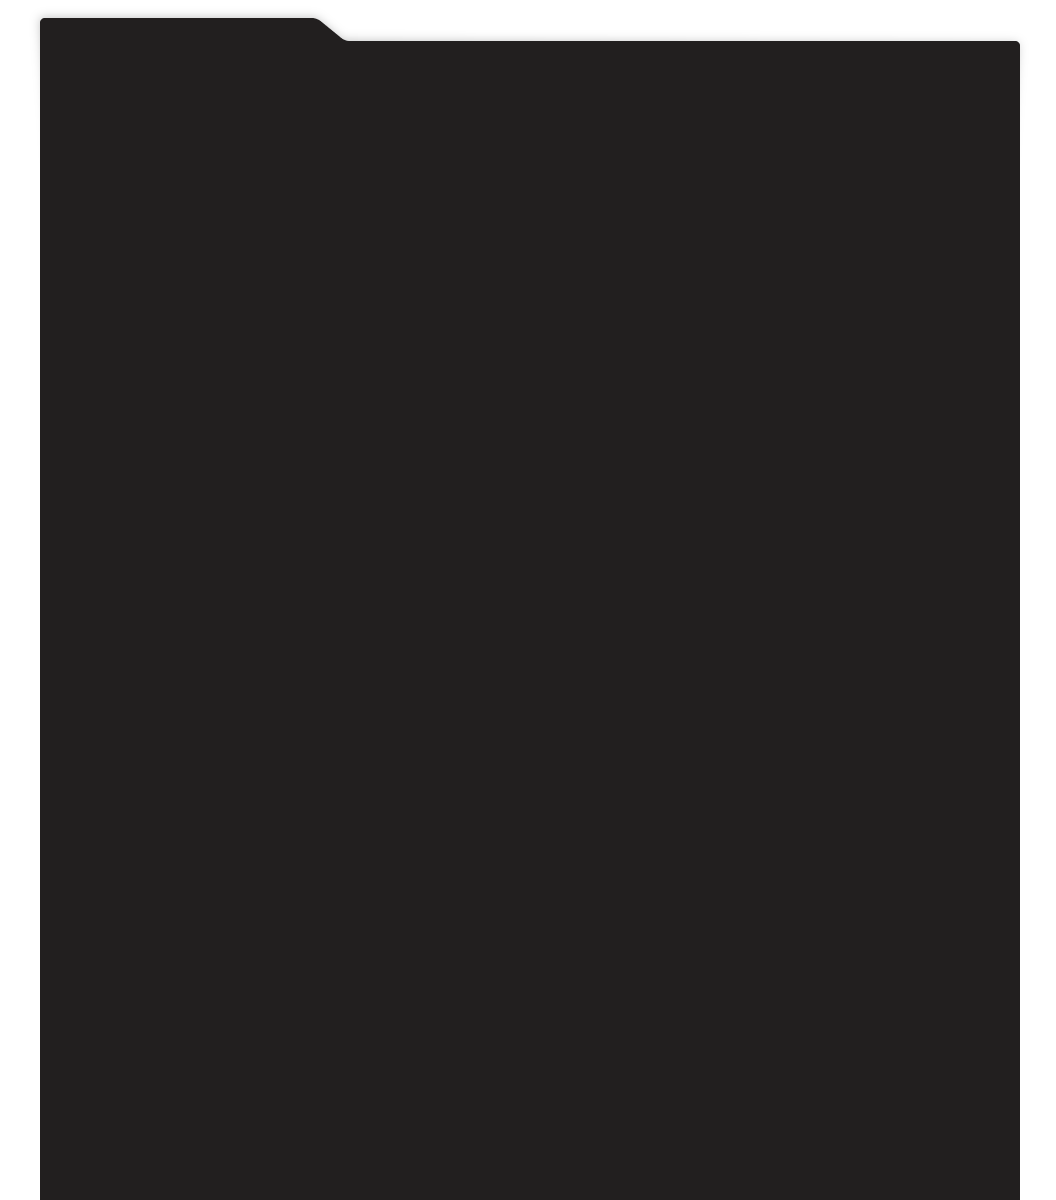
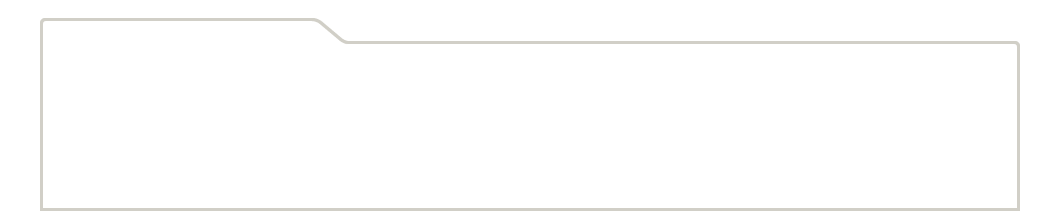
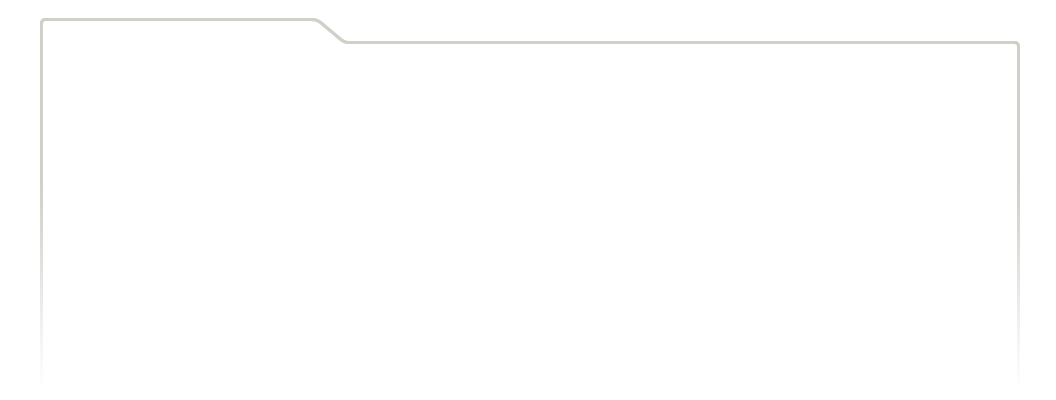
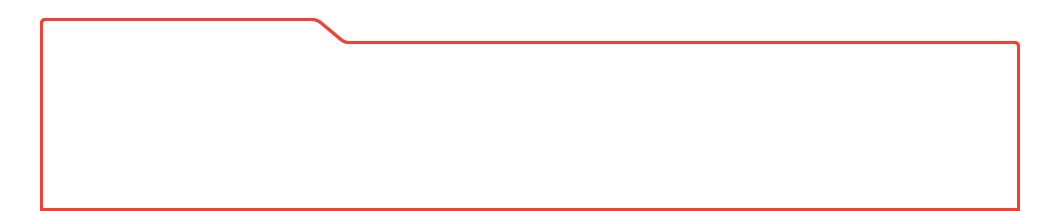
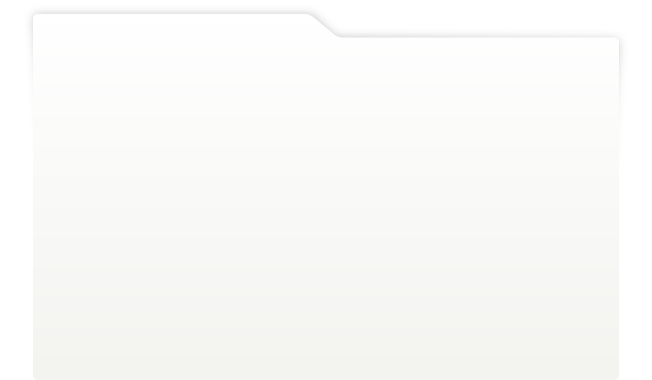
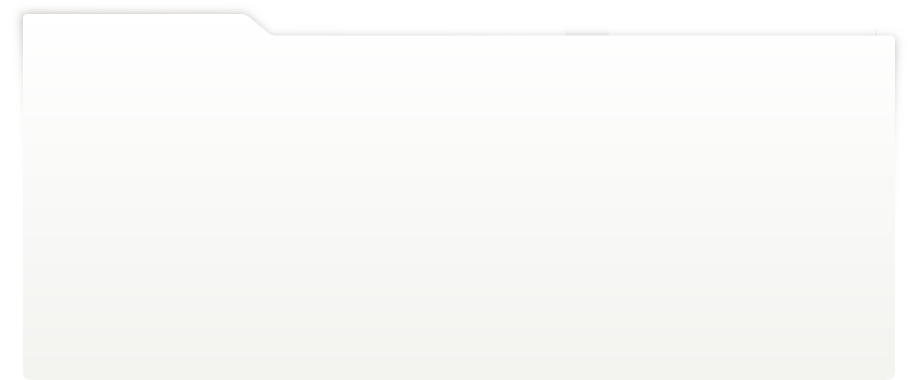
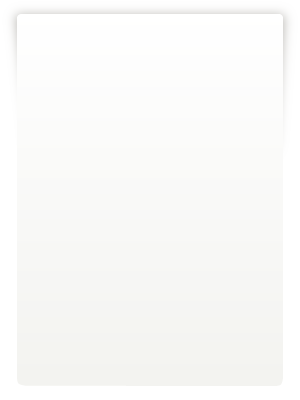
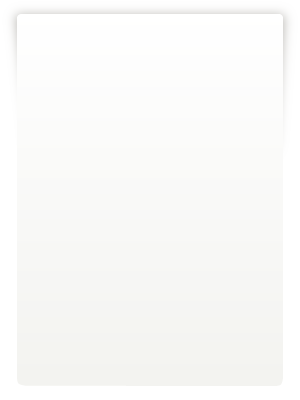
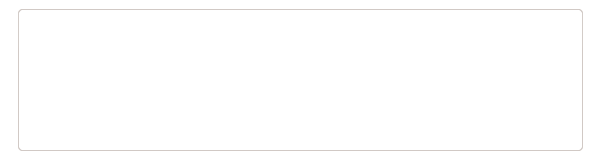
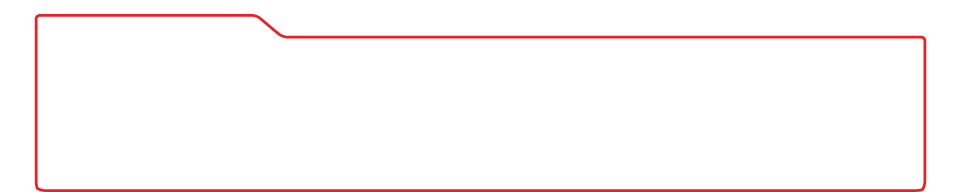
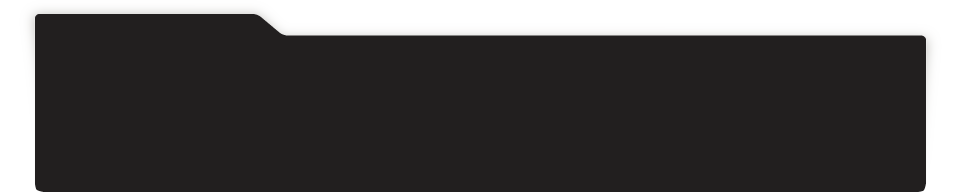
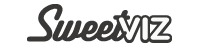
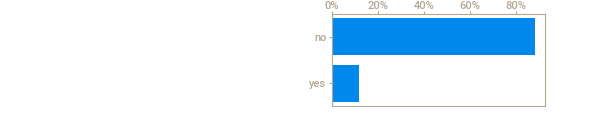
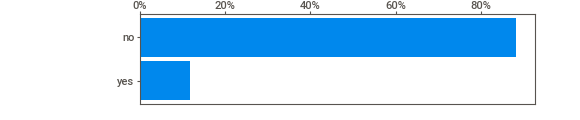
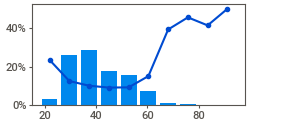
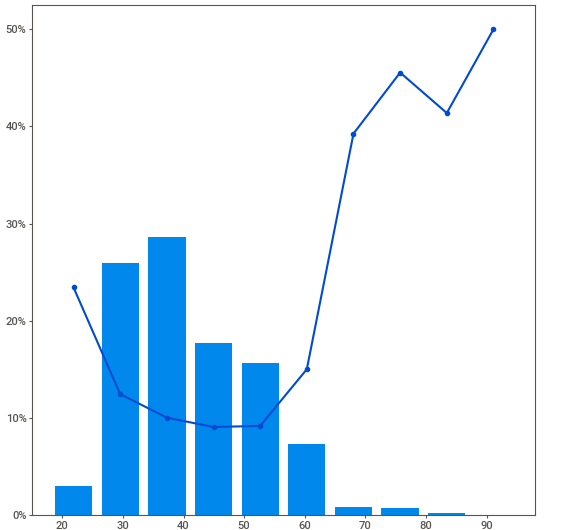
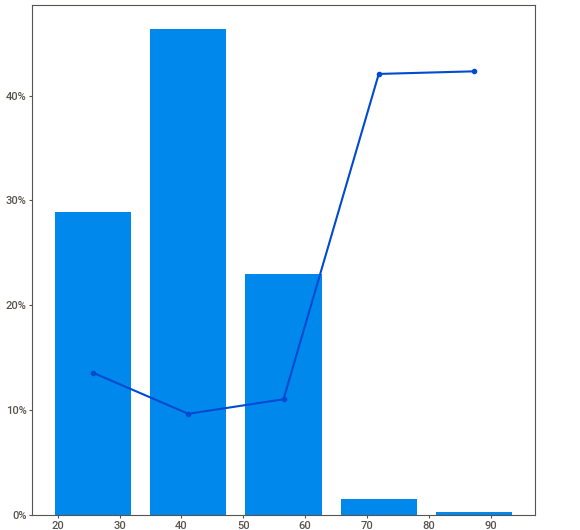
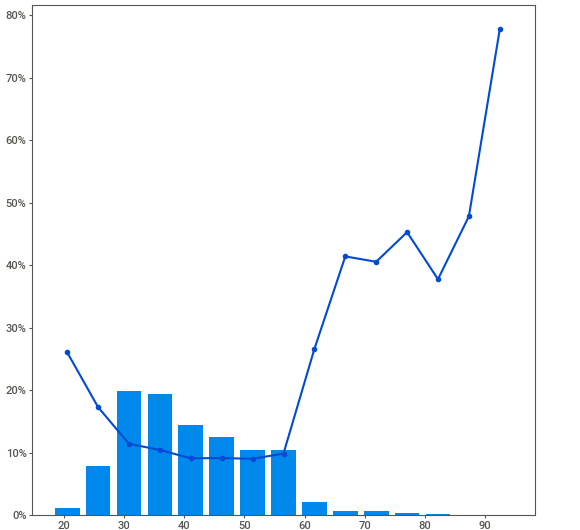
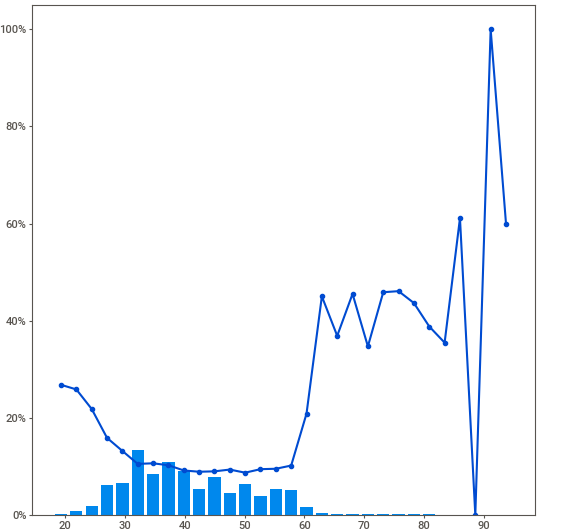
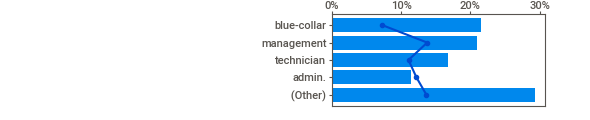
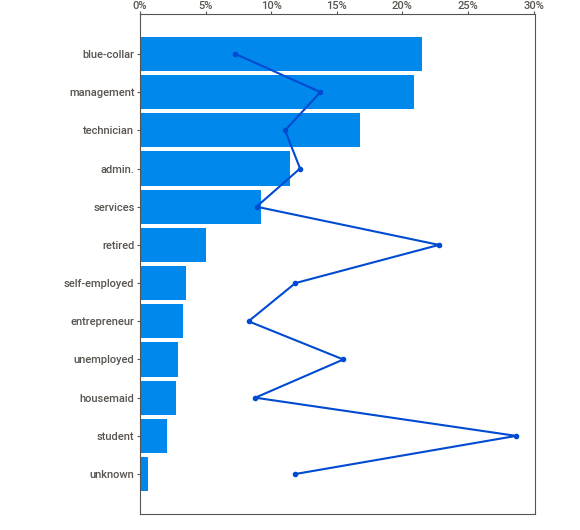
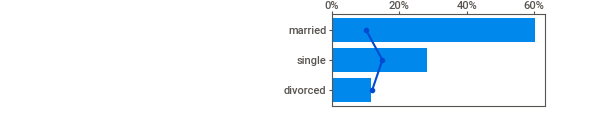
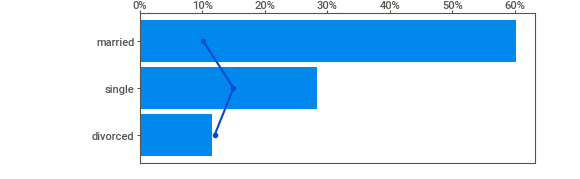
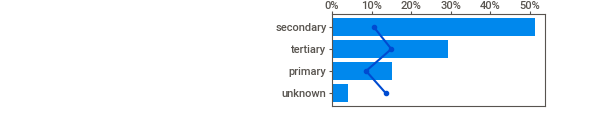
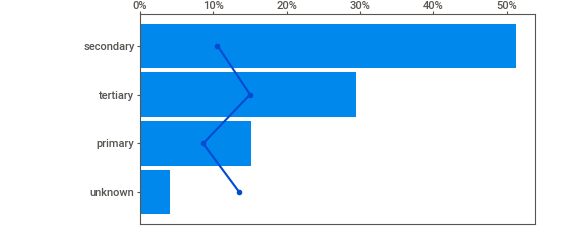
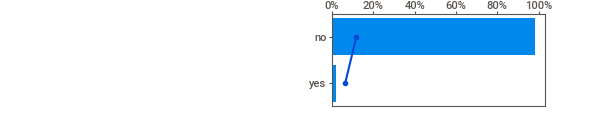
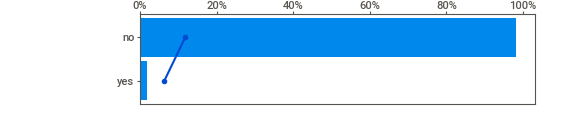
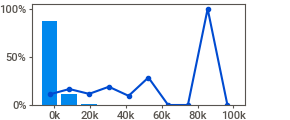
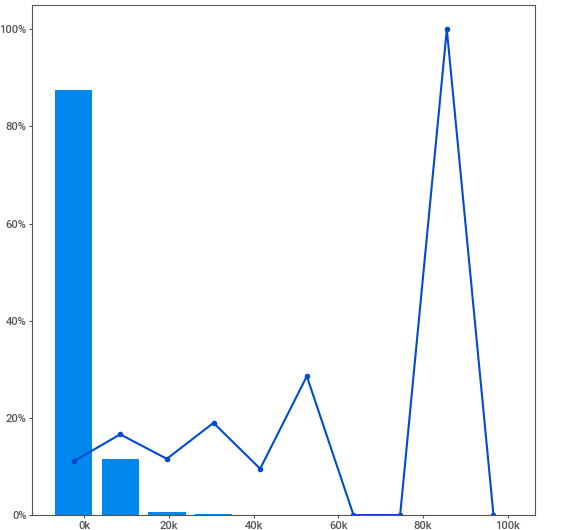
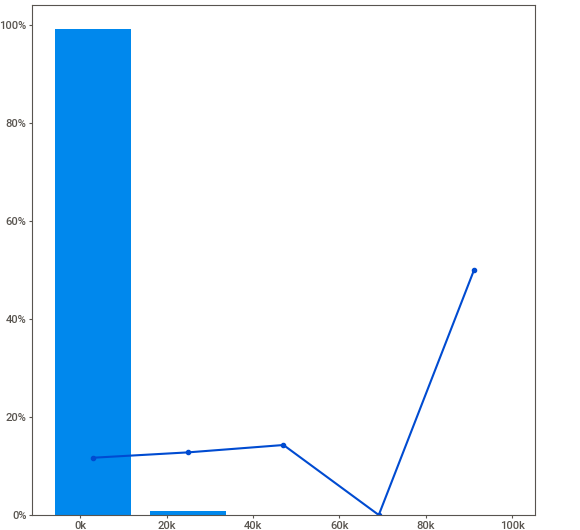
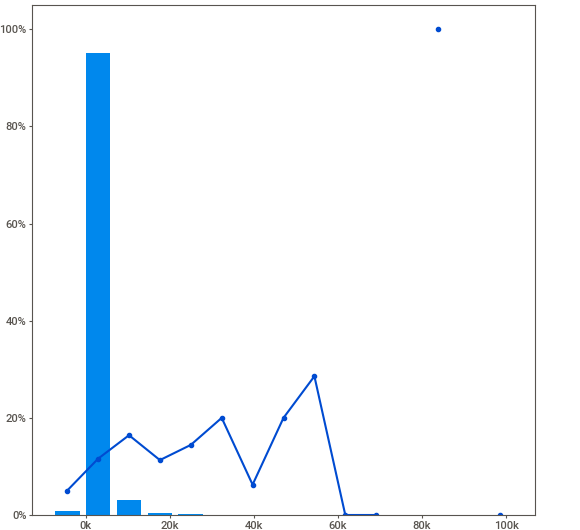
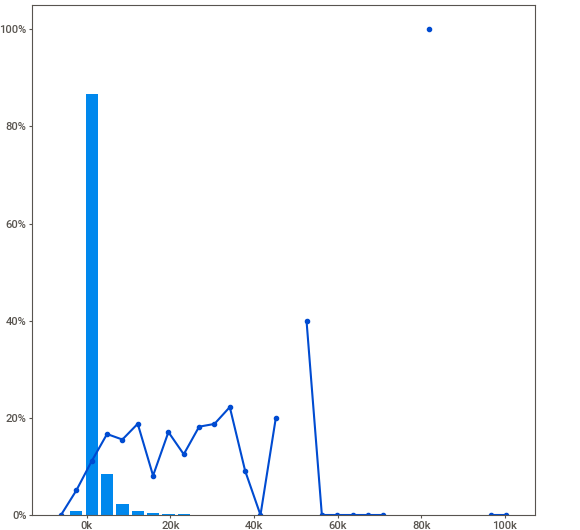
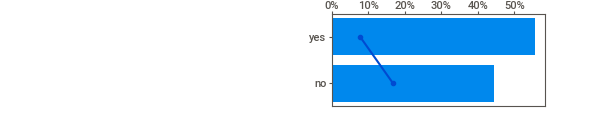
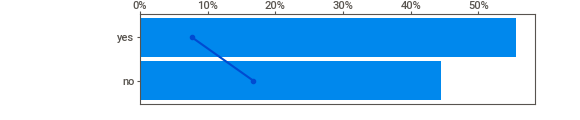
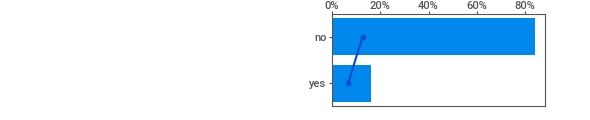
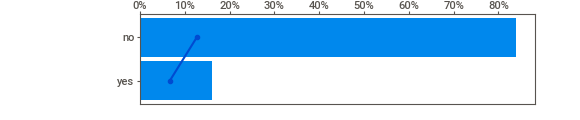
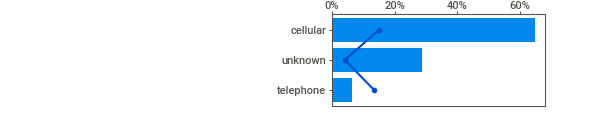
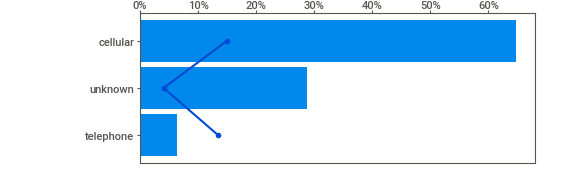
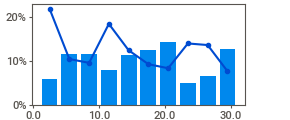
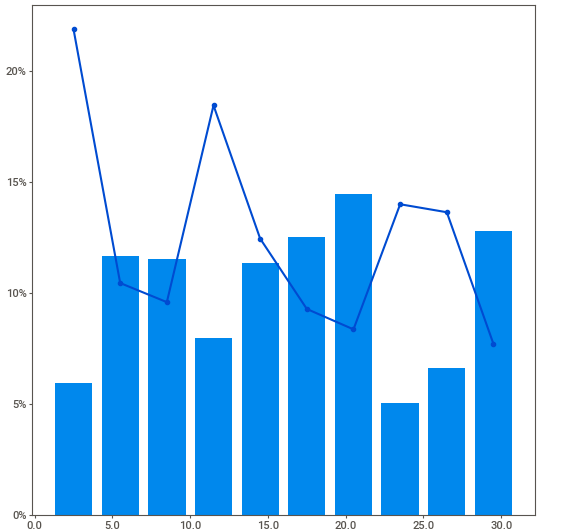
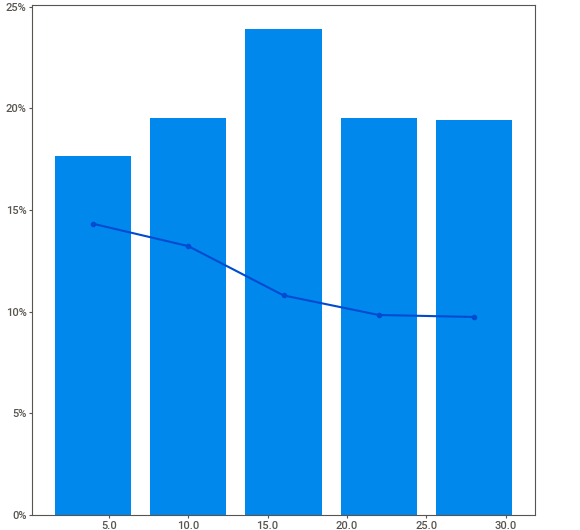
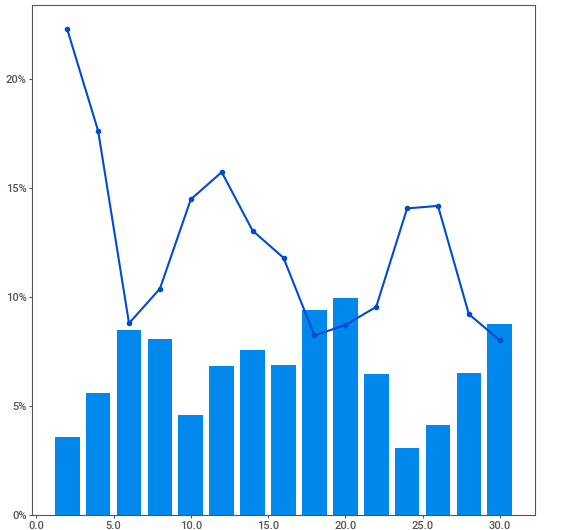
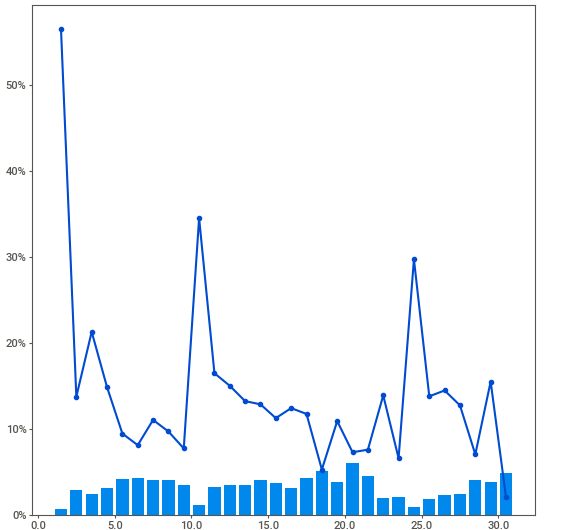
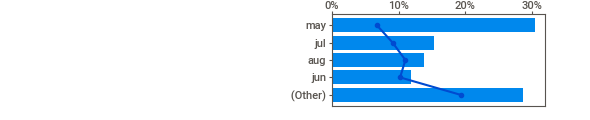
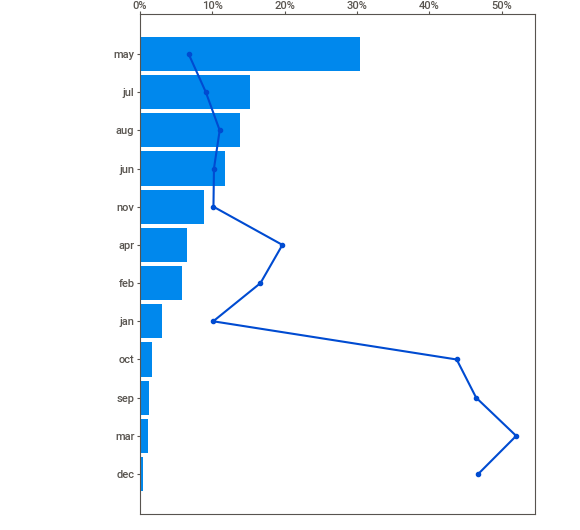
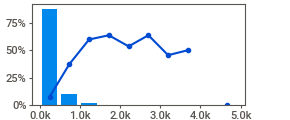
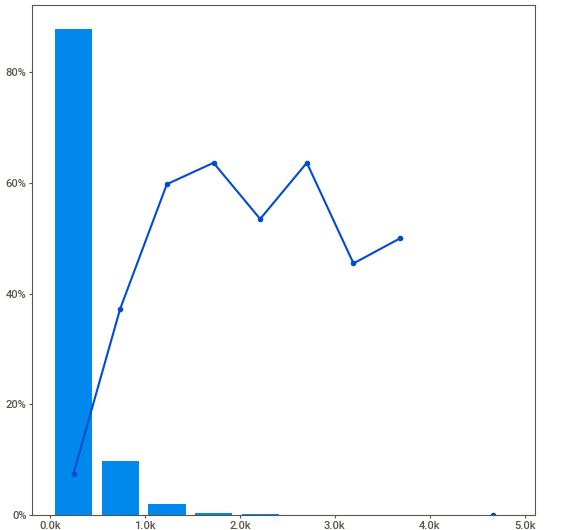
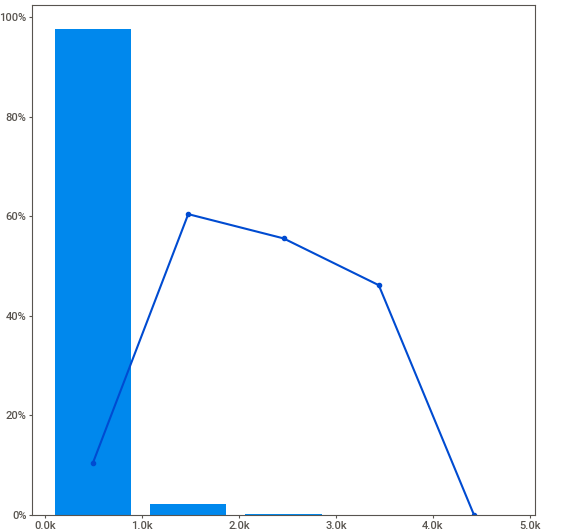
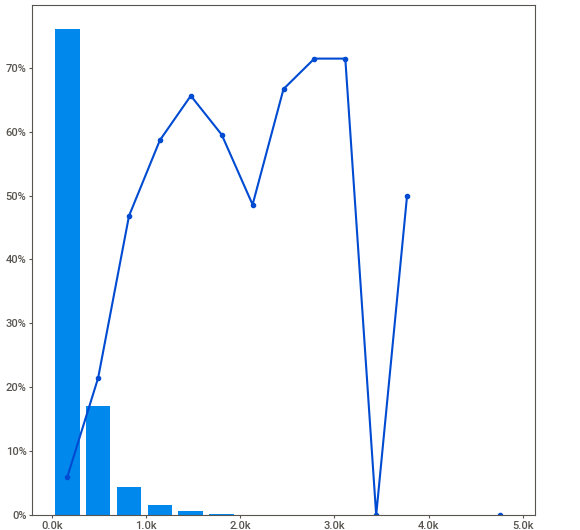
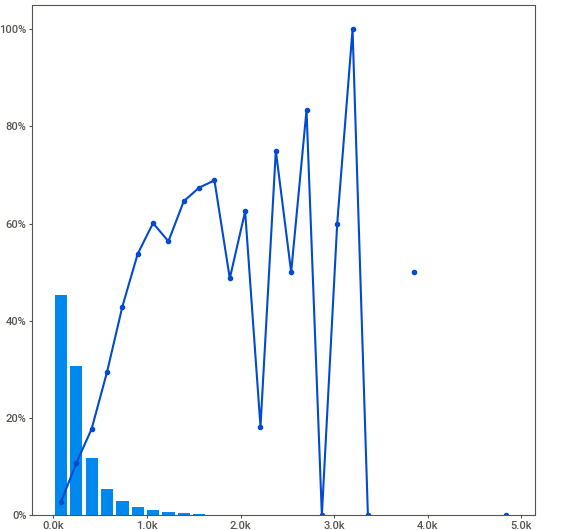
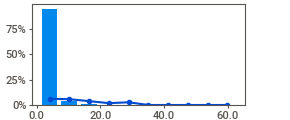
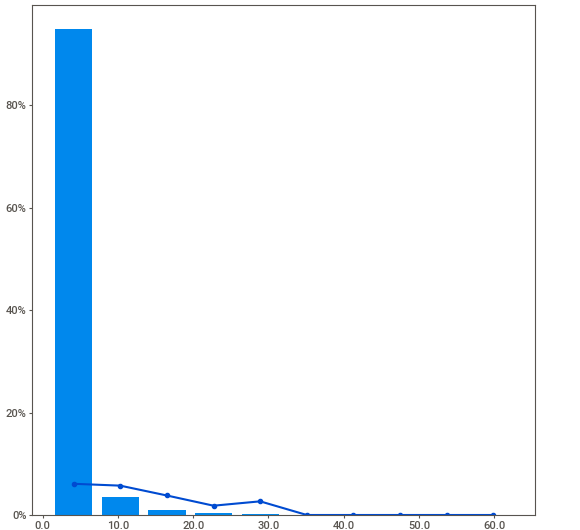
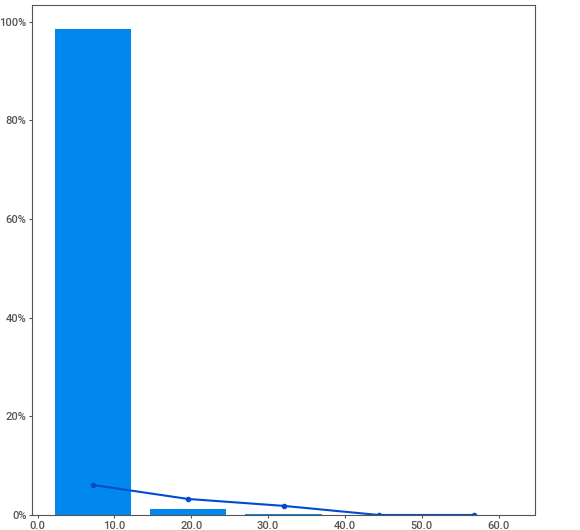
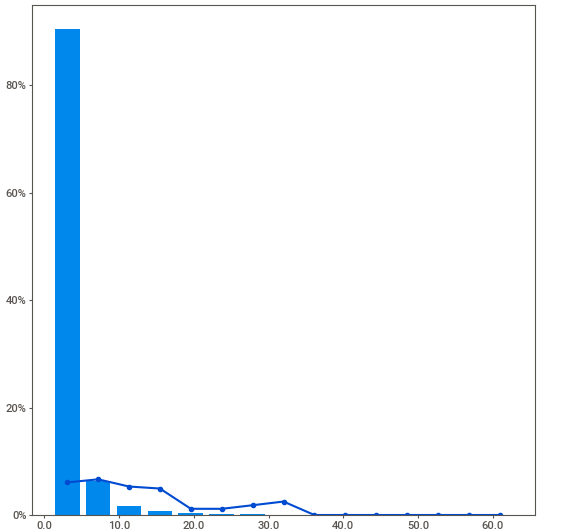
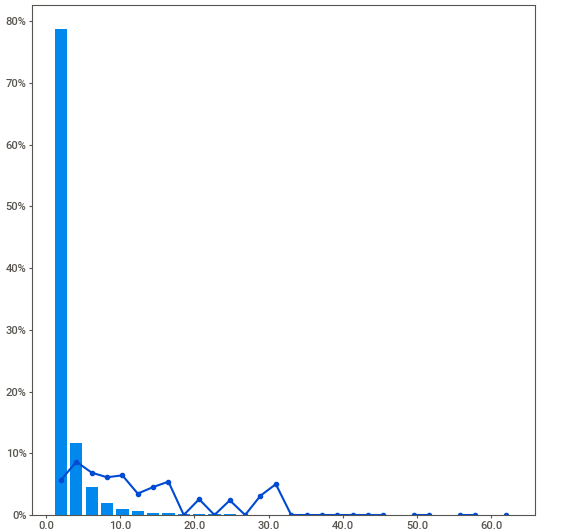
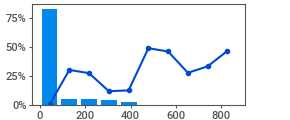
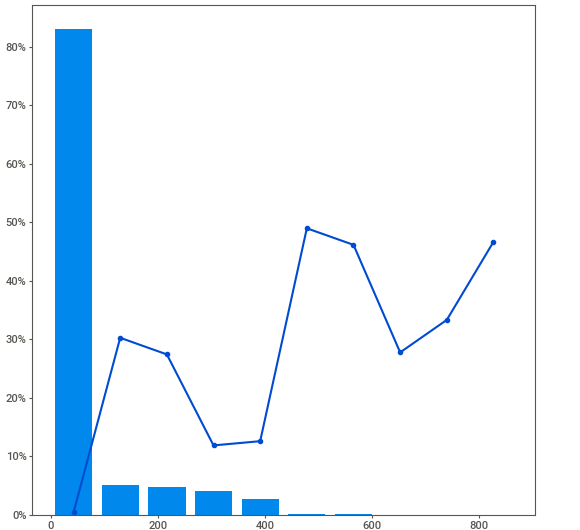
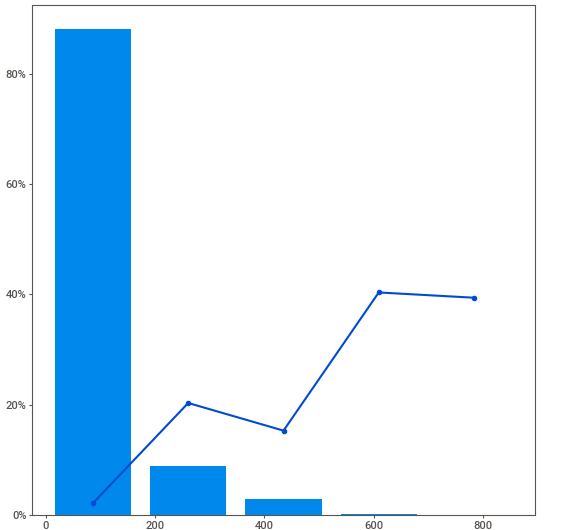
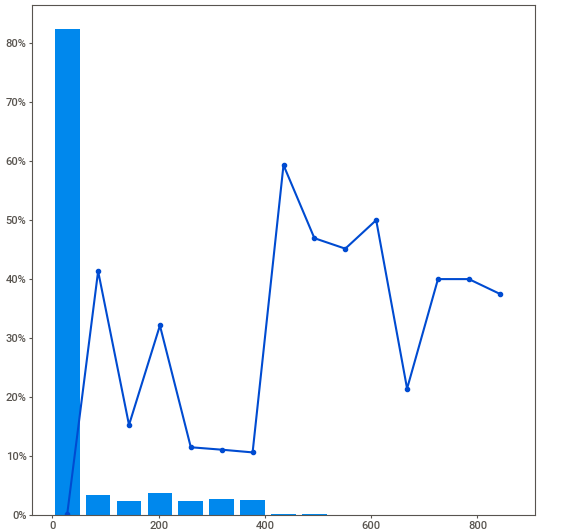
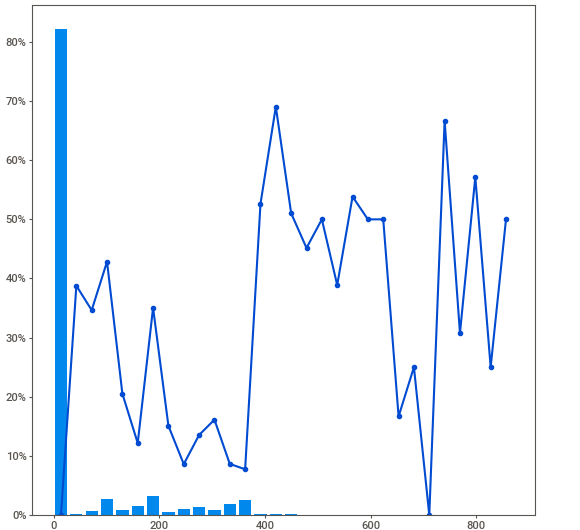
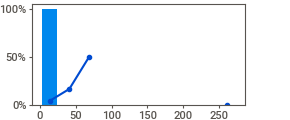
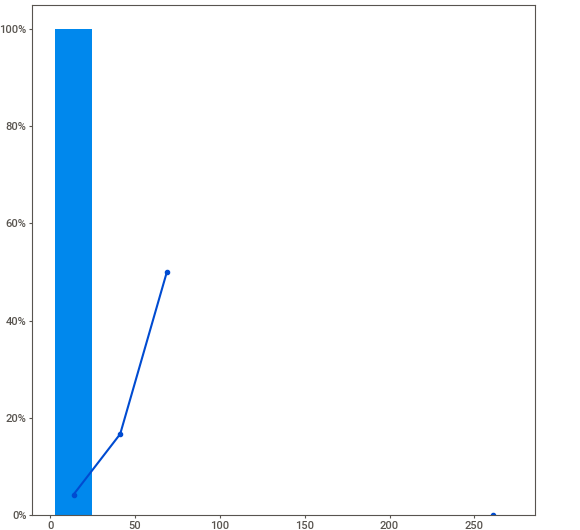
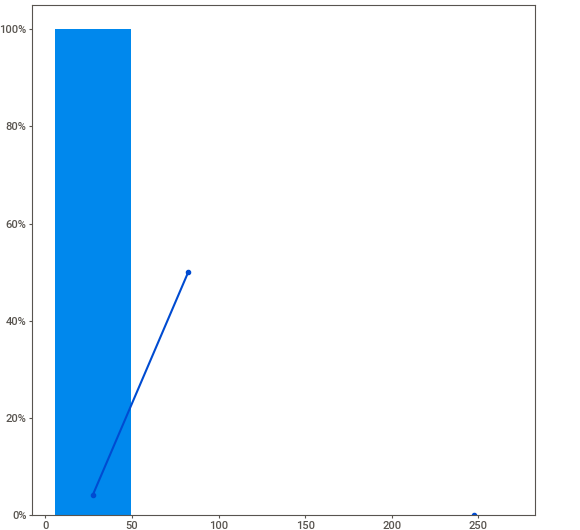
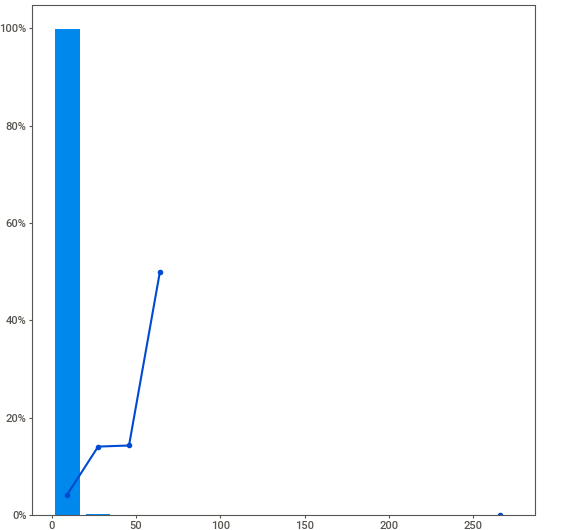
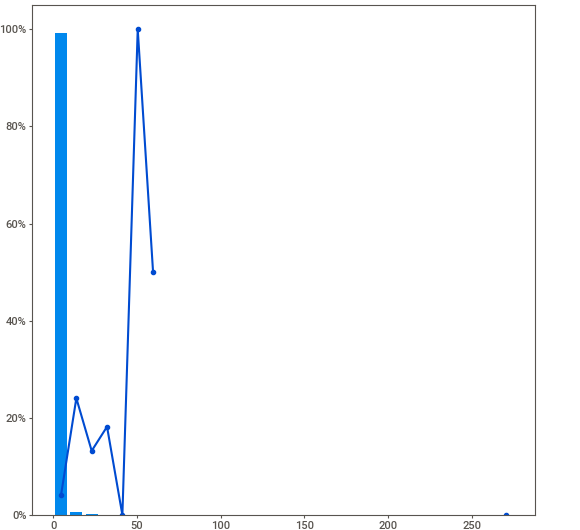
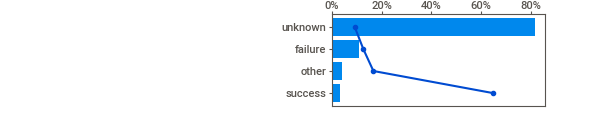
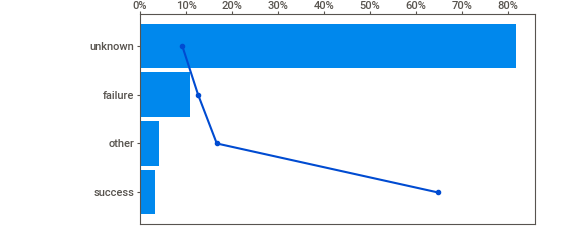
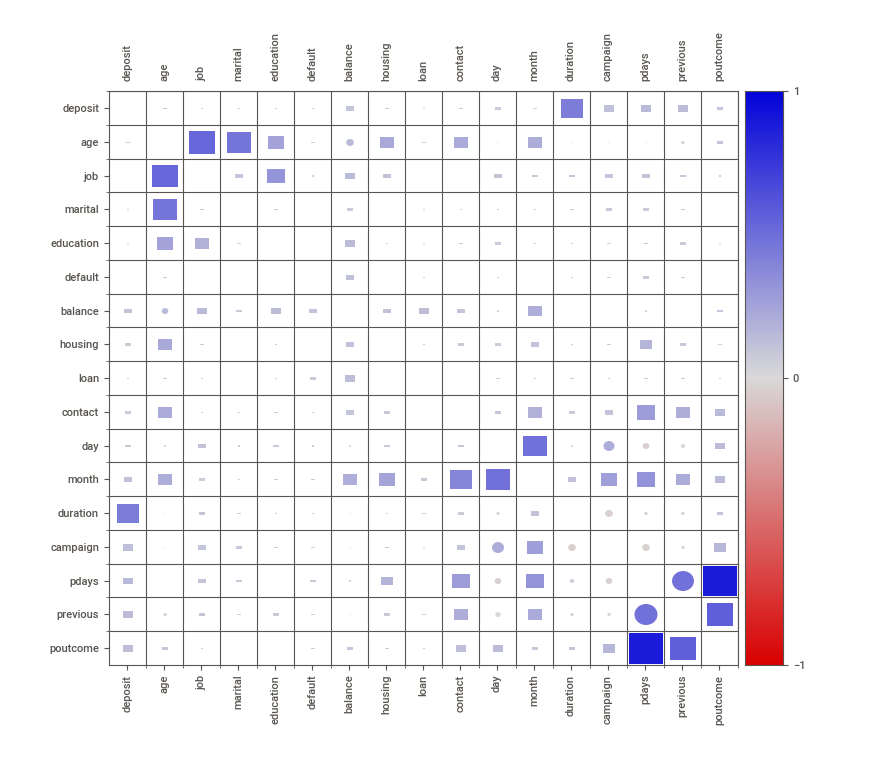
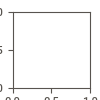

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



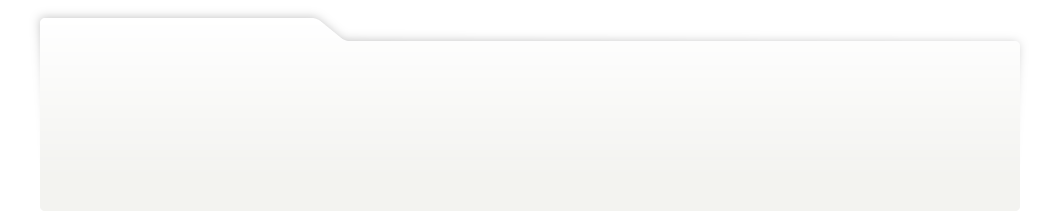
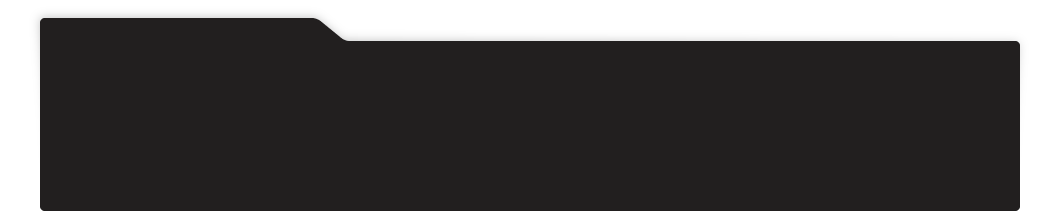
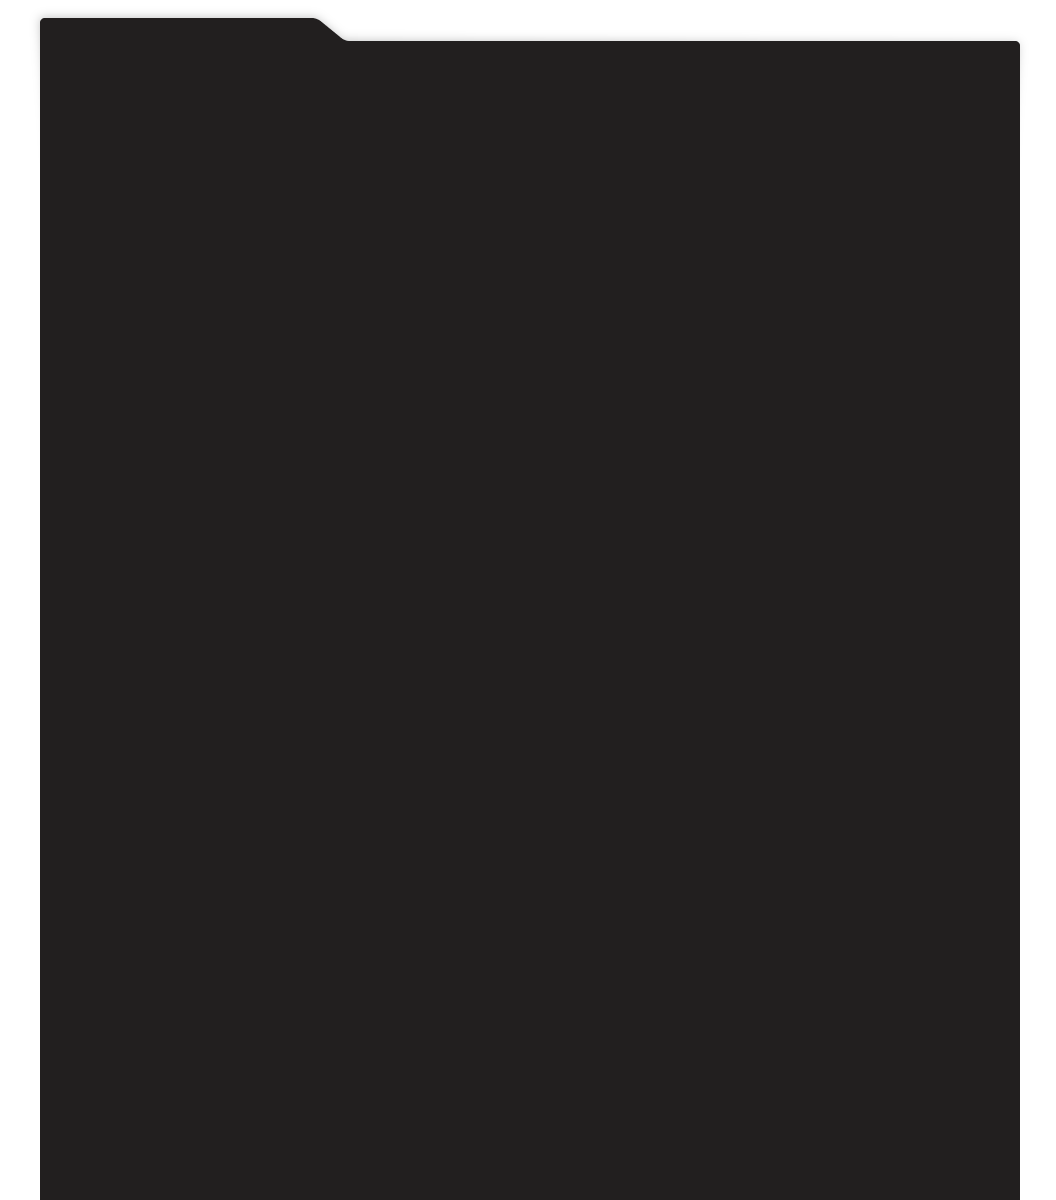
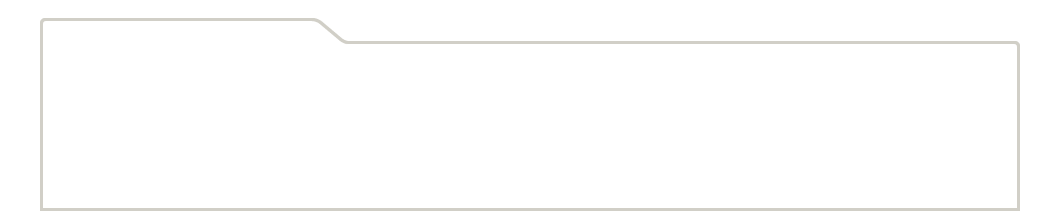
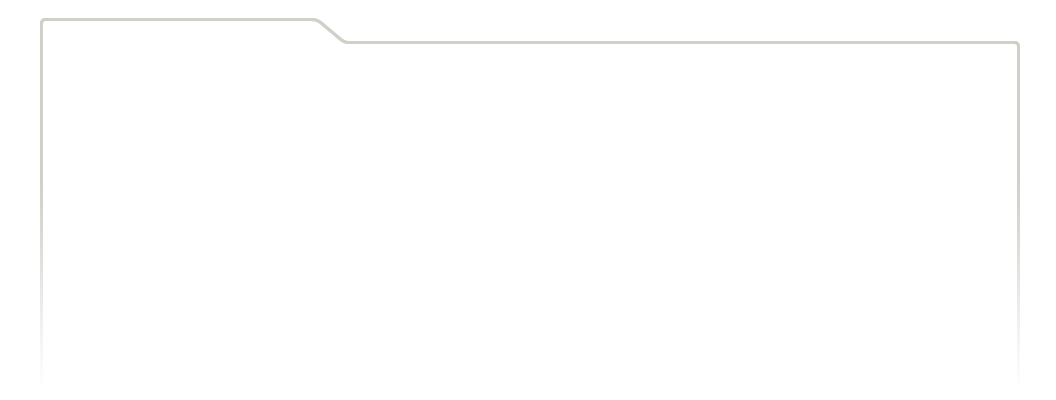
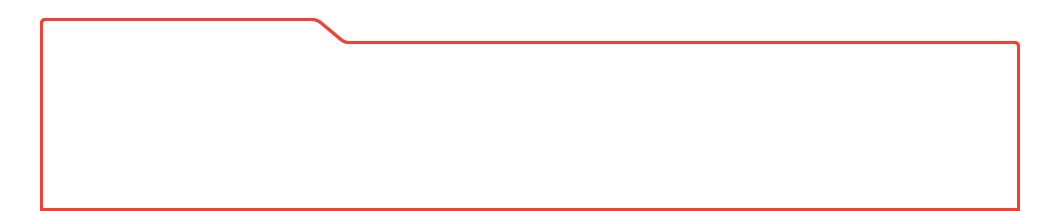
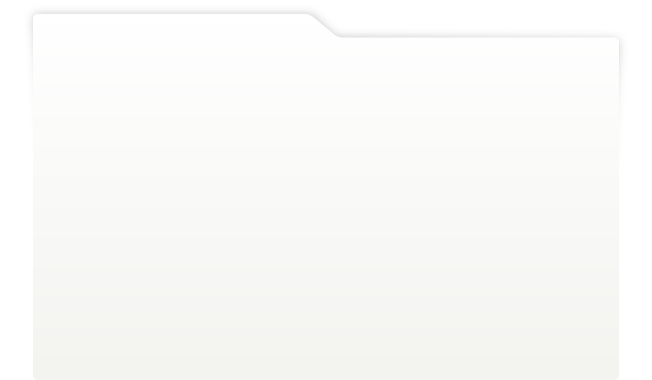
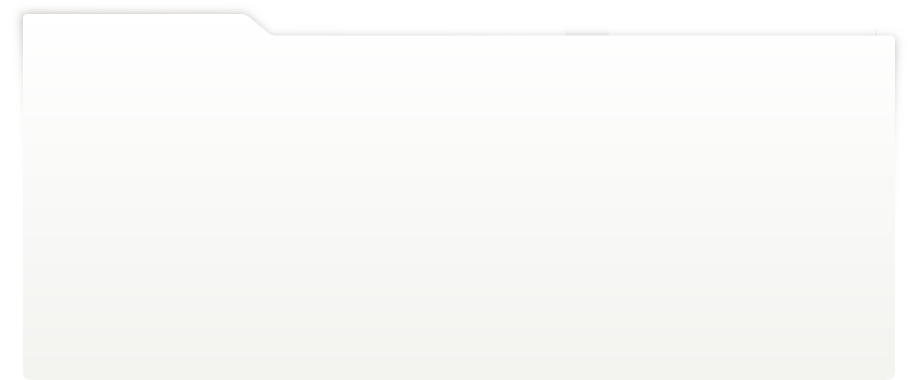
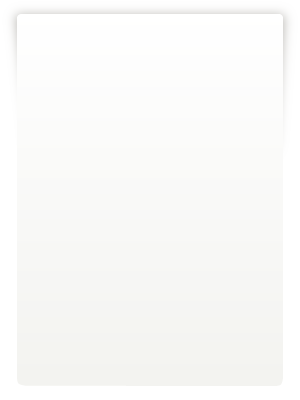
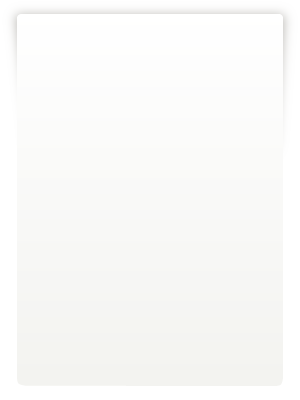
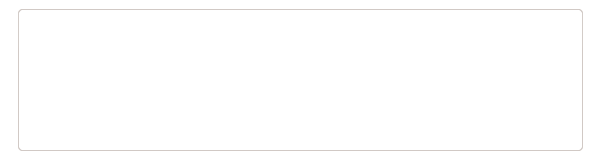
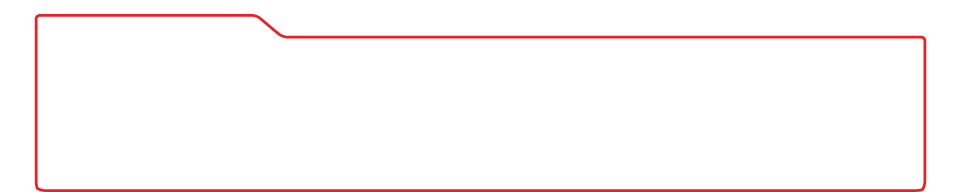
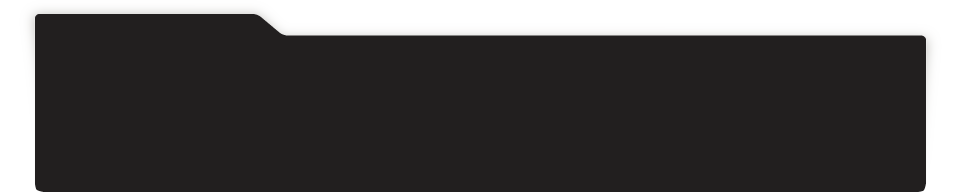
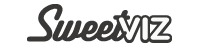
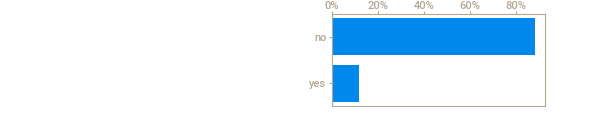
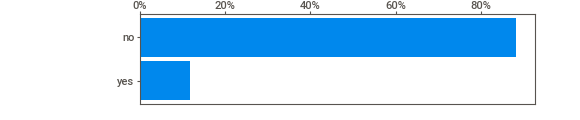
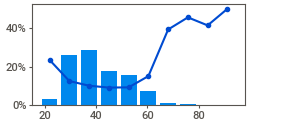
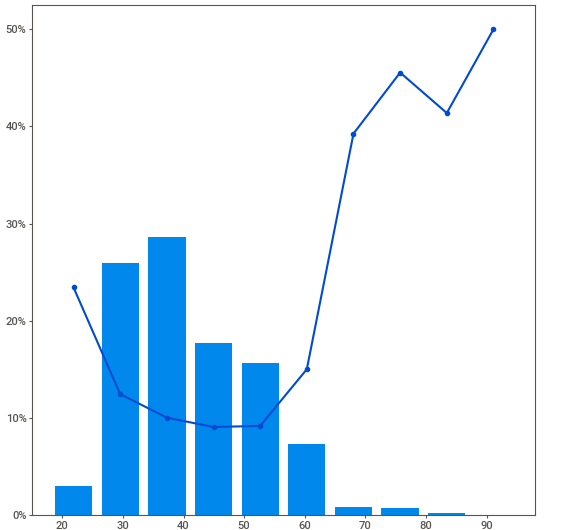
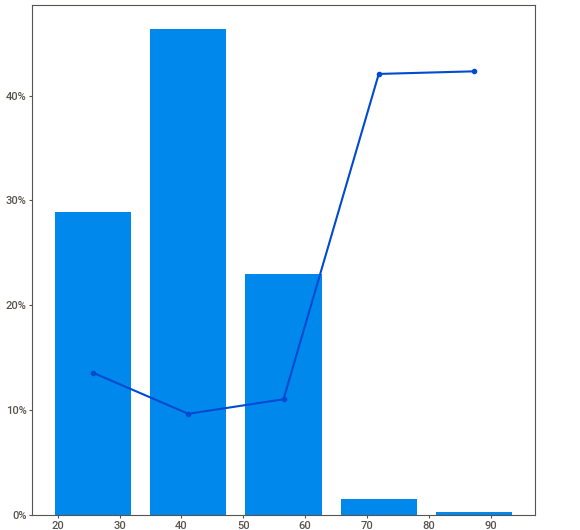
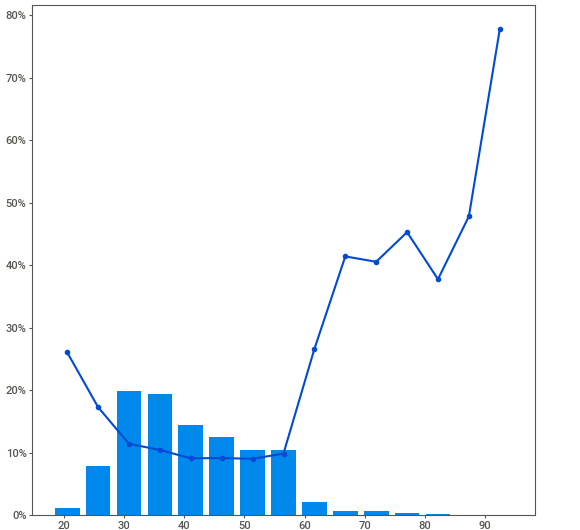
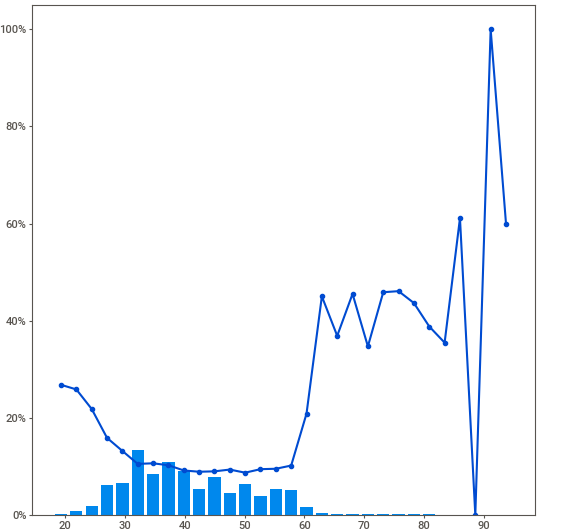
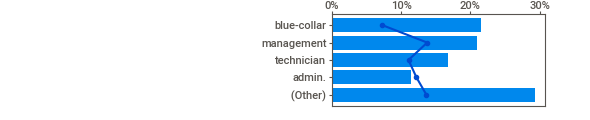
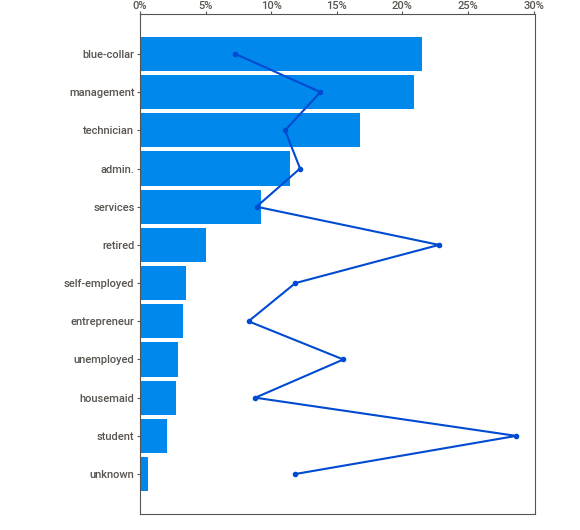
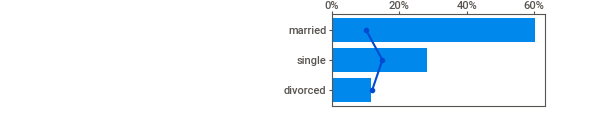
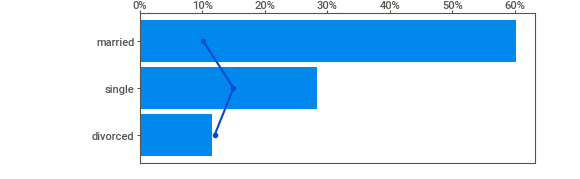
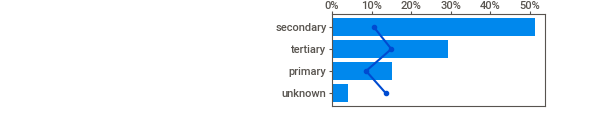
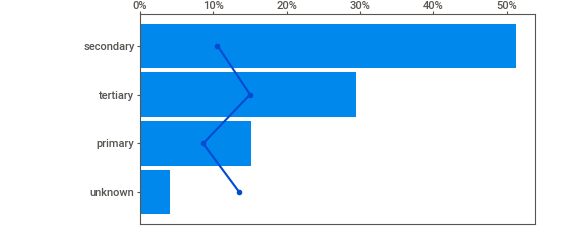
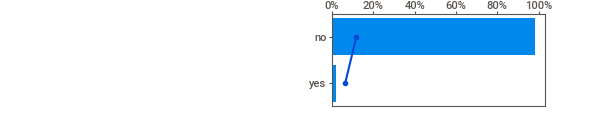
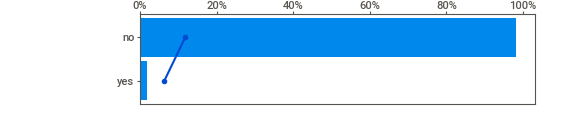
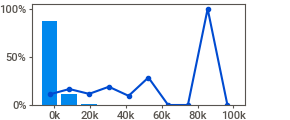
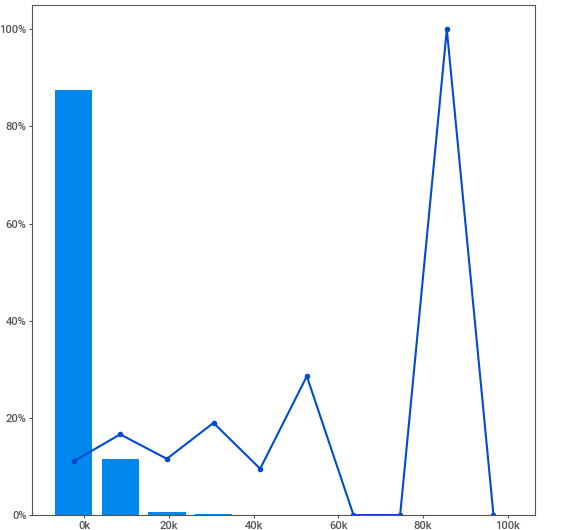
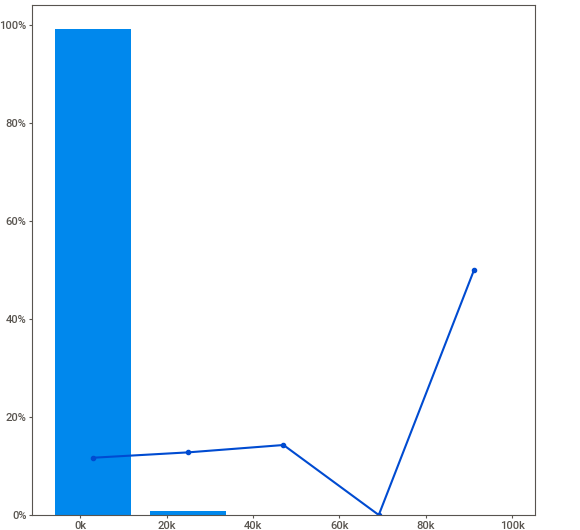
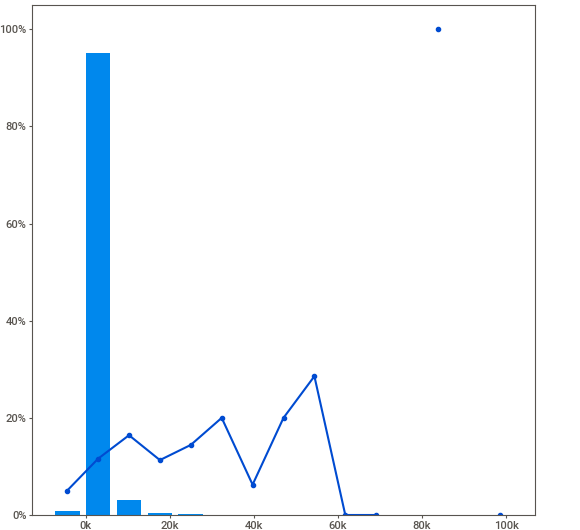
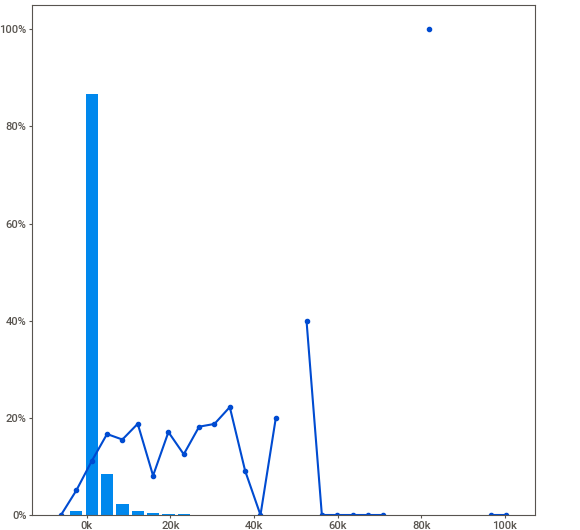
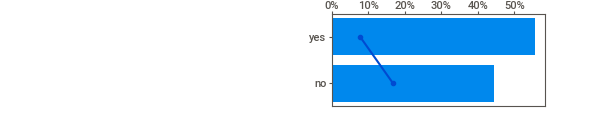
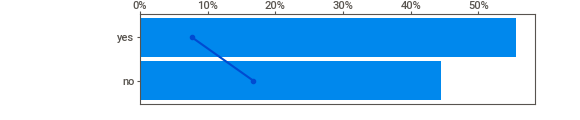
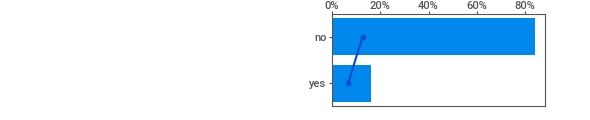
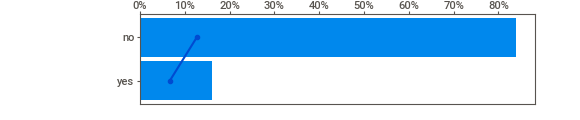
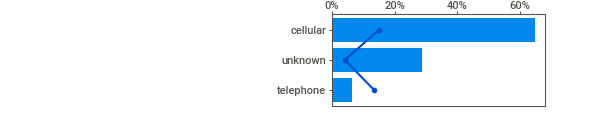
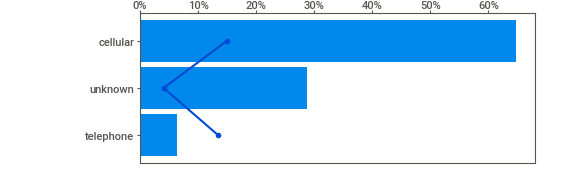
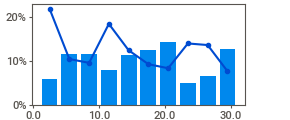
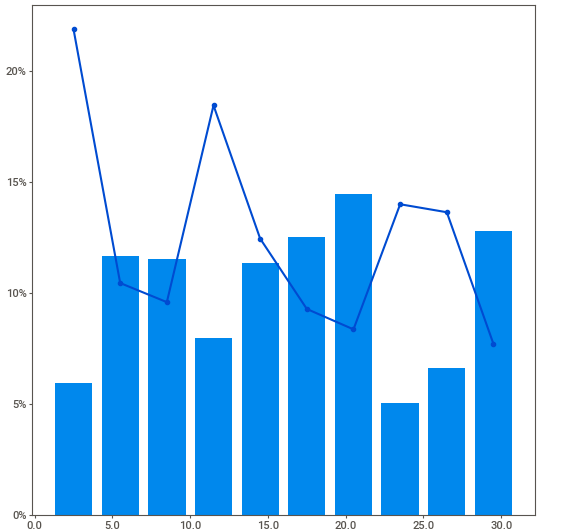
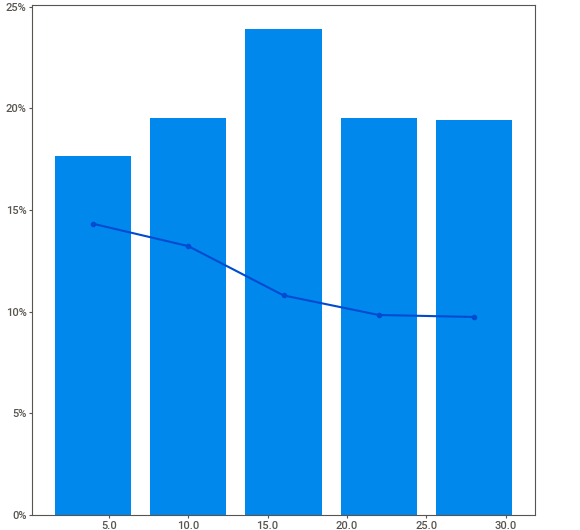
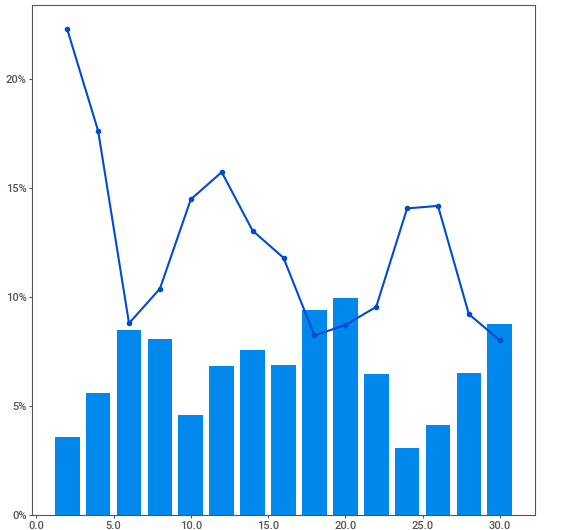
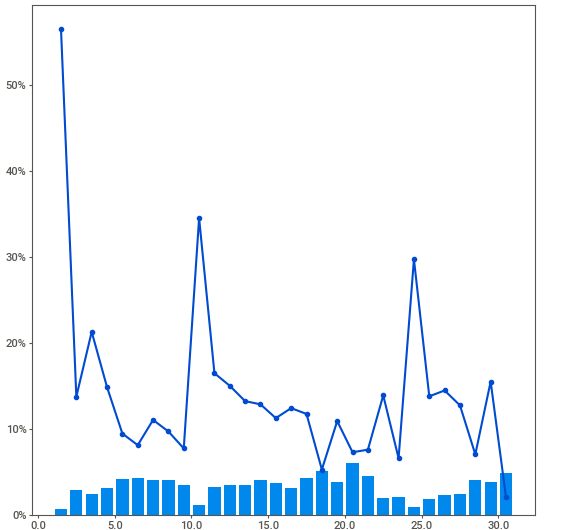
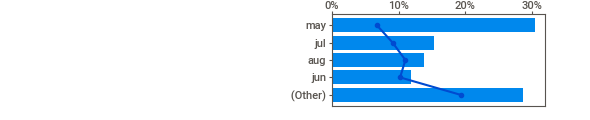
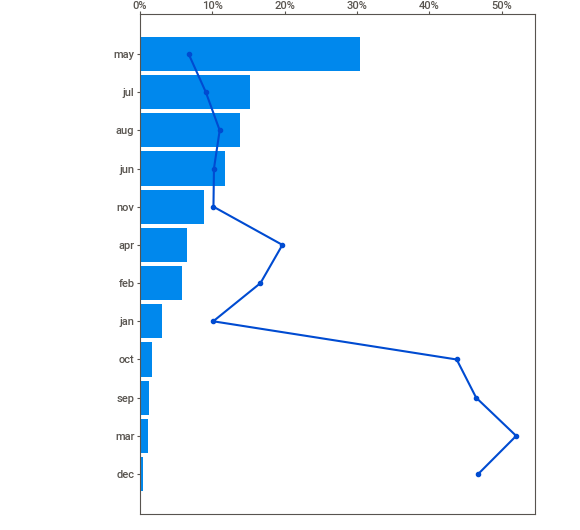
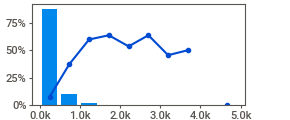
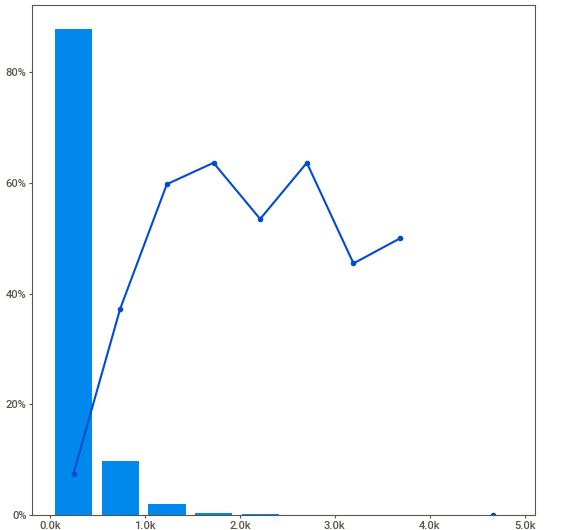
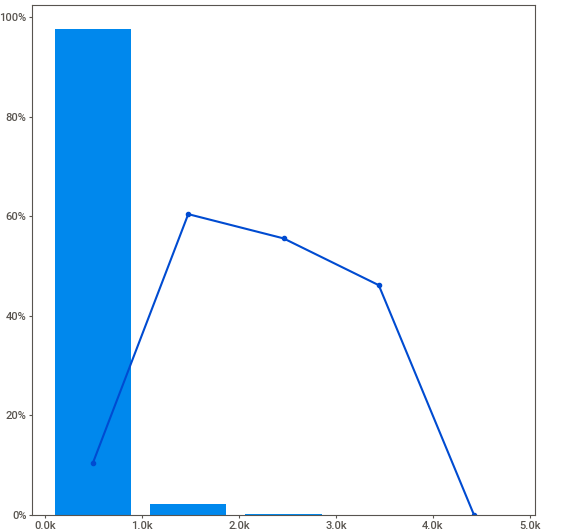
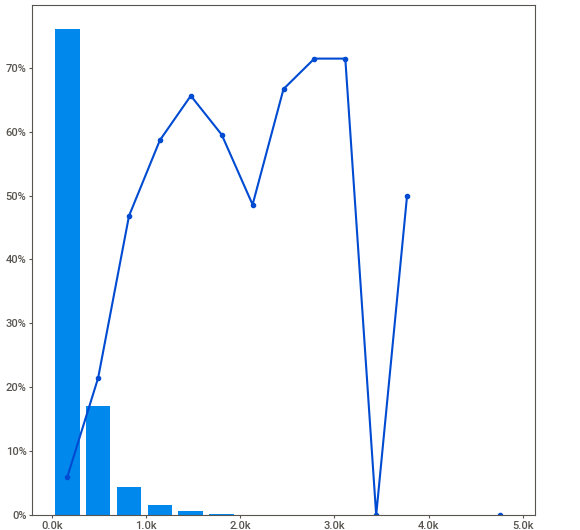
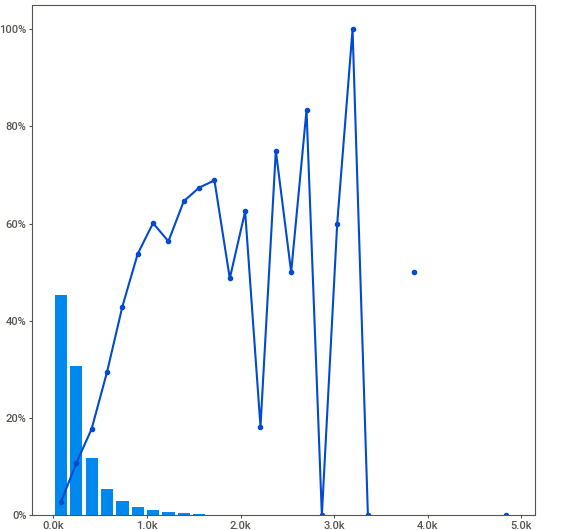
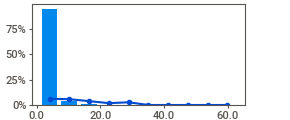
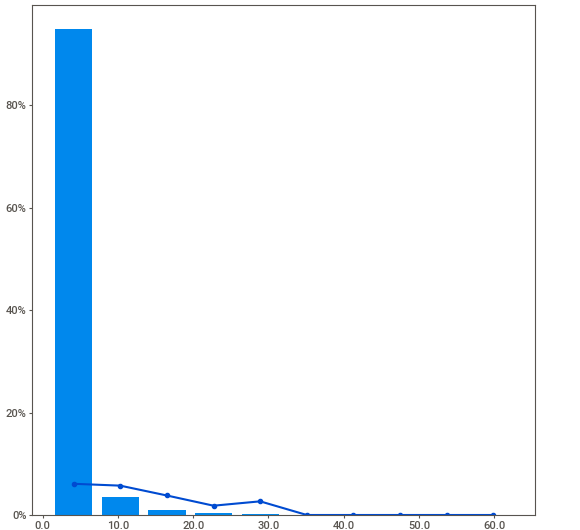
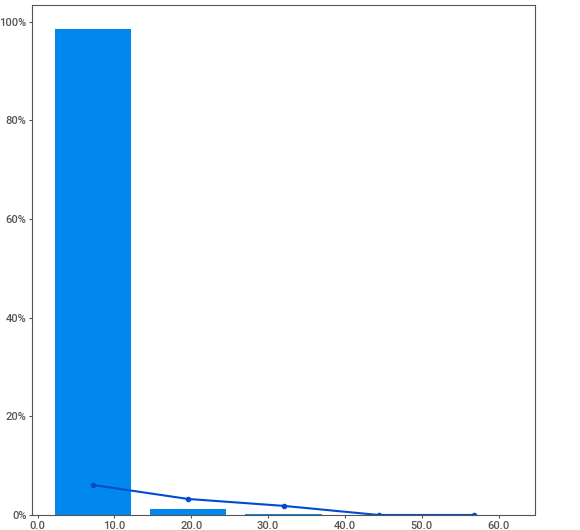
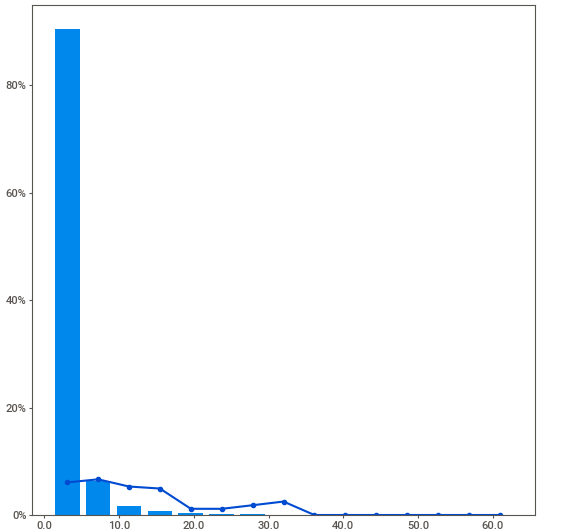
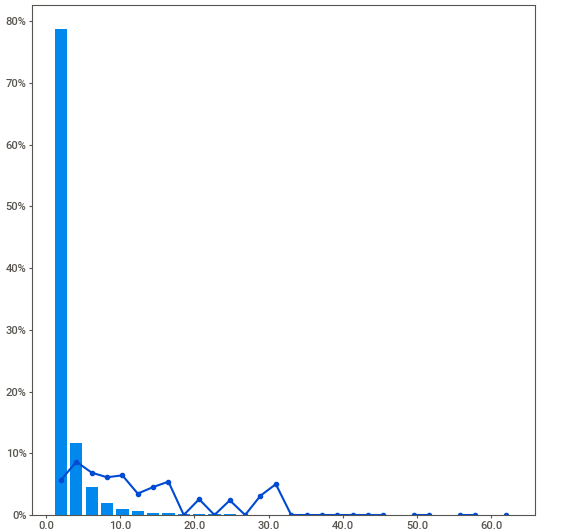
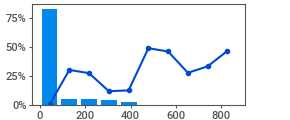
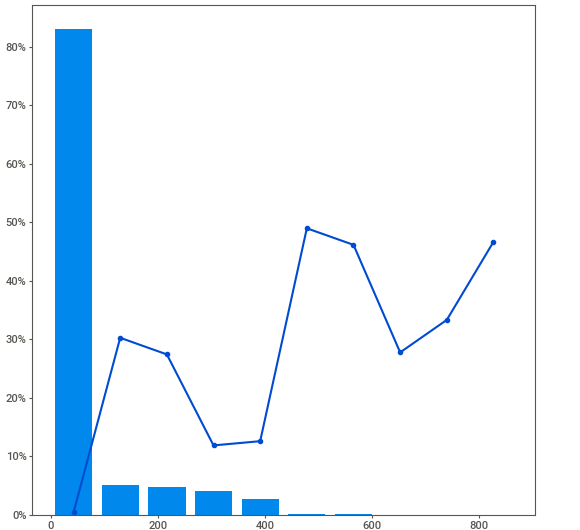
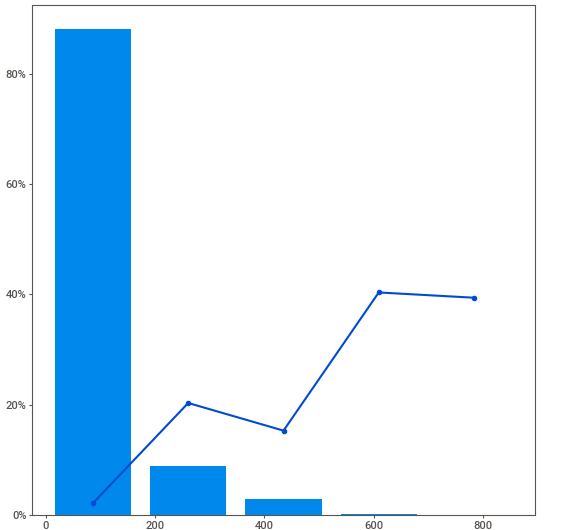
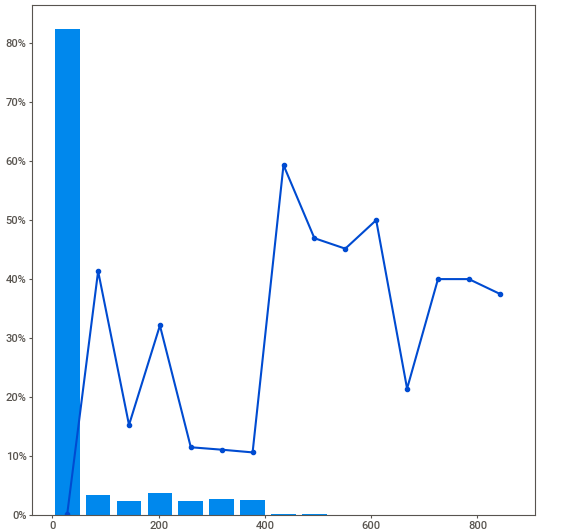
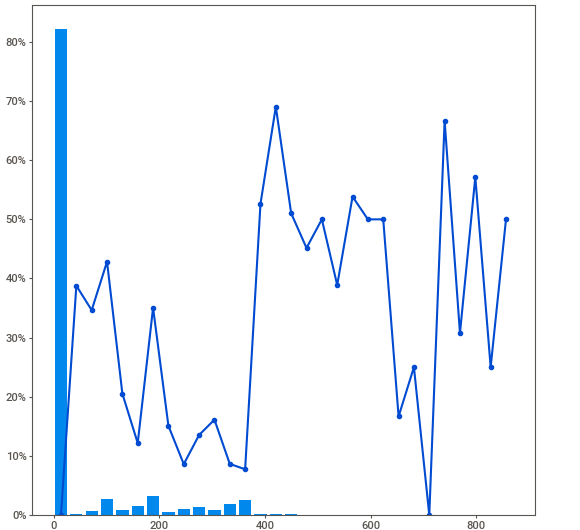
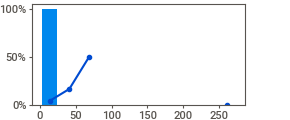
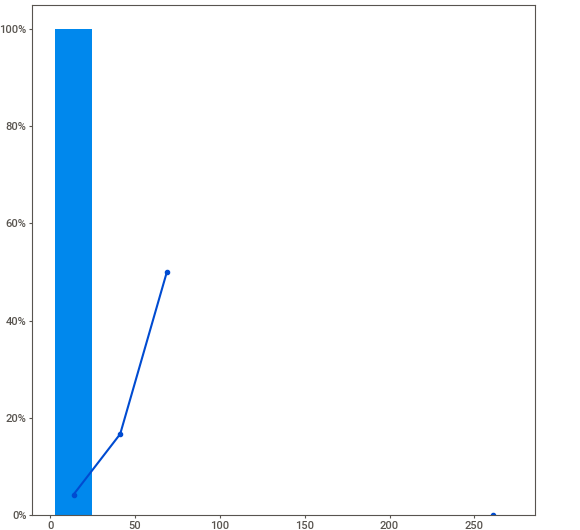
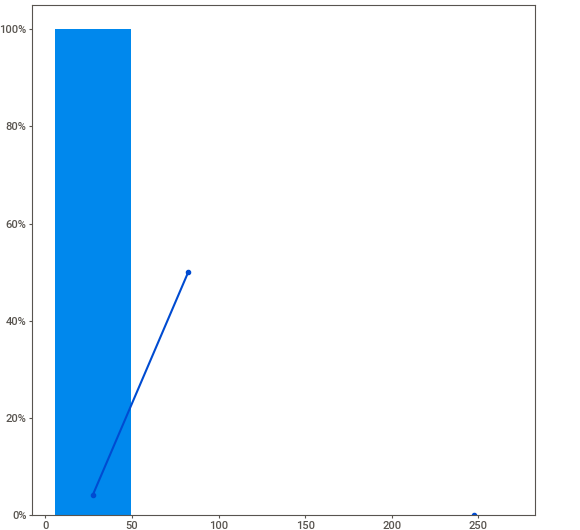
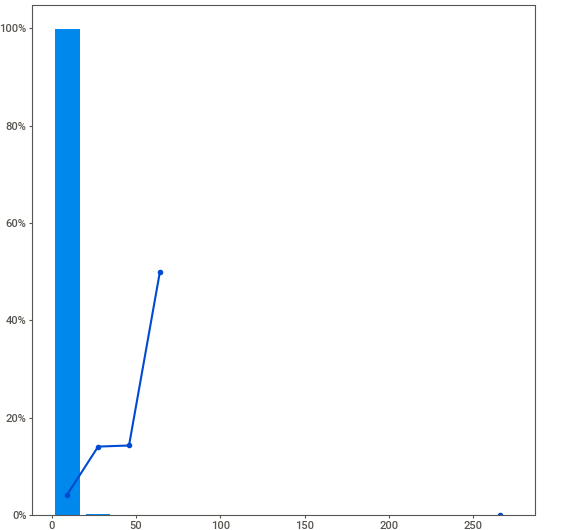
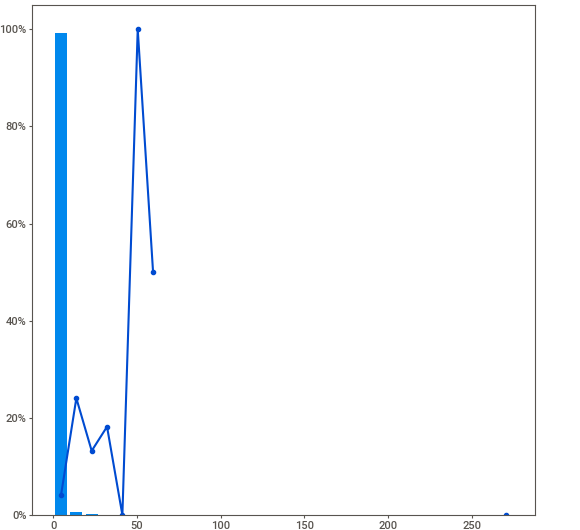
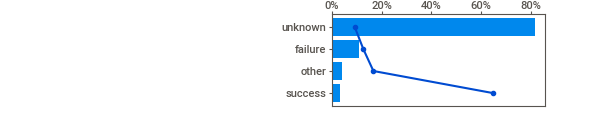
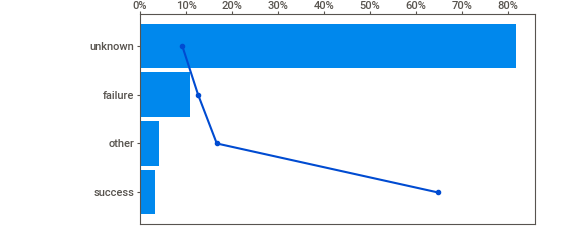
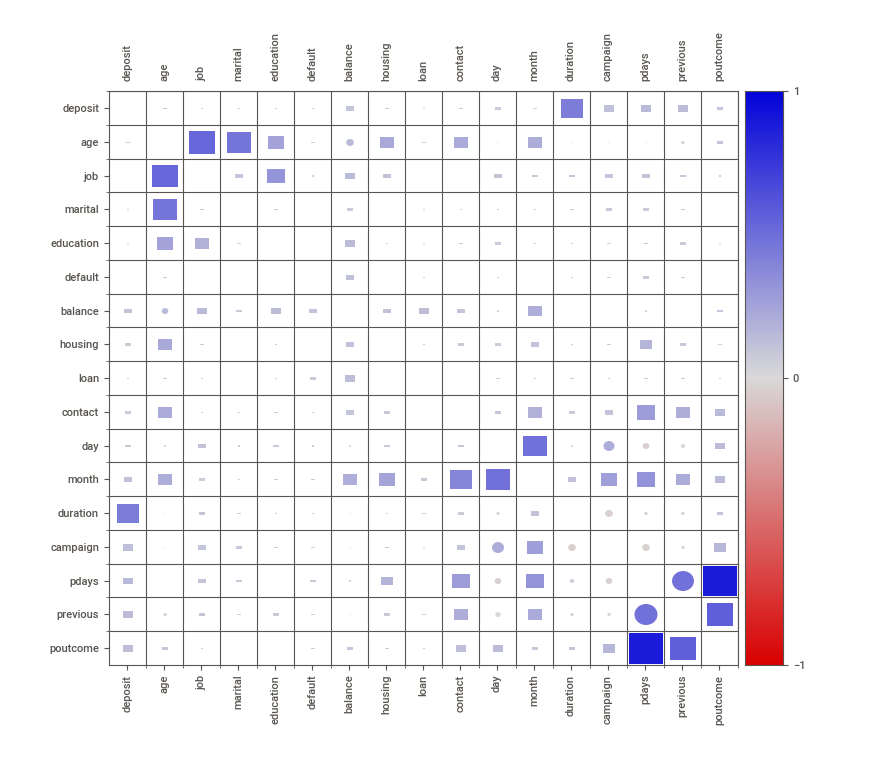
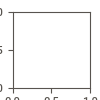

In [139]:
import sweetviz 

my_report = sweetviz.analyze([df, "df"],target_feat='deposit')

my_report.show_html('Report.html')

import IPython
IPython.display.HTML('Report.html')

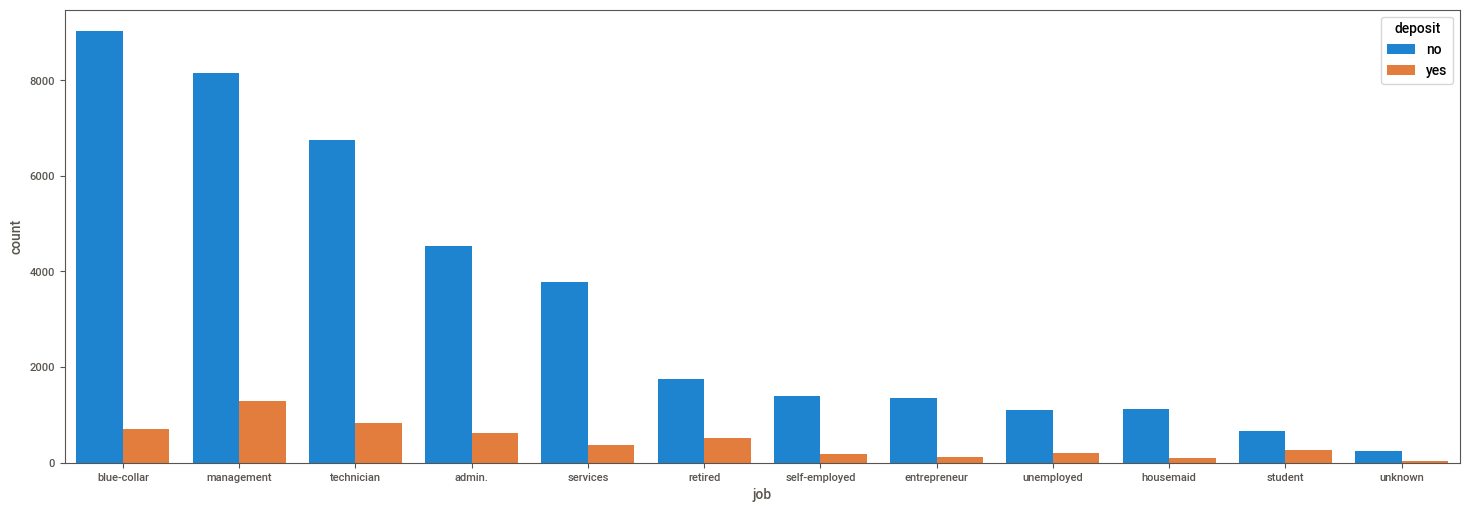

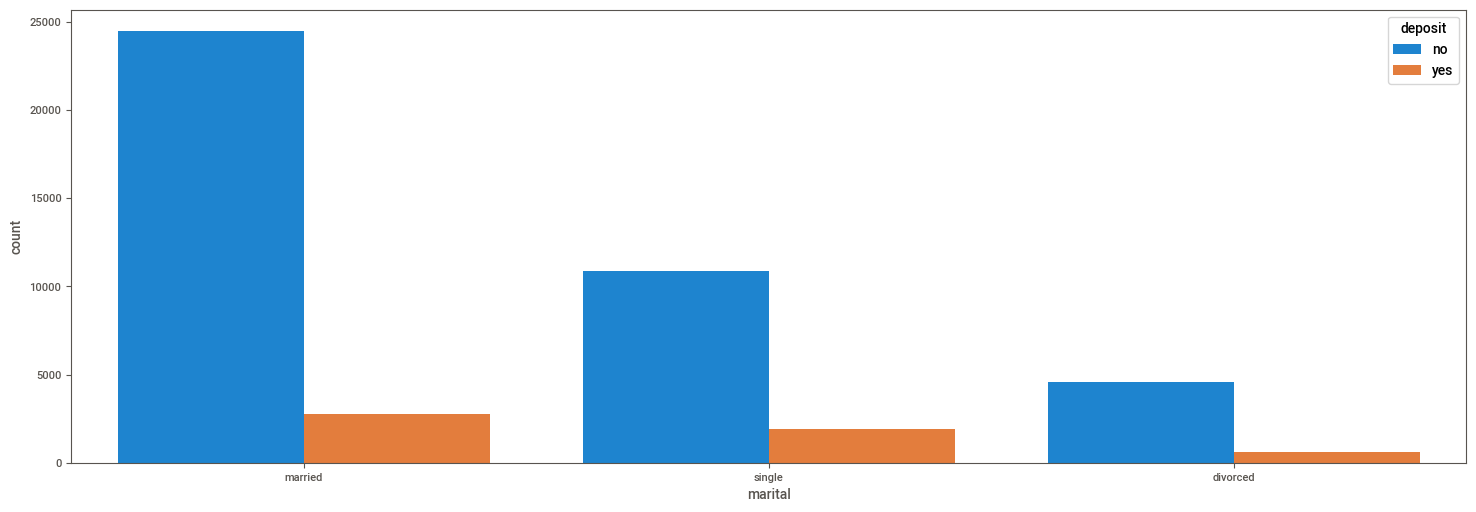

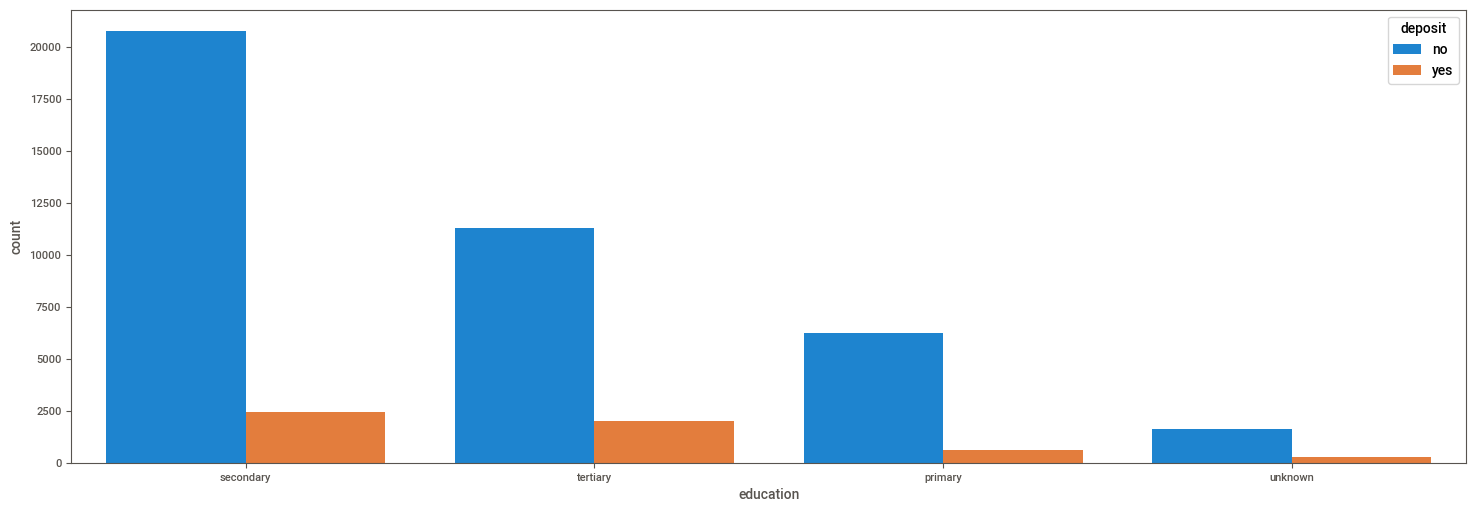

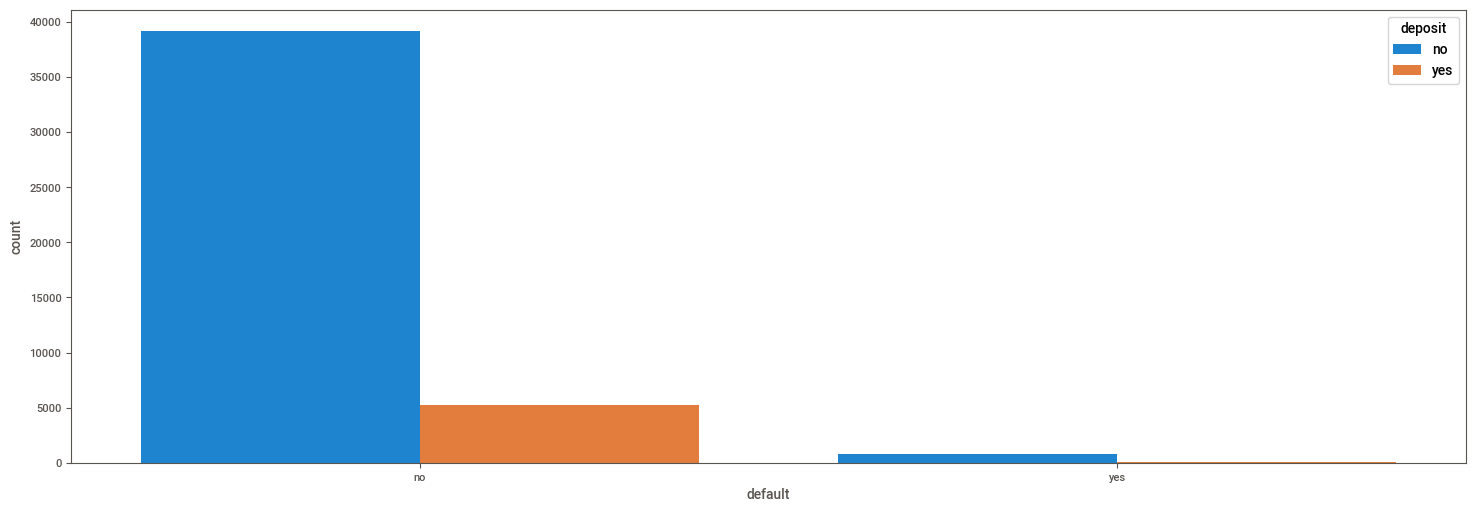

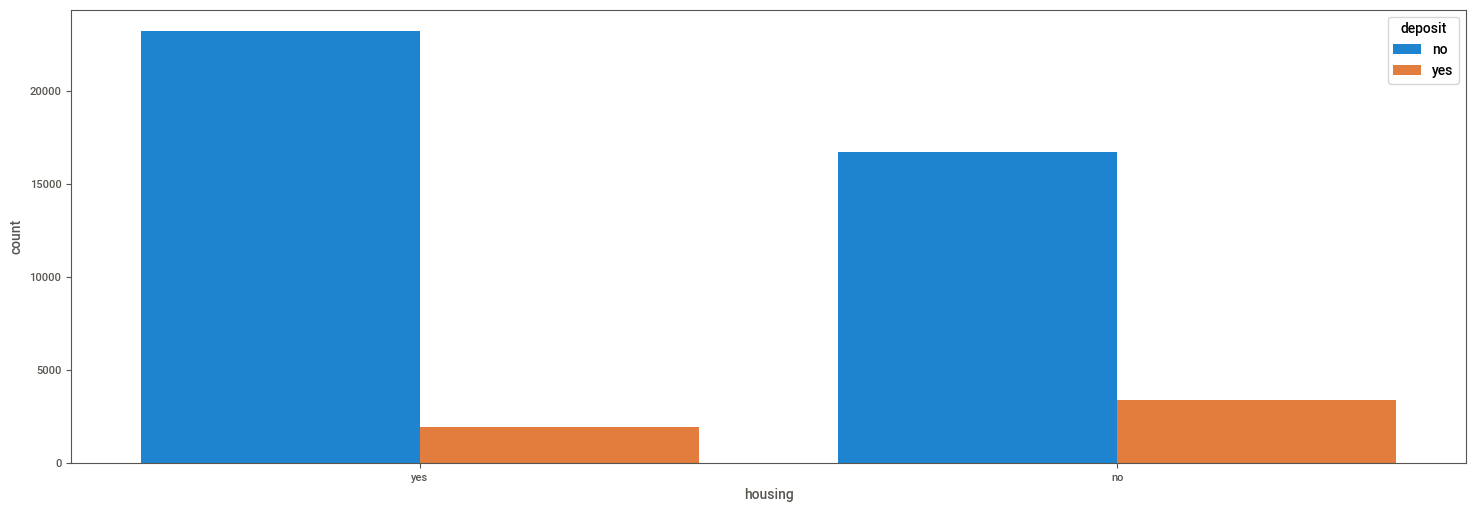

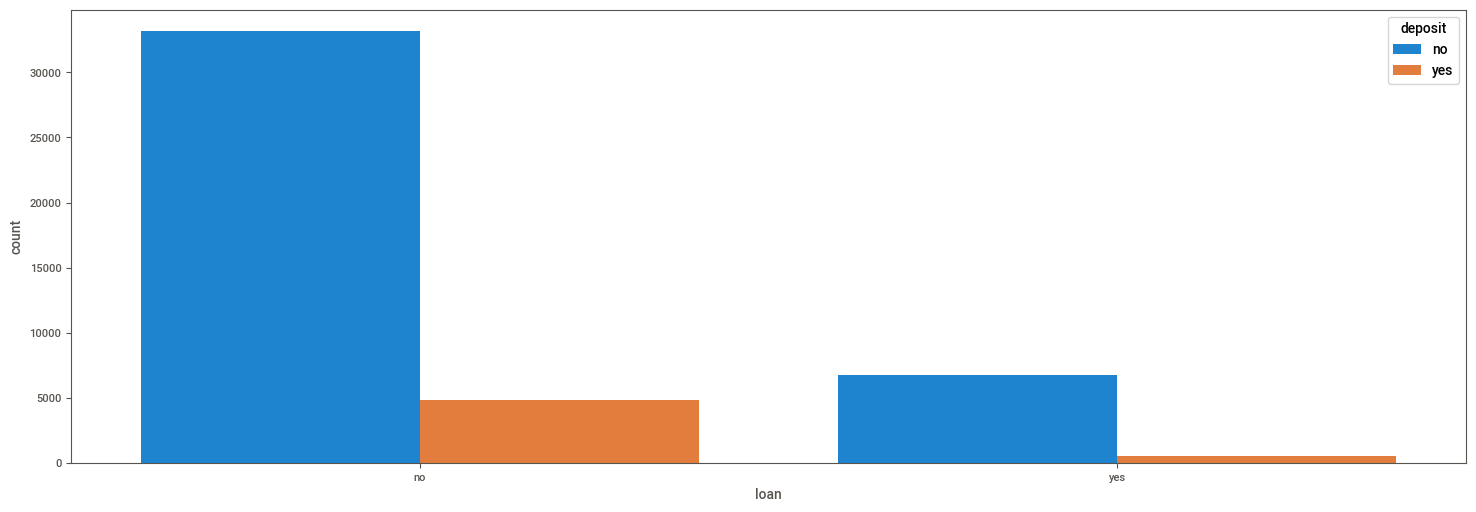

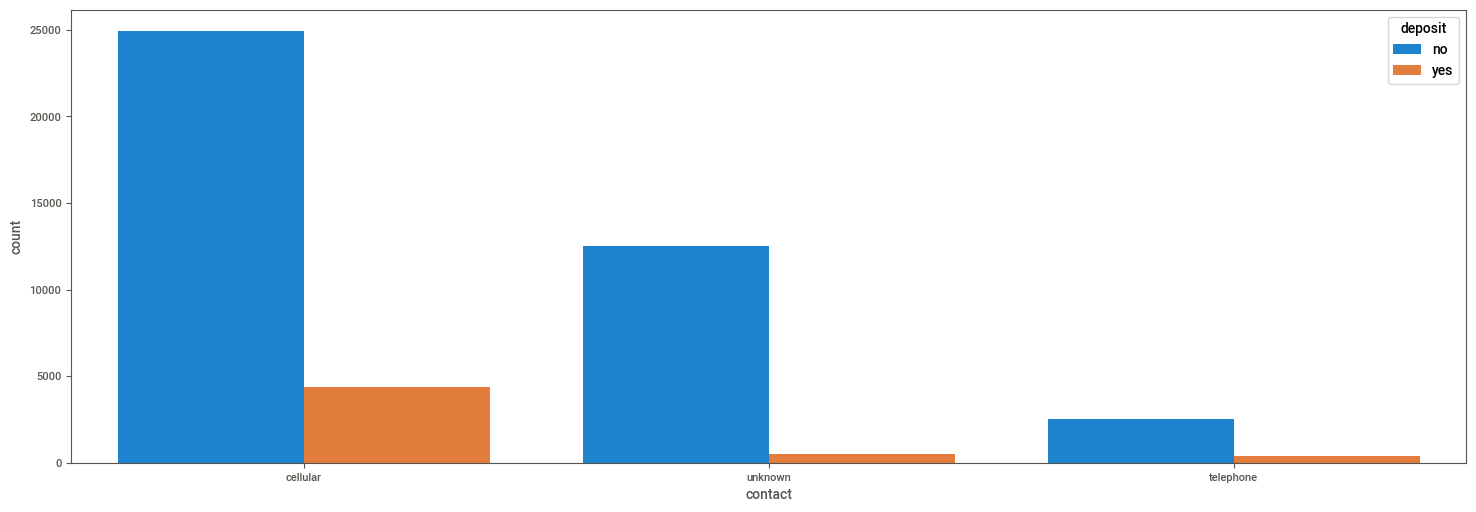

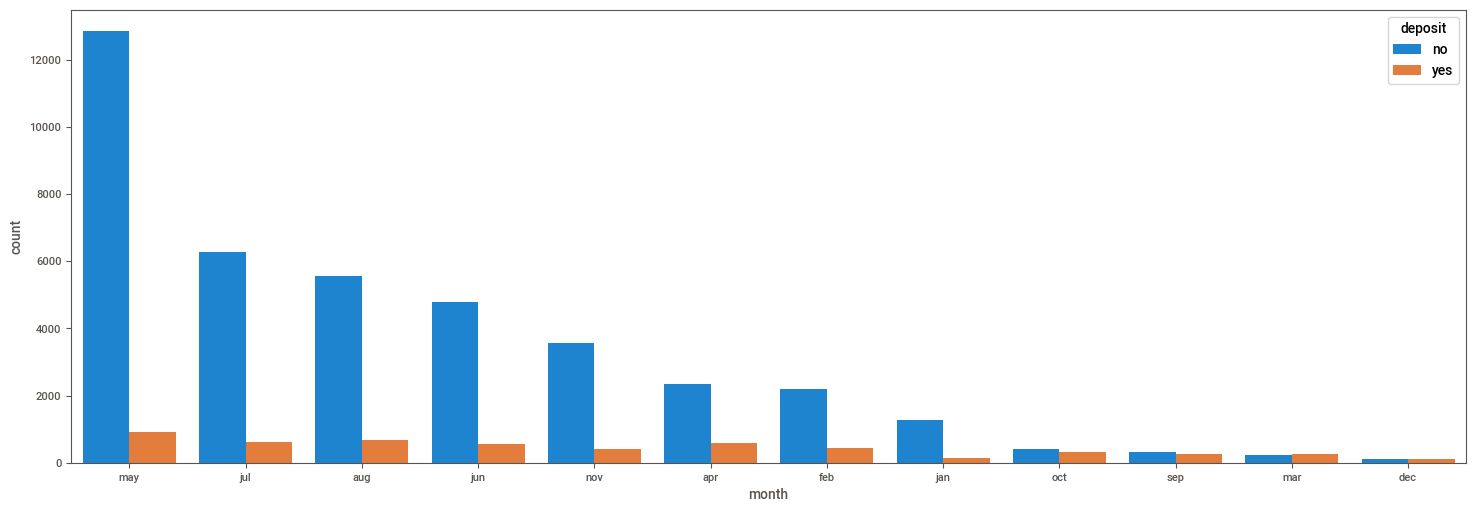

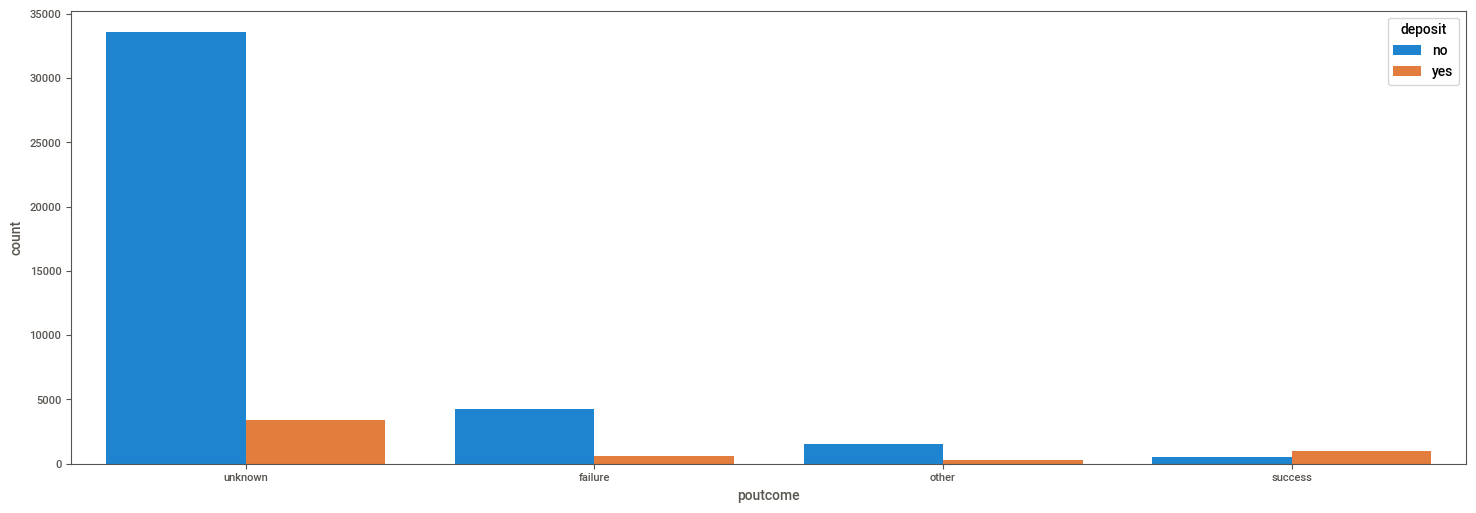

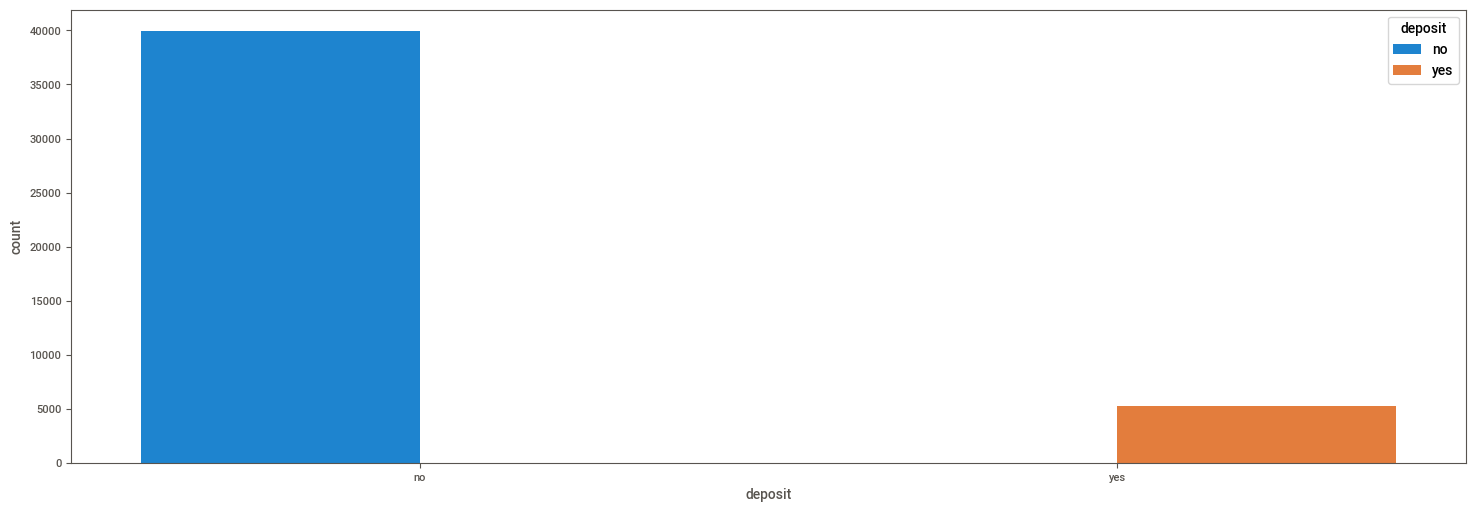

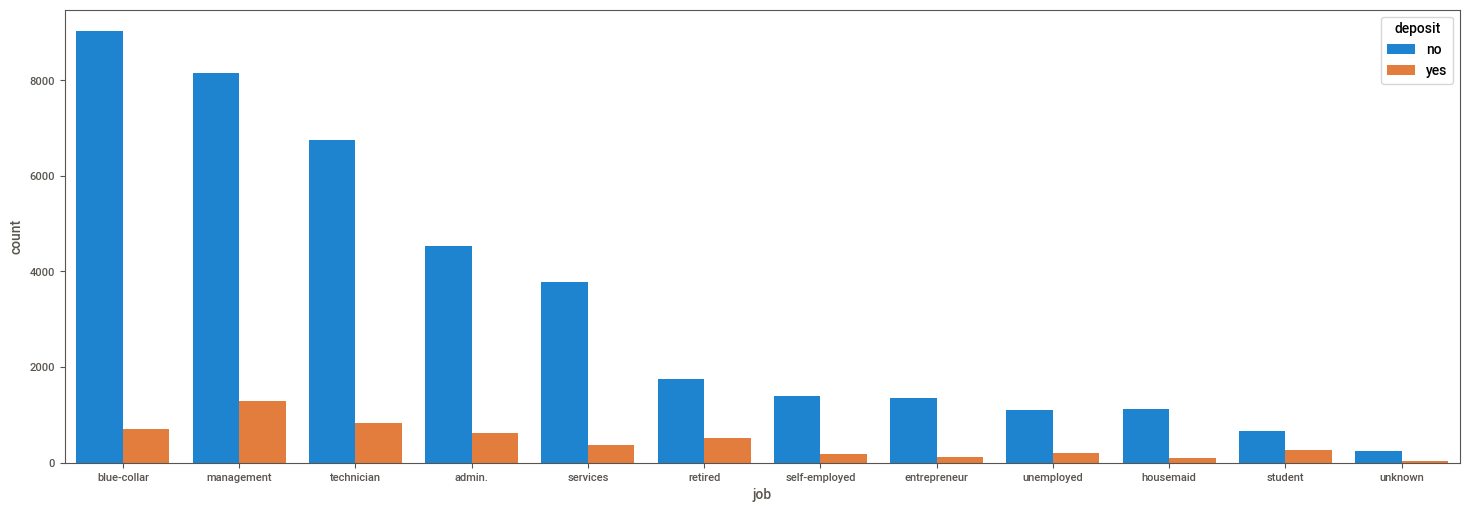

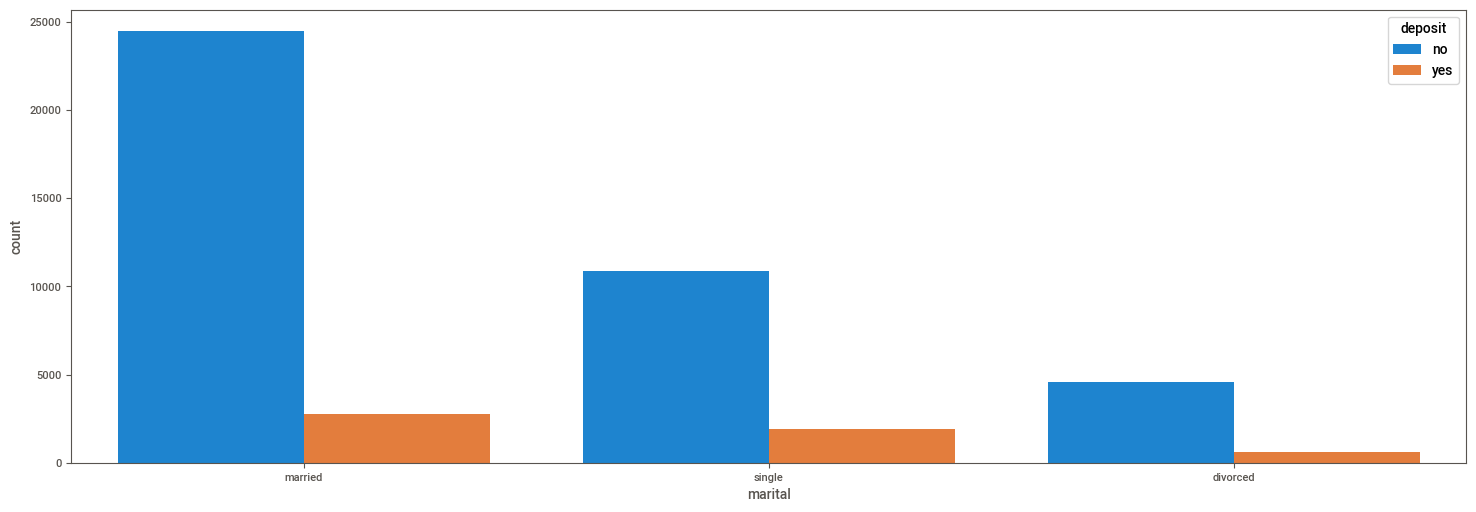

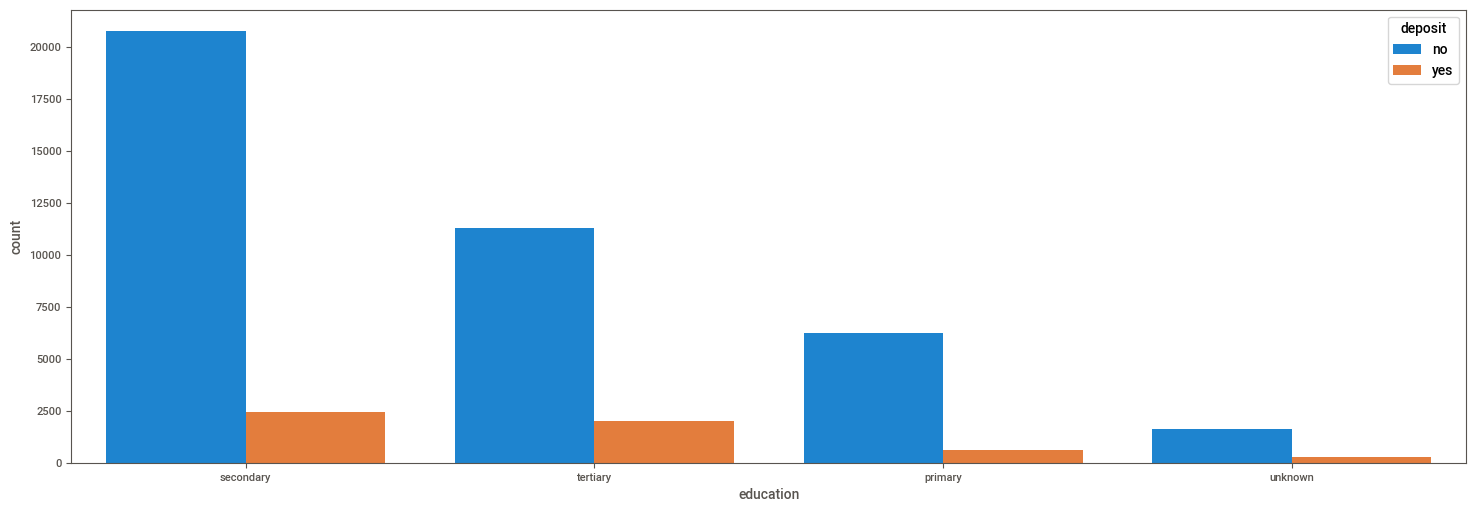

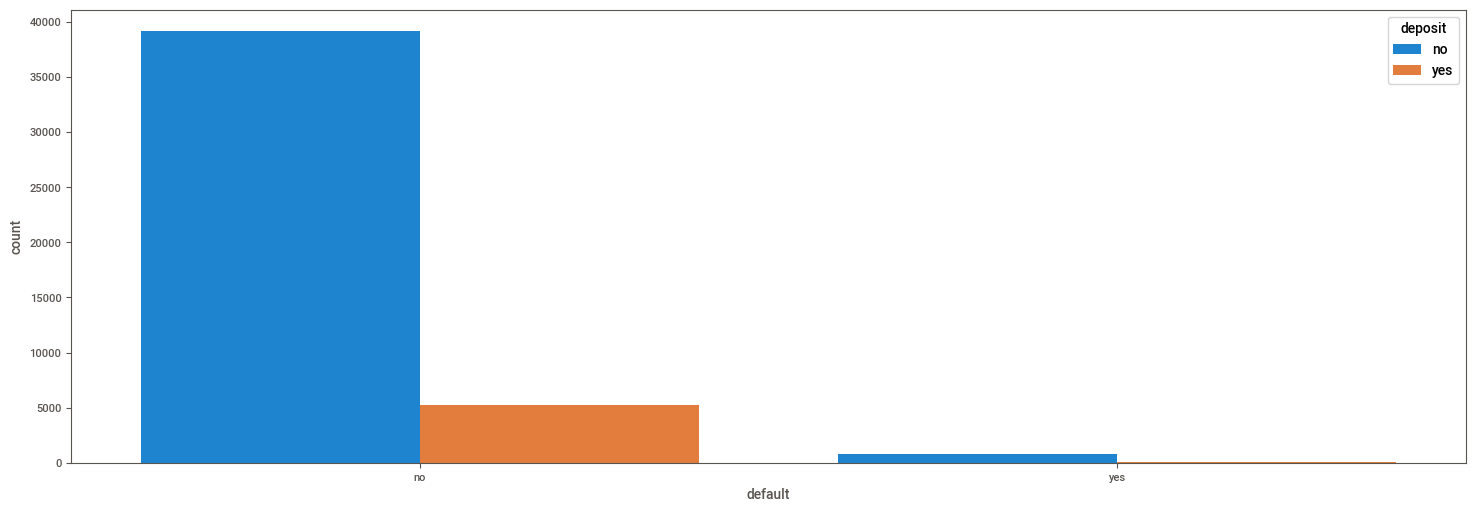

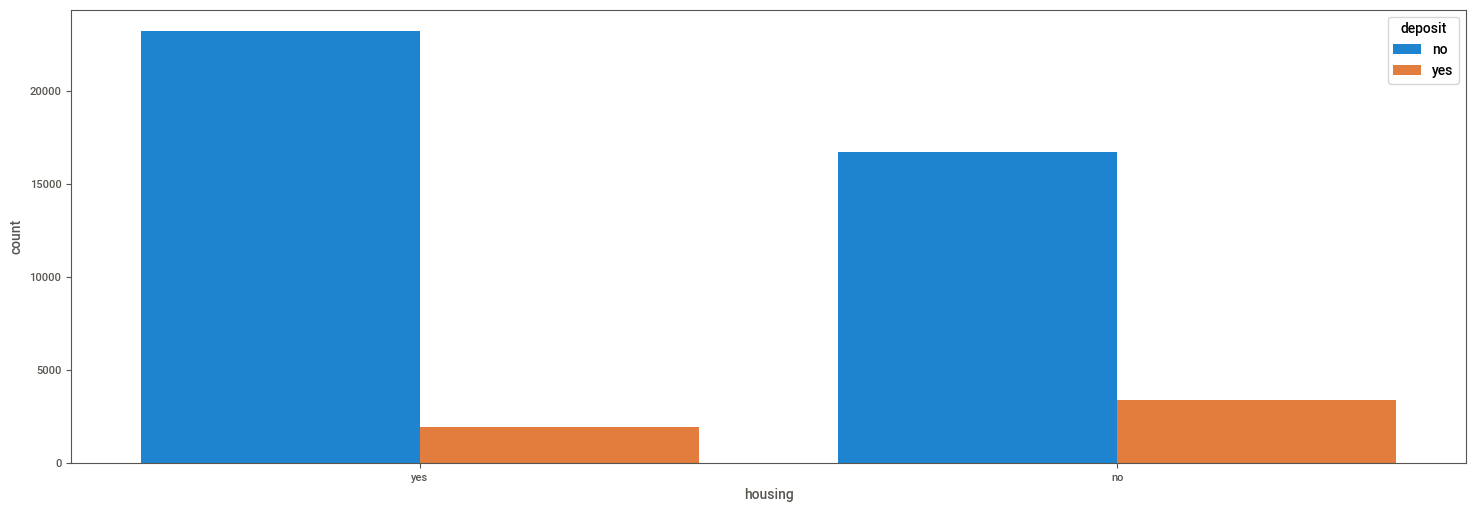

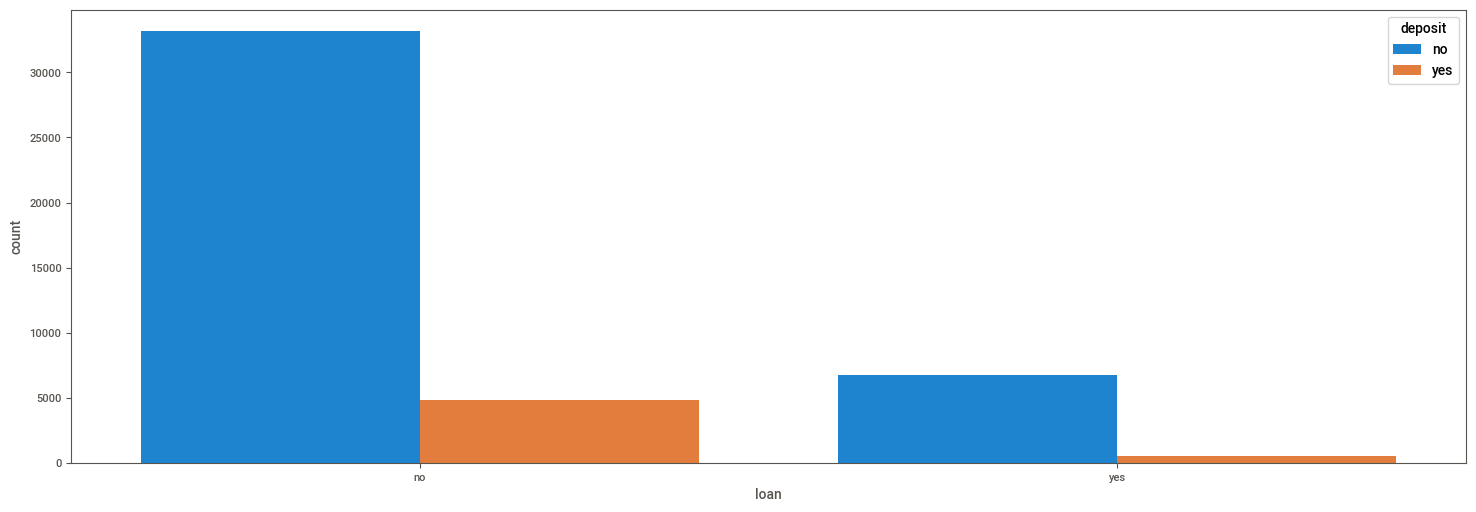

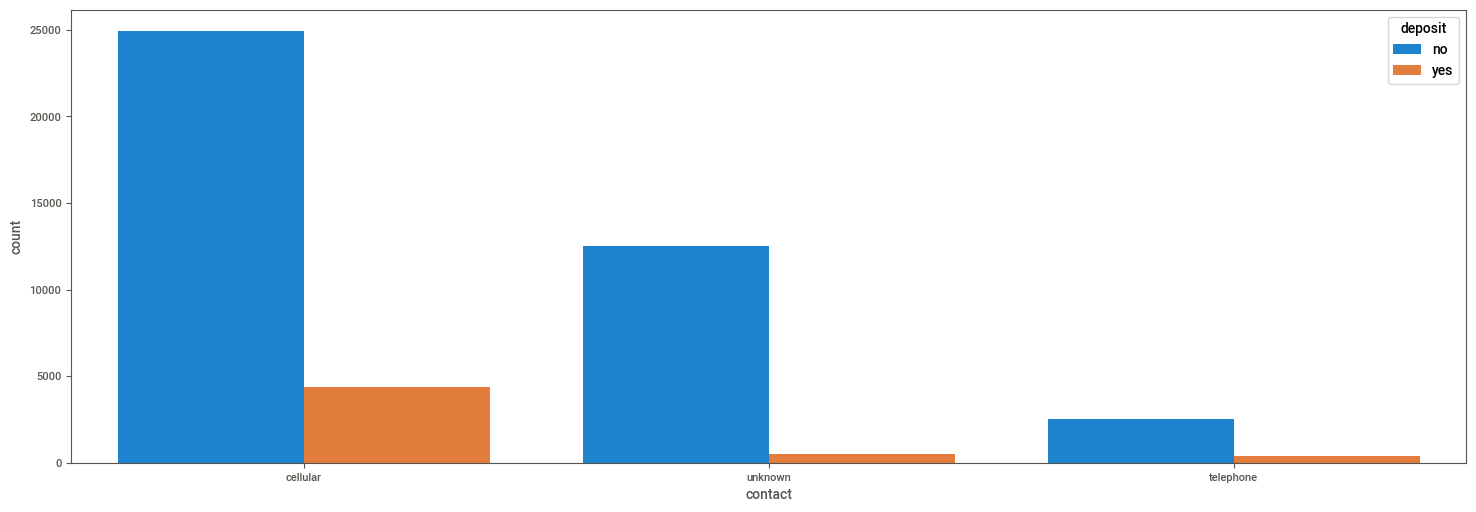

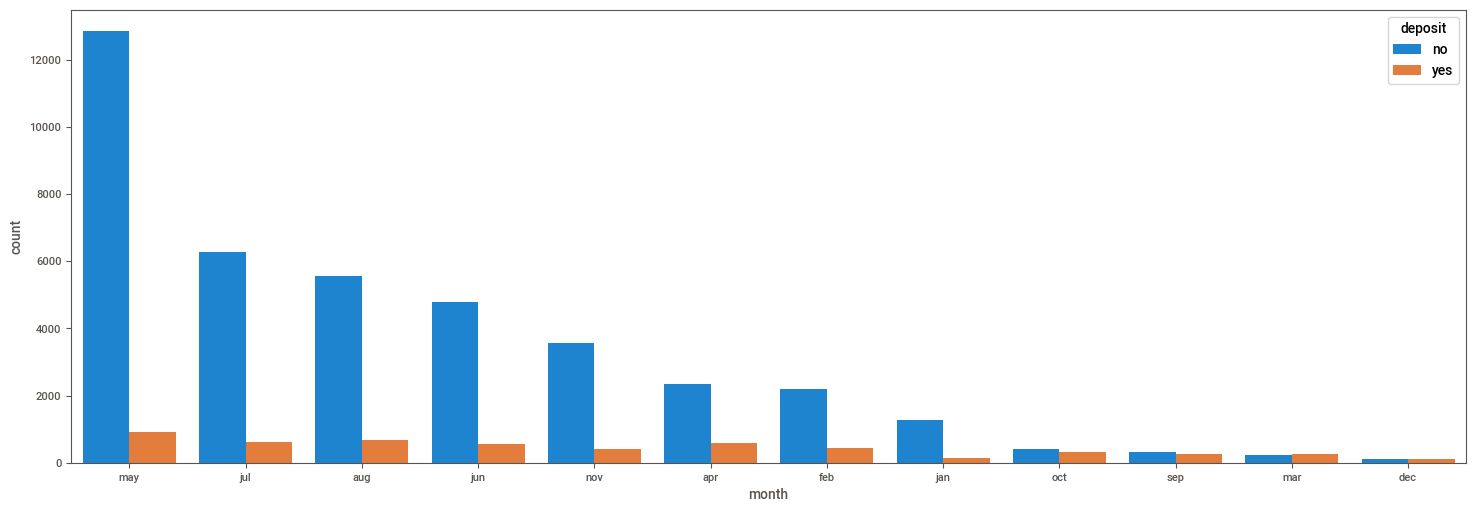

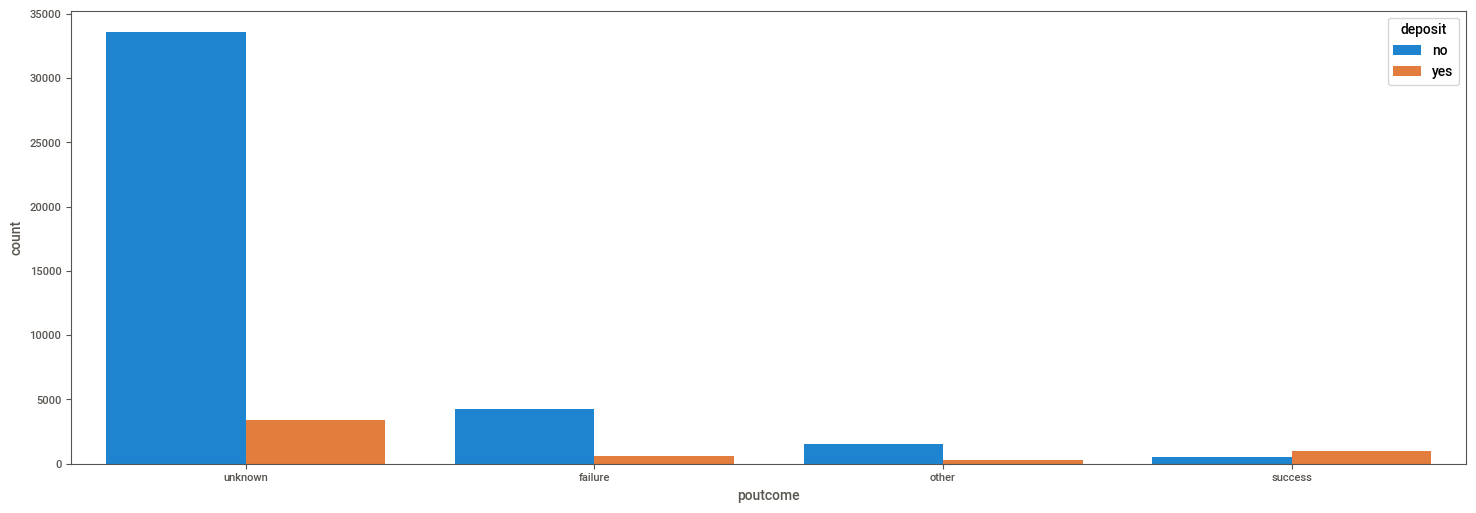

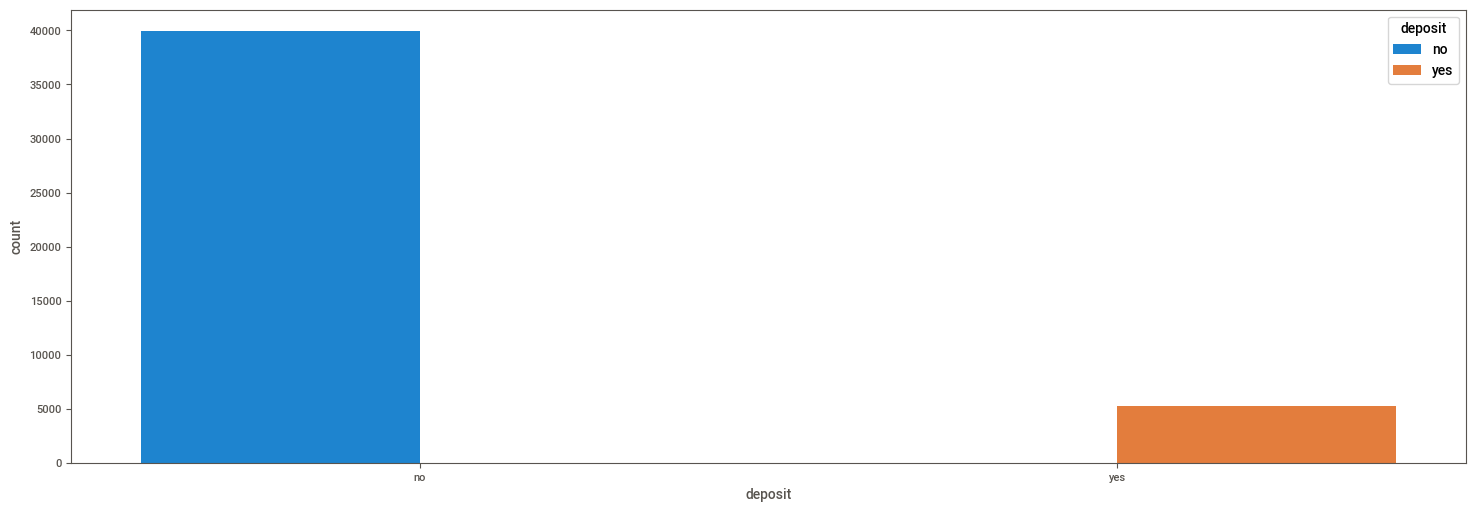

In [140]:
#Bivariate Analysis: Relationships of Categorical Features with Target


for c in cat_var:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='deposit', data = df ,order = df[c].value_counts().index) #individual bars sorted acc to frequency and then plotted

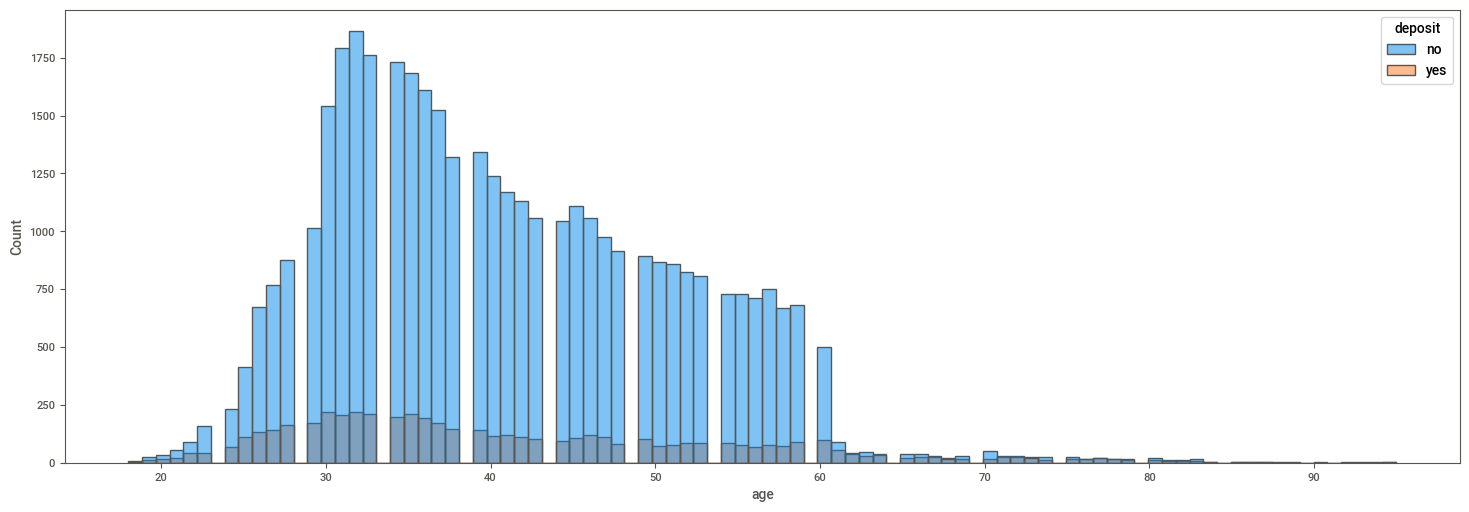

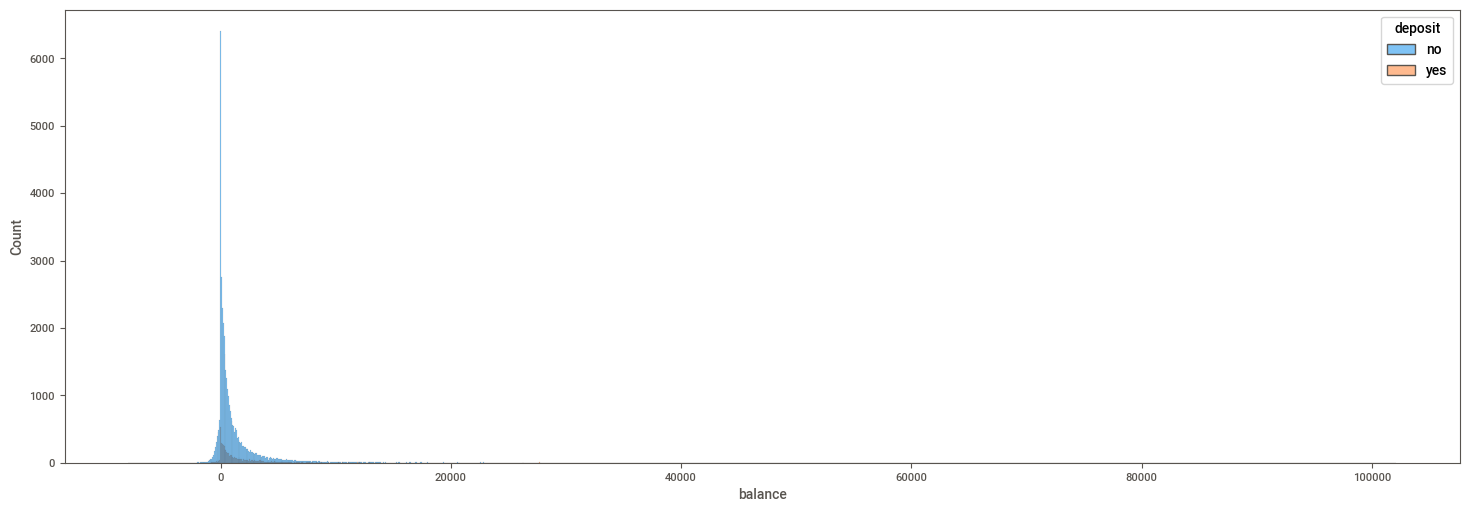

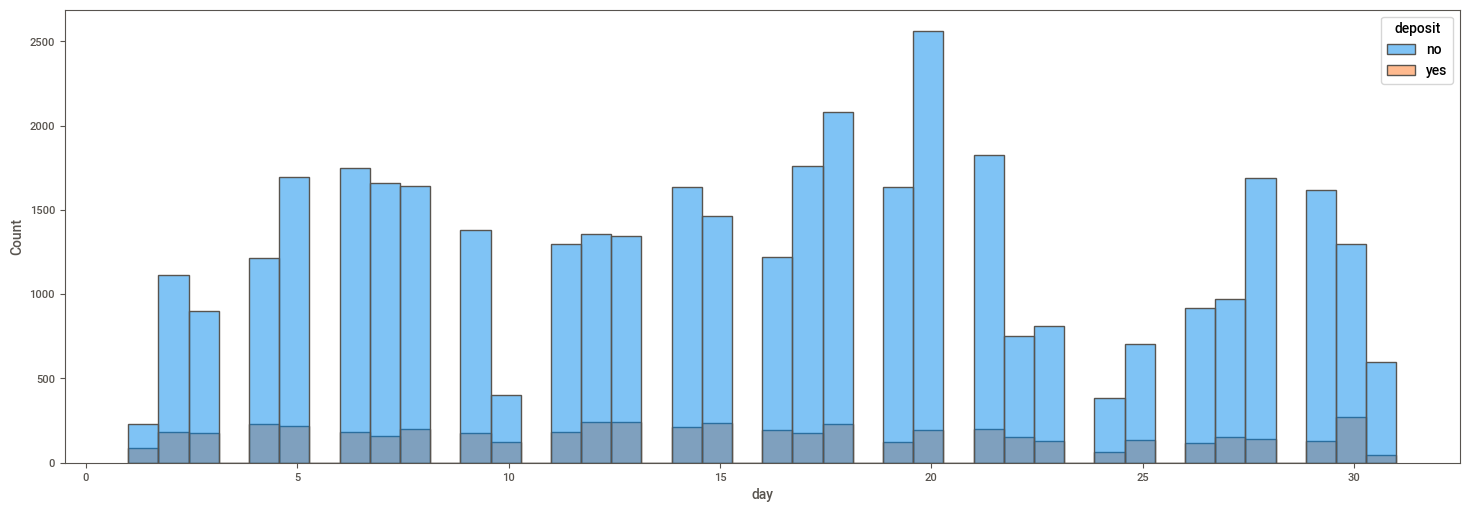

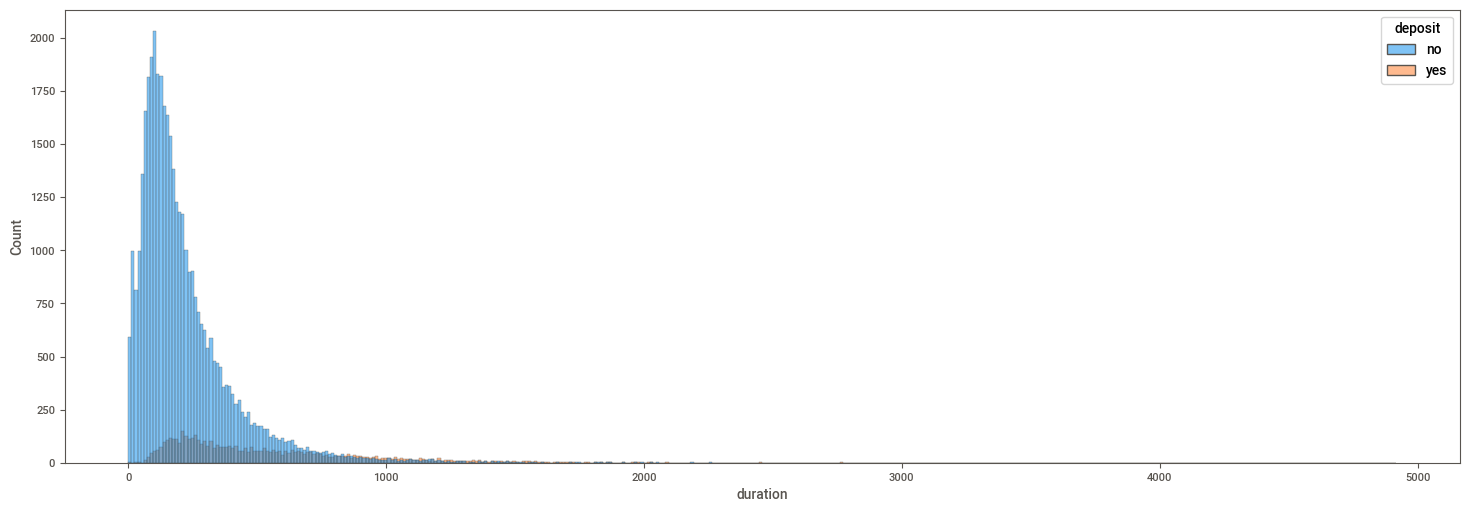

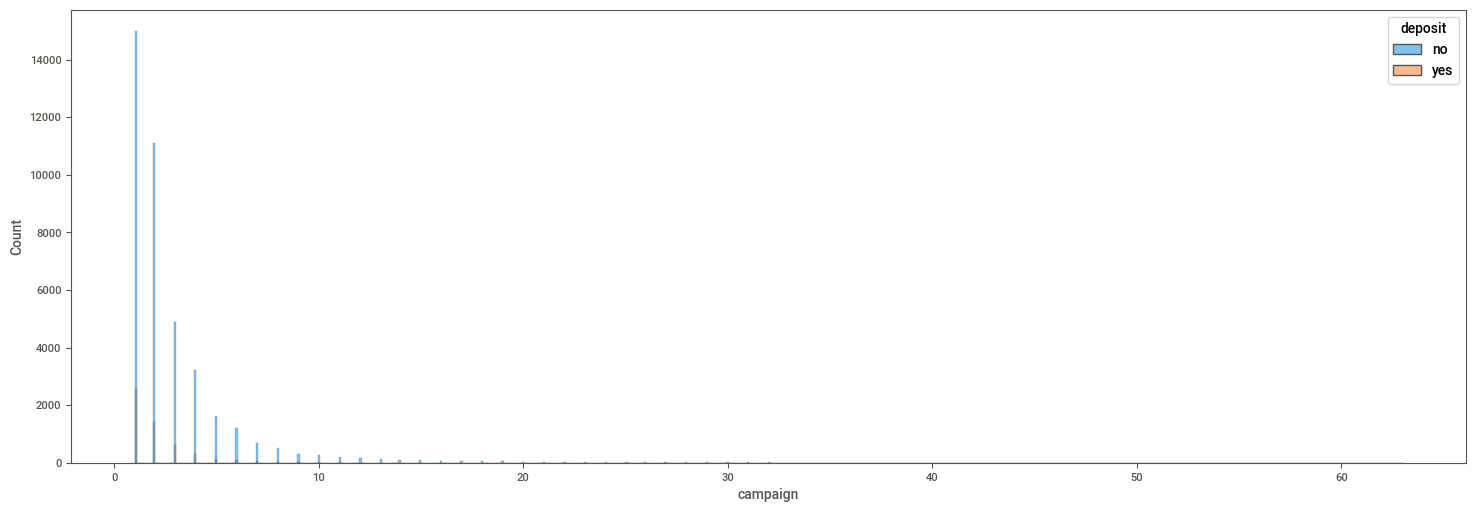

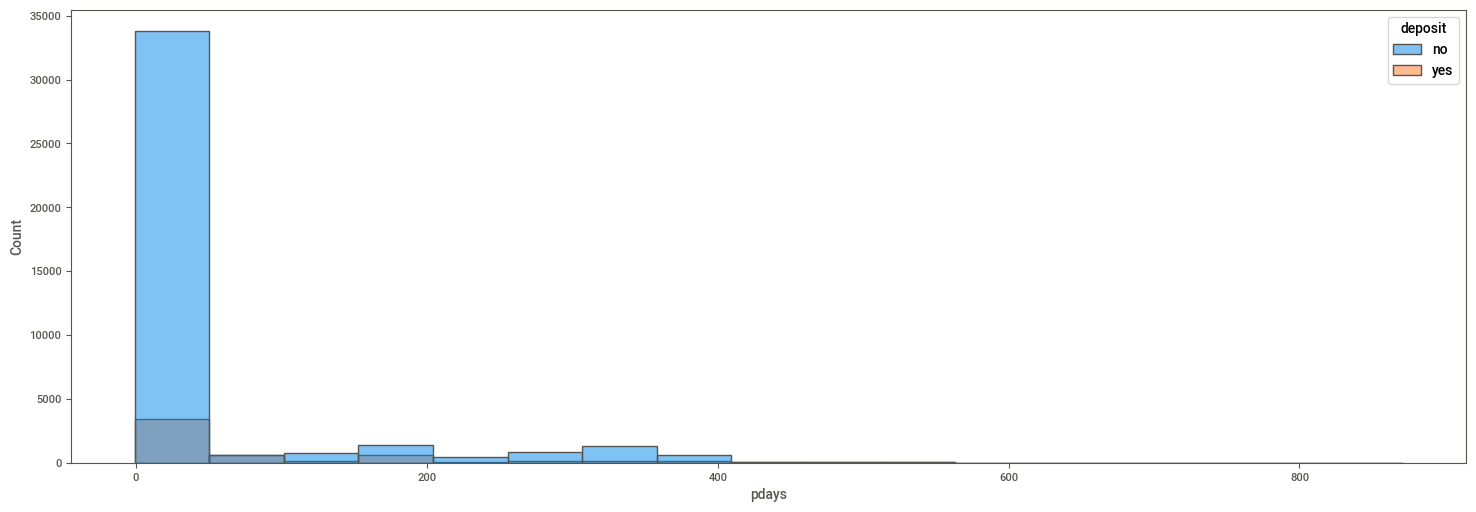

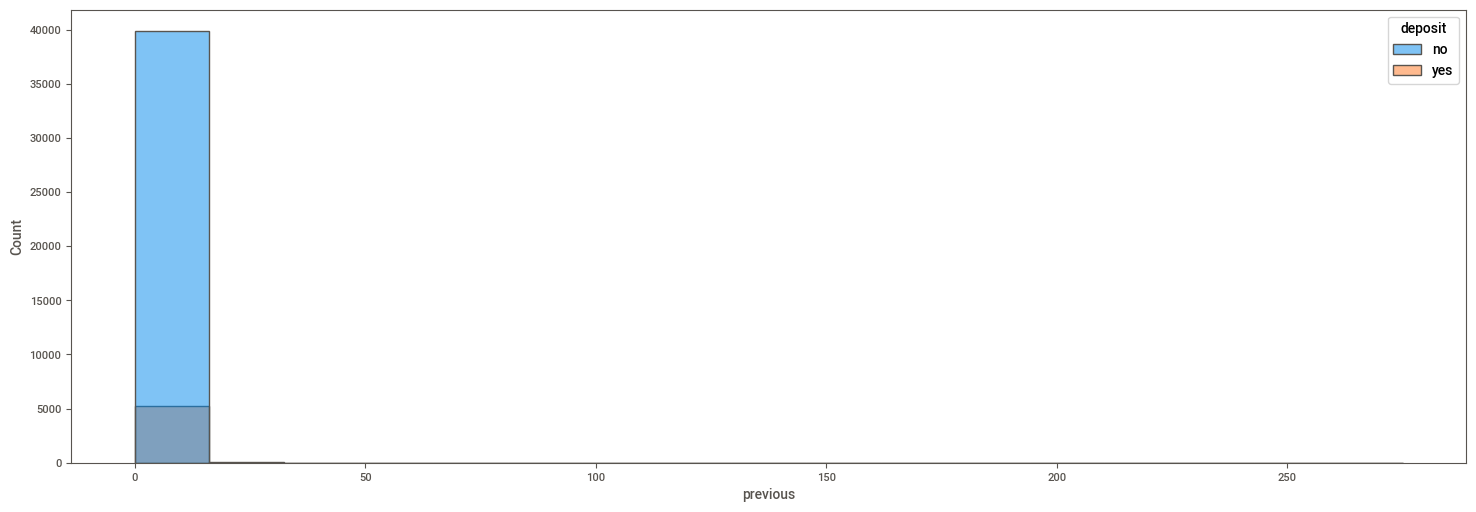

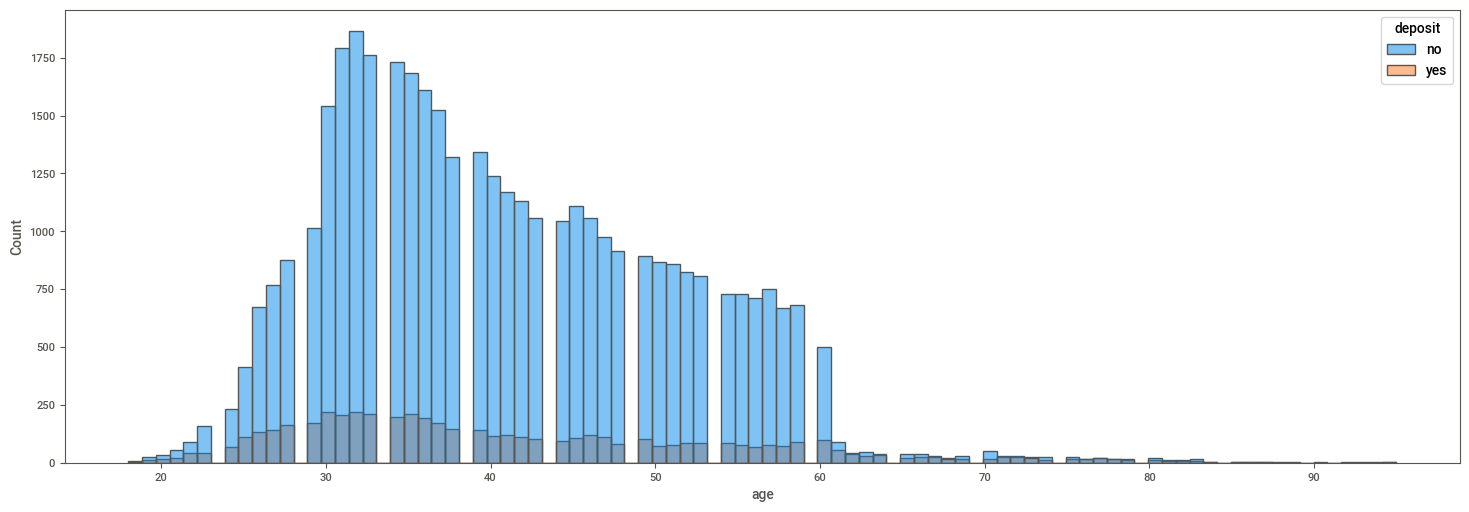

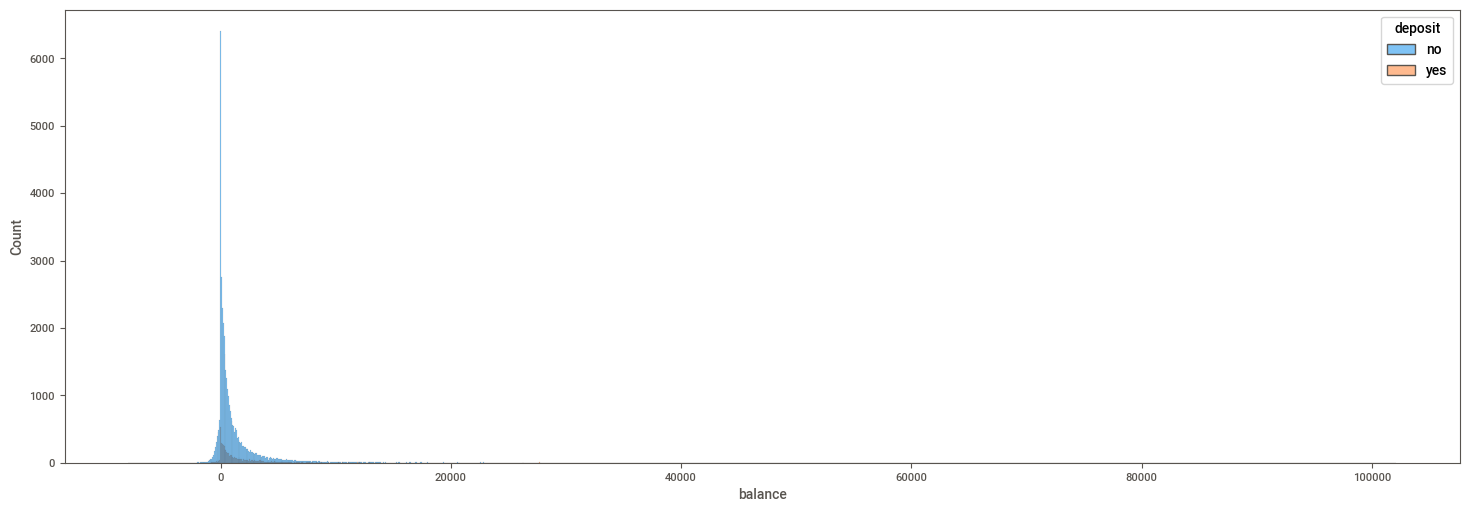

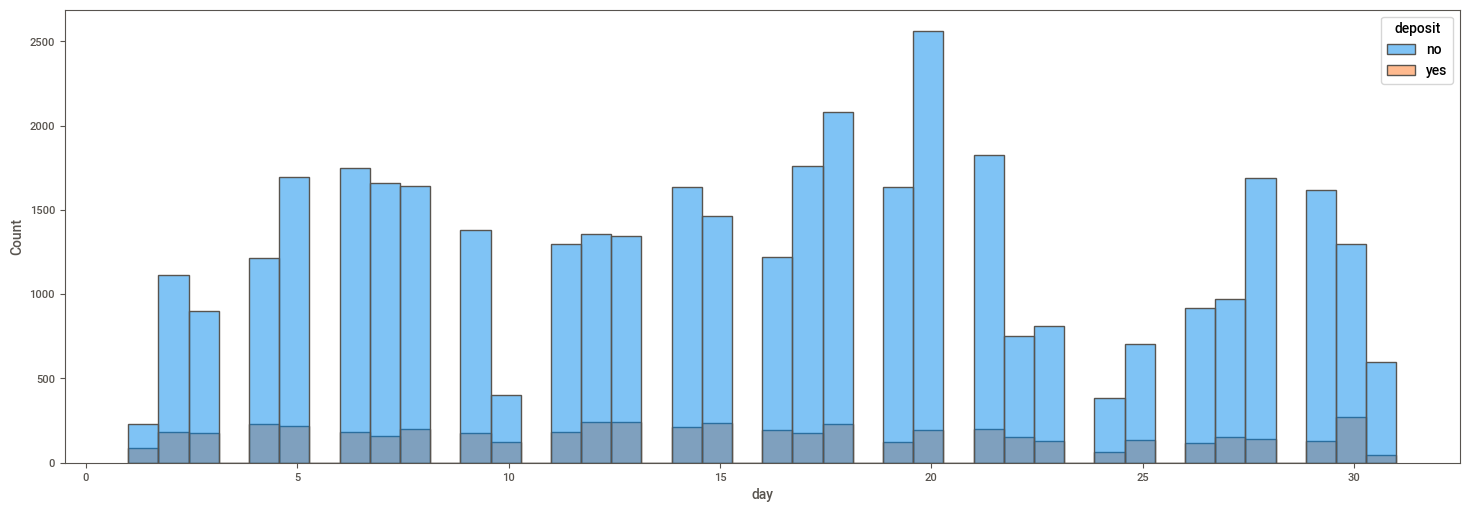

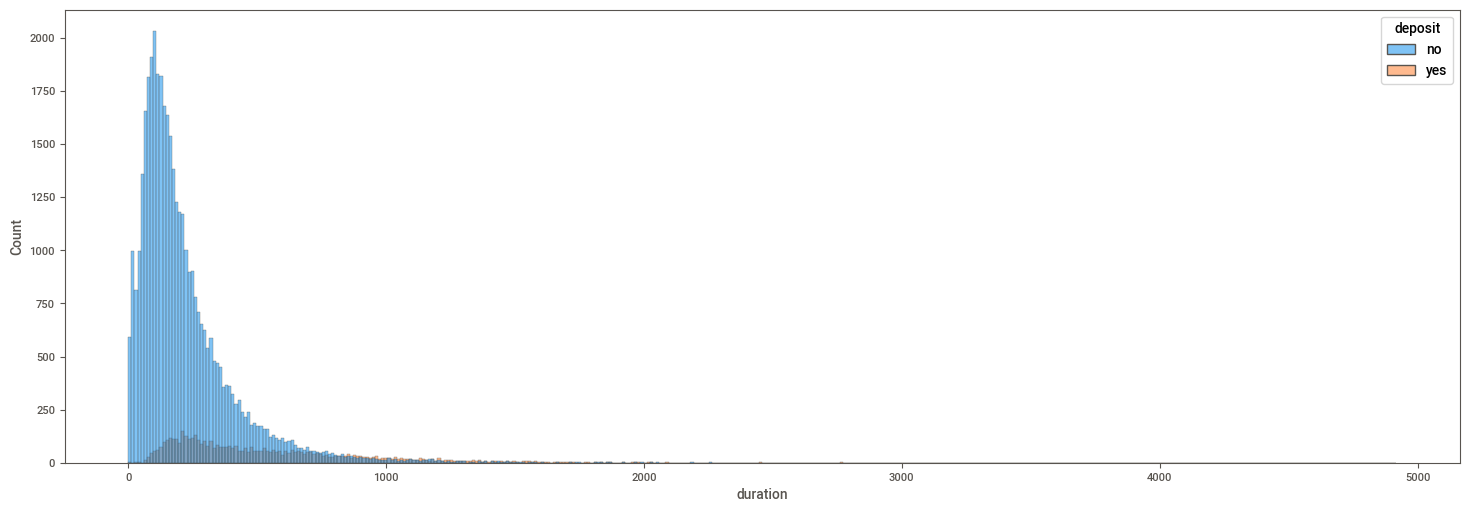

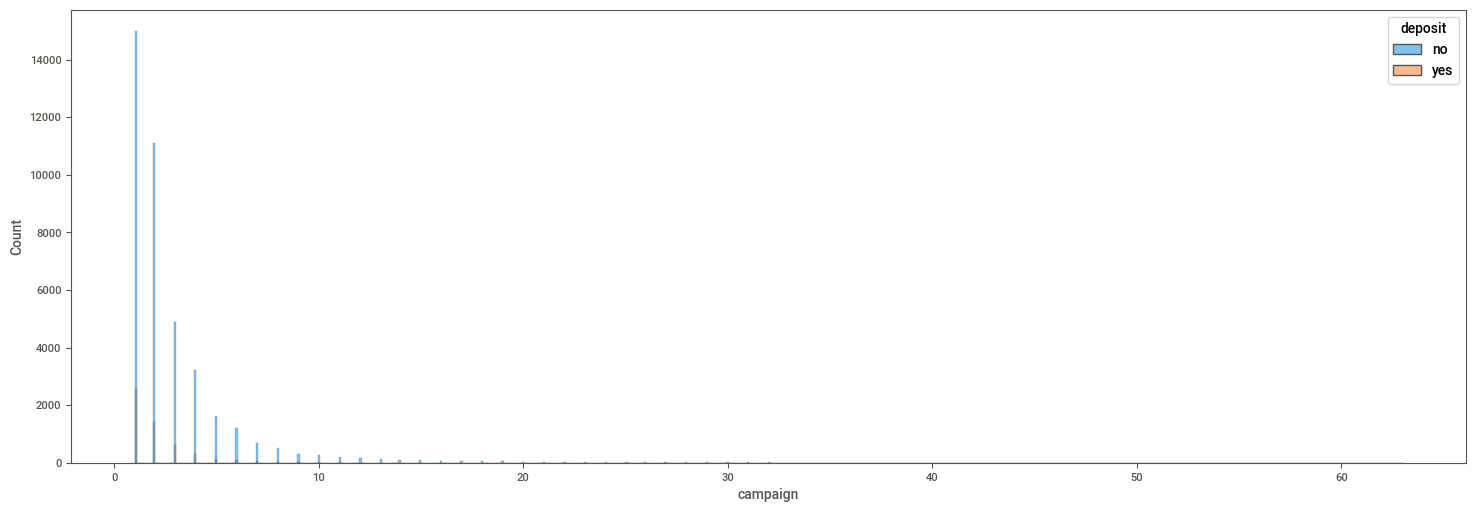

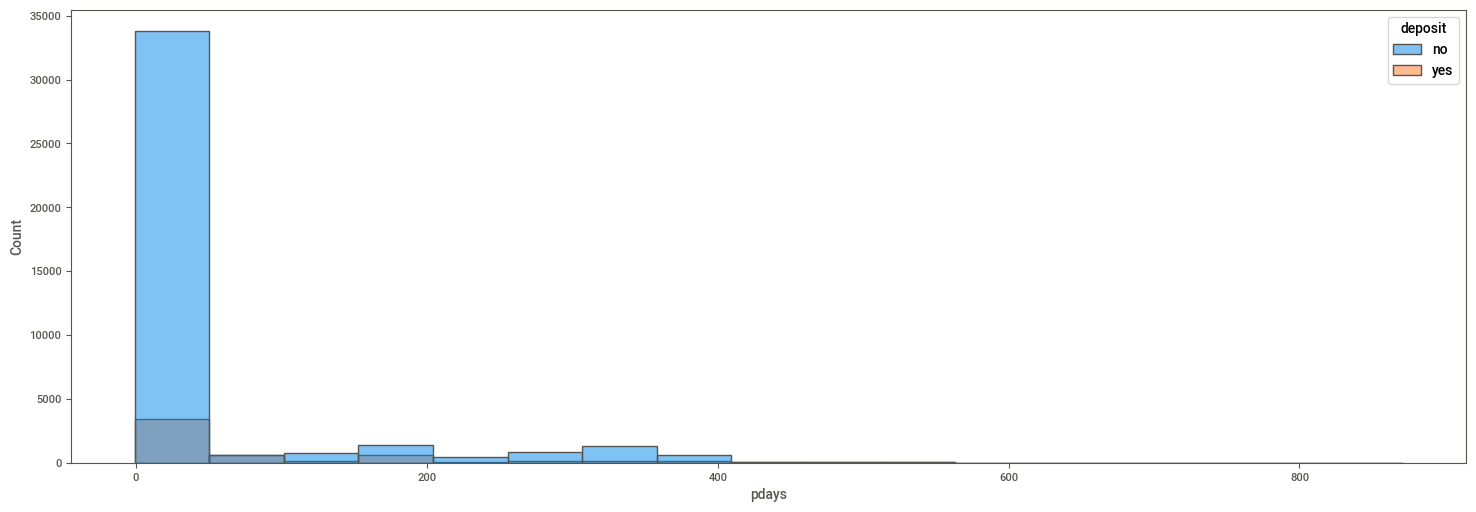

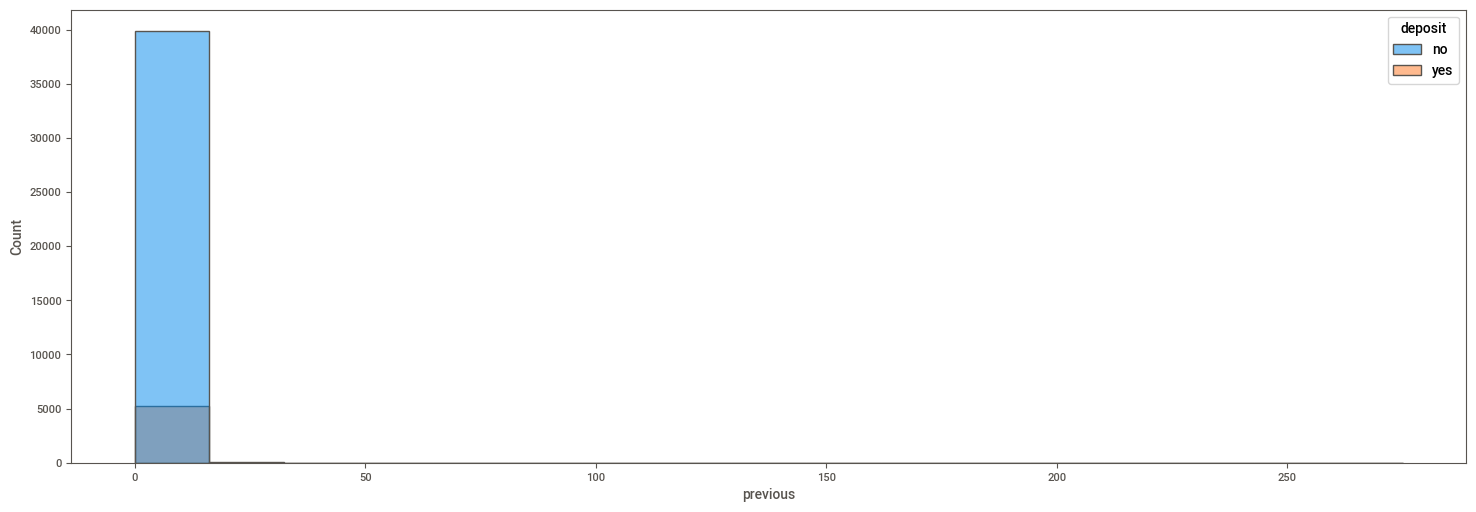

In [141]:
#Bivariate Analysis: Relationships of Numerical Features with Target

for c in num_var:
  plt.figure(figsize=(18,6))
  sns.histplot(data=df, x=c, hue="deposit")


In [142]:
num_var.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

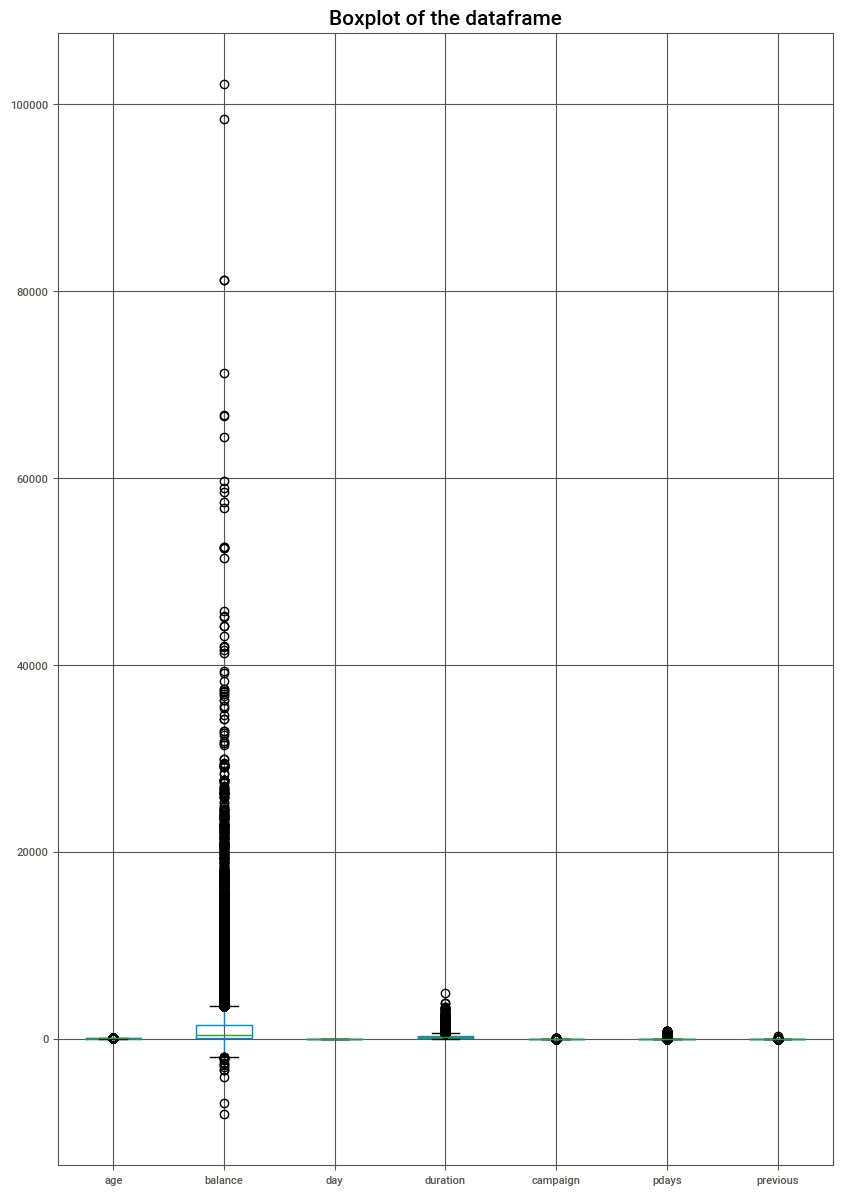

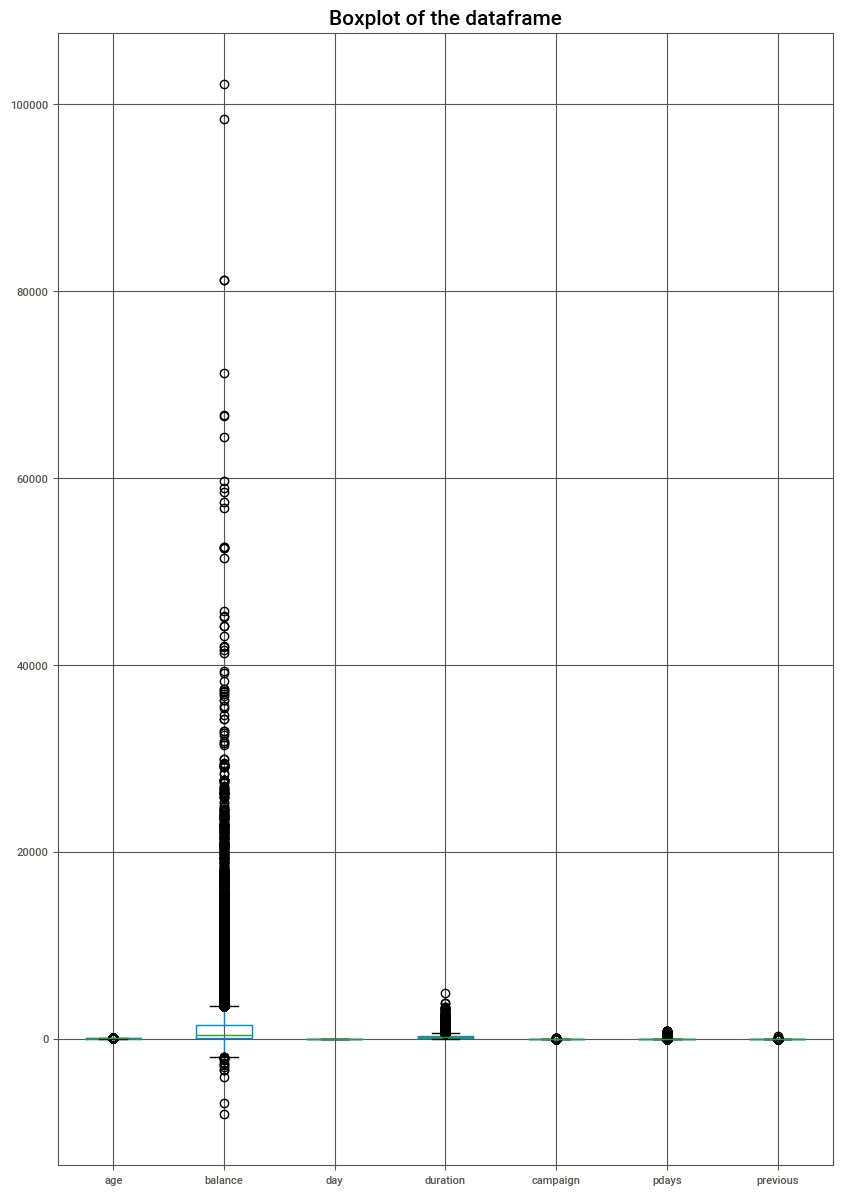

In [143]:
# checking for outliers in dataset
plt.figure(figsize=(10,15))
df.boxplot()
plt.title("Boxplot of the dataframe", fontsize = 15)
print()

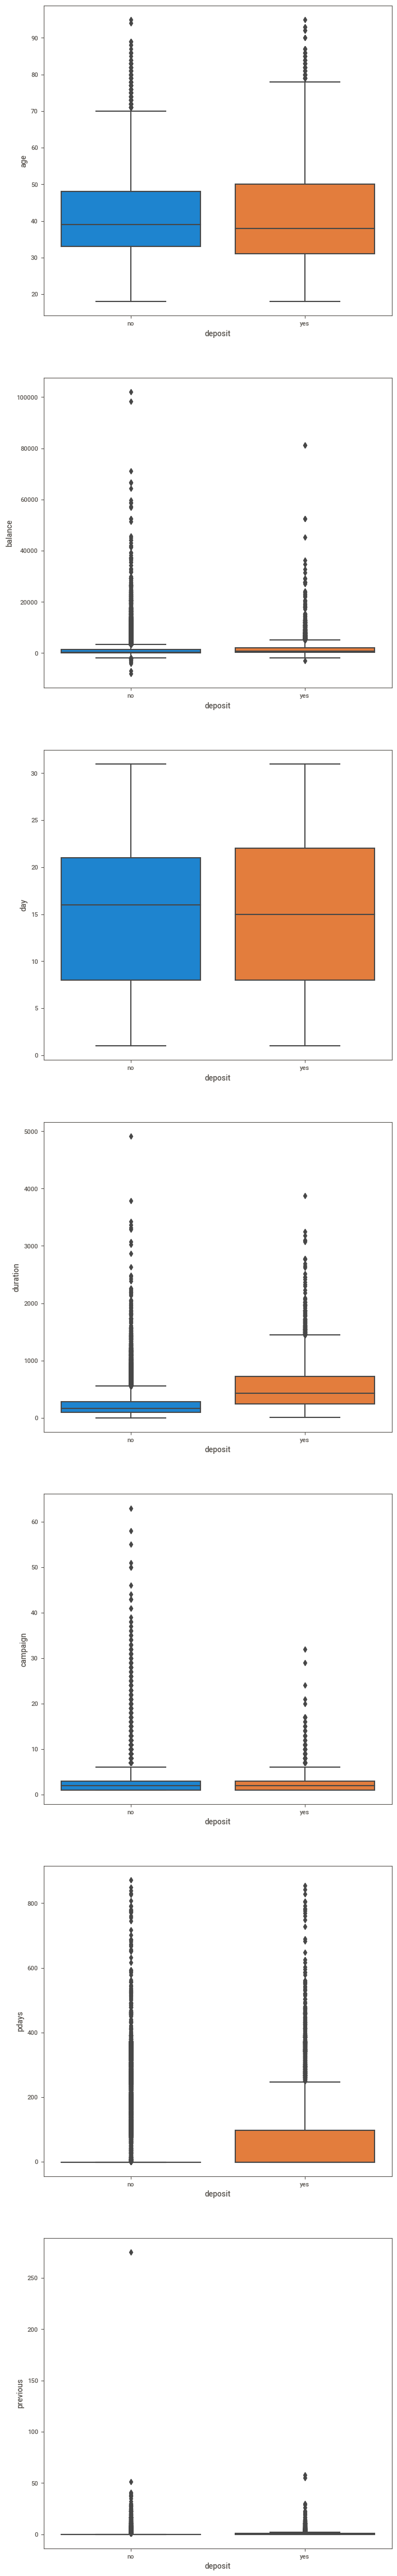

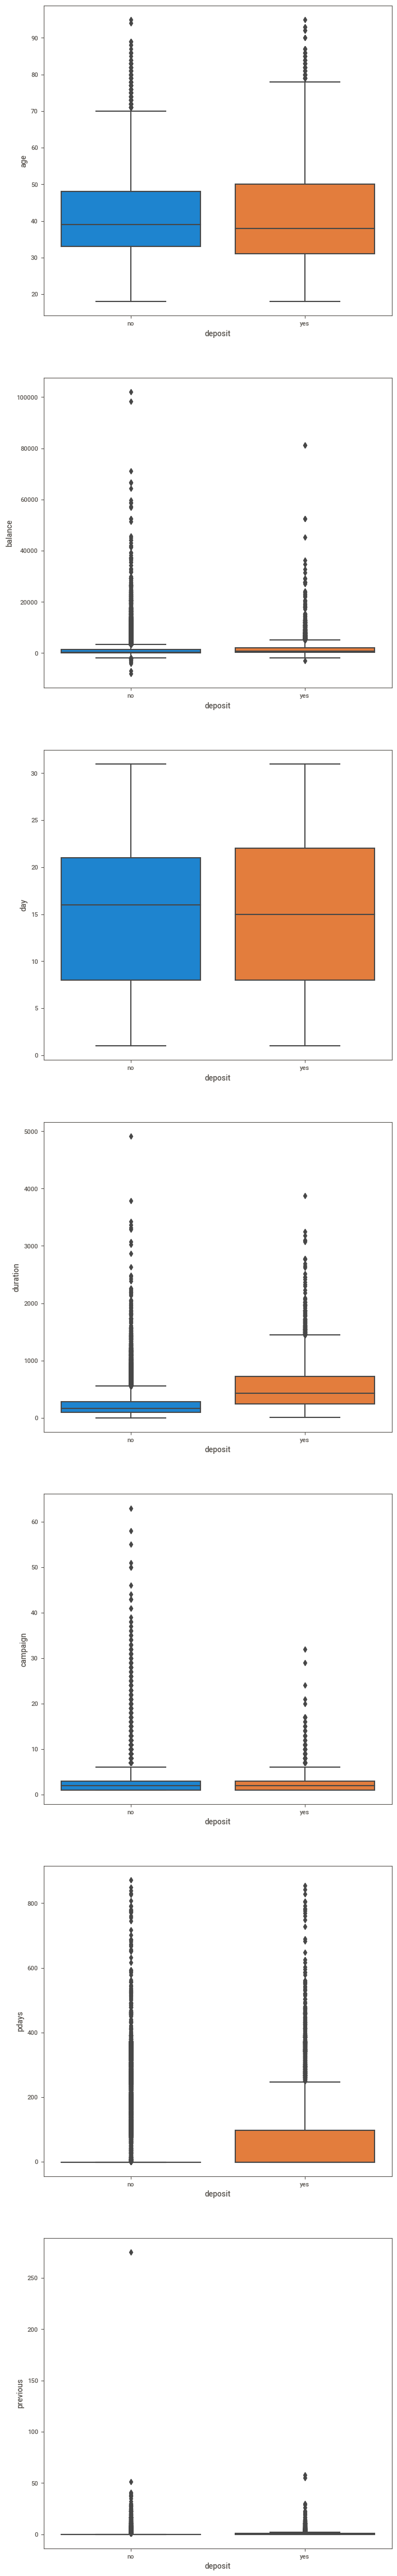

In [144]:
fig, axes = plt.subplots(7, 1, figsize=(8, 60))
for i, c in enumerate(num_var.columns):
  sns.boxplot(data=df,x='deposit',y=c,ax=axes[i])  

# for i in num_var.columns:
#   sns.boxplot(x = 'deposit', y = i, data = df)


In [159]:
#checking mising value
print(f"Missing value in job variable: {len(df[df['job'] == 'unknown'])}")
print(f"Missing value in marital variable: {len(df[df['marital'] == 'unknown'])}")
print(f"Missing value in education variable: {len(df[df['education'] == 'unknown'])}")
print(f"Missing value in default variable: {len(df[df['default'] == 'unknown'])}")
print(f"Missing value in housing variable: {len(df[df['housing'] == 'unknown'])}")
print(f"Missing value in loan variable: {len(df[df['loan'] == 'unknown'])}")
print(f"Missing value in contact variable: {len(df[df['contact'] == 'unknown'])}")
print(f"Missing value in month variable: {len(df[df['month'] == 'unknown'])}")
print(f"Missing value in poutcome variable: {len(df[df['poutcome'] == 'unknown'])}")

Missing value in job variable: 288
Missing value in marital variable: 0
Missing value in education variable: 1857
Missing value in default variable: 0
Missing value in housing variable: 0
Missing value in loan variable: 0
Missing value in contact variable: 13020
Missing value in month variable: 0
Missing value in poutcome variable: 36959
Missing value in job variable: 288
Missing value in marital variable: 0
Missing value in education variable: 1857
Missing value in default variable: 0
Missing value in housing variable: 0
Missing value in loan variable: 0
Missing value in contact variable: 13020
Missing value in month variable: 0
Missing value in poutcome variable: 36959


In [160]:
df.shape

(45211, 17)

(45211, 17)

In [161]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Checking correlation

<AxesSubplot:>

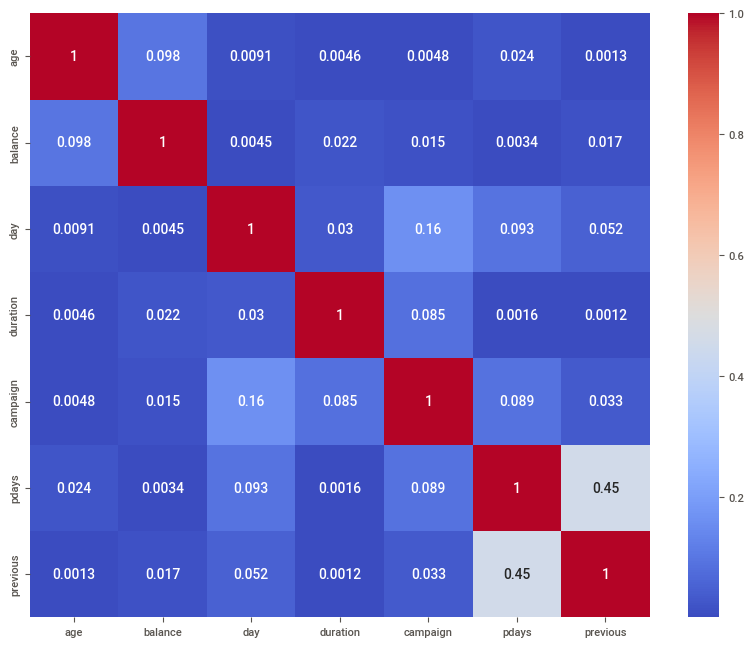

<AxesSubplot:>

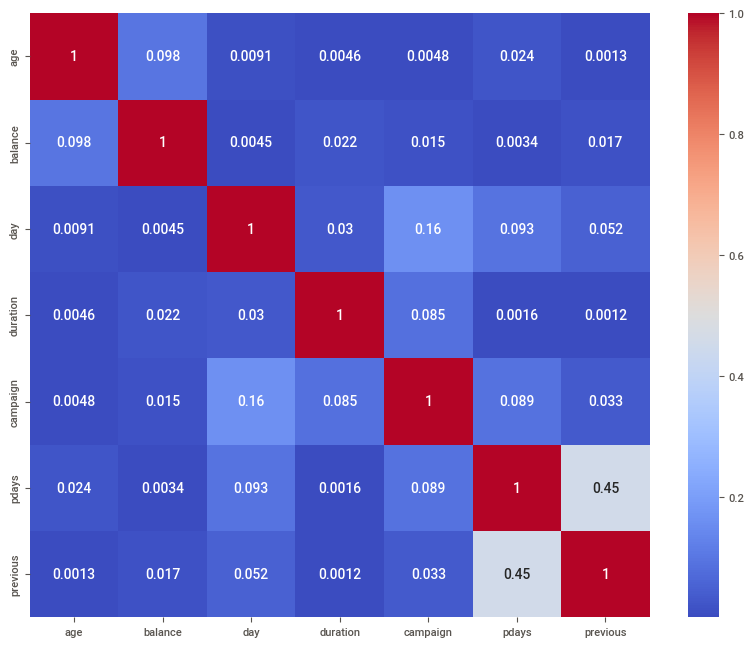

In [162]:
# Creating correlation heat map.
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [164]:
df2=df.copy()

In [165]:
#Changing Unknown values to mode
df2.loc[df2['education']=='unknown','education']=df['education'].mode().iloc[0]

In [166]:
df2.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33       unknown   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33       unknown   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [167]:
#changing unknwn value to mode
df2.loc[df2['job']=='unknown','job']=df2['job'].mode().iloc[0]

In [168]:
df2.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [169]:
# Dropping columns
df2.drop(['poutcome', 'contact','balance', 'duration'], axis=1, inplace=True)
df2.head()

age           job  marital  education default housing loan  day month  \
0   58    management  married   tertiary      no     yes   no    5   may   
1   44    technician   single  secondary      no     yes   no    5   may   
2   33  entrepreneur  married  secondary      no     yes  yes    5   may   
3   47   blue-collar  married  secondary      no     yes   no    5   may   
4   33   blue-collar   single  secondary      no      no   no    5   may   

   campaign  pdays  previous deposit  
0         1     -1         0      no  
1         1     -1         0      no  
2         1     -1         0      no  
3         1     -1         0      no  
4         1     -1         0      no

age           job  marital  education default housing loan  day month  \
0   58    management  married   tertiary      no     yes   no    5   may   
1   44    technician   single  secondary      no     yes   no    5   may   
2   33  entrepreneur  married  secondary      no     yes  yes    5   may   
3   47   blue-collar  married  secondary      no     yes   no    5   may   
4   33   blue-collar   single  secondary      no      no   no    5   may   

   campaign  pdays  previous deposit  
0         1     -1         0      no  
1         1     -1         0      no  
2         1     -1         0      no  
3         1     -1         0      no  
4         1     -1         0      no

In [170]:
df2.shape

(45211, 13)

(45211, 13)

# **Applying lable encoding and one hot encoding**

In [171]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
labled_col=['default','loan','housing','deposit']
for i in labled_col:
  df2[i]= label_encoder.fit_transform(df2[i])
  


In [172]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [173]:
df2.head()

age           job  marital  education  default  housing  loan  day month  \
0   58    management  married   tertiary        0        1     0    5   may   
1   44    technician   single  secondary        0        1     0    5   may   
2   33  entrepreneur  married  secondary        0        1     1    5   may   
3   47   blue-collar  married  secondary        0        1     0    5   may   
4   33   blue-collar   single  secondary        0        0     0    5   may   

   campaign  pdays  previous  deposit  
0         1     -1         0        0  
1         1     -1         0        0  
2         1     -1         0        0  
3         1     -1         0        0  
4         1     -1         0        0

age           job  marital  education  default  housing  loan  day month  \
0   58    management  married   tertiary        0        1     0    5   may   
1   44    technician   single  secondary        0        1     0    5   may   
2   33  entrepreneur  married  secondary        0        1     1    5   may   
3   47   blue-collar  married  secondary        0        1     0    5   may   
4   33   blue-collar   single  secondary        0        0     0    5   may   

   campaign  pdays  previous  deposit  
0         1     -1         0        0  
1         1     -1         0        0  
2         1     -1         0        0  
3         1     -1         0        0  
4         1     -1         0        0

In [174]:
# One hot encoding
df3= pd.get_dummies(df2, columns = ['job','marital','education','month'])

pd.set_option('display.max_columns', None)
df3.head()

age  default  housing  loan  day  campaign  pdays  previous  deposit  \
0   58        0        1     0    5         1     -1         0        0   
1   44        0        1     0    5         1     -1         0        0   
2   33        0        1     1    5         1     -1         0        0   
3   47        0        1     0    5         1     -1         0        0   
4   33        0        0     0    5         1     -1         0        0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                1                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0               0               0                 0                1   
1               1               0                 0                0   
2               0               0                 0                1   
3               0               0                 0                1   
4               0               0                 0                0   

   marital_single  education_primary  education_secondary  education_tertiary  \
0               0                  0                    0                   1   
1               1                  0                    1                   0   
2               0                  0                    1                   0   
3               0                  0                    1                   0   
4               1                  0                    1                   0   

   month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          1          0          0          0  
1          0          0          1          0          0          0  
2          0          0          1          0          0          0  
3          0          0          1          0          0          0  
4          0          0          1          0          0          0

age  default  housing  loan  day  campaign  pdays  previous  deposit  \
0   58        0        1     0    5         1     -1         0        0   
1   44        0        1     0    5         1     -1         0        0   
2   33        0        1     1    5         1     -1         0        0   
3   47        0        1     0    5         1     -1         0        0   
4   33        0        0     0    5         1     -1         0        0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                1                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0             0            0   
1               0            0                  0             0            0   
2               0            0                  0             0            0   
3               0            0                  0             0            0   
4               0            0                  0             0            0   

   job_technician  job_unemployed  marital_divorced  marital_married  \
0               0               0                 0                1   
1               1               0                 0                0   
2               0               0                 0                1   
3               0               0                 0                1   
4               0               0                 0                0   

   marital_single  education_primary  education_secondary  education_tertiary  \
0               0                  0                    0                   1   
1               1                  0                    1                   0   
2               0                  0                    1                   0   
3               0                  0                    1                   0   
4               1                  0                    1                   0   

   month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          1          0          0          0  
1          0          0          1          0          0          0  
2          0          0          1          0          0          0  
3          0          0          1          0          0          0  
4          0          0          1          0          0          0

In [175]:
df3.shape

(45211, 38)

(45211, 38)

In [176]:
# Droppig Excess column created by one hot encoding
df4 = df3.drop(['job_admin.','marital_divorced','education_primary', 'month_sep'], axis=1)
df4.shape

(45211, 34)

(45211, 34)

In [177]:
df4.head(1)

age  default  housing  loan  day  campaign  pdays  previous  deposit  \
0   58        0        1     0    5         1     -1         0        0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          1          0          0

age  default  housing  loan  day  campaign  pdays  previous  deposit  \
0   58        0        1     0    5         1     -1         0        0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          1          0          0

In [178]:
df5=df4.copy()

In [181]:
list(df5.columns)

['age',
 'default',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

['age',
 'default',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'deposit',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [182]:
column_names = ['age',
 'default',
 'housing',
 'loan',
 'day',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct','deposit']

In [183]:
df5 = df5.reindex(columns=column_names)

In [184]:
df5.head(1)

age  default  housing  loan  day  campaign  pdays  previous  \
0   58        0        1     0    5         1     -1         0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  deposit  
0          0          0          0          1          0          0        0

age  default  housing  loan  day  campaign  pdays  previous  \
0   58        0        1     0    5         1     -1         0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          0          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  deposit  
0          0          0          0          1          0          0        0

In [185]:
# Imporing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

# **Applying SMOT**

In [186]:
# Creating the dataset with all independent variables
X = df5.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = df5.iloc[:,-1]

print('x original=',X.shape)
print('y original=', Y.shape)

x original= (45211, 33)
y original= (45211,)
x original= (45211, 33)
y original= (45211,)


In [187]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [188]:
X_train

age  default  housing  loan  day  campaign  pdays  previous  \
22468   52        0        0     0   22         2     -1         0   
6896    50        0        1     0   28         1     -1         0   
28408   45        0        1     0   29         1    261         3   
8481    38        0        1     0    3         4     -1         0   
28753   31        0        0     0   30         1     -1         0   
...    ...      ...      ...   ...  ...       ...    ...       ...   
43723   50        0        0     0   14         3     -1         0   
32511   34        0        1     0   17         2     -1         0   
5192    48        0        0     0   21         6     -1         0   
12172   45        0        0     0   20        11     -1         0   
33003   45        0        1     0   17         2    336         2   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
22468                0                 0              0               1   
6896                 0                 0              0               0   
28408                1                 0              0               0   
8481                 0                 0              0               0   
28753                0                 0              0               0   
...                ...               ...            ...             ...   
43723                0                 0              0               0   
32511                0                 0              0               1   
5192                 0                 0              0               1   
12172                0                 0              0               0   
33003                1                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
22468            0                  0             0            0   
6896             0                  0             0            0   
28408            0                  0             0            0   
8481             0                  0             0            0   
28753            0                  0             1            0   
...            ...                ...           ...          ...   
43723            0                  0             0            0   
32511            0                  0             0            0   
5192             0                  0             0            0   
12172            0                  0             0            0   
33003            0                  0             0            0   

       job_technician  job_unemployed  marital_married  marital_single  \
22468               0               0                1               0   
6896                0               0                0               1   
28408               0               0                1               0   
8481                1               0                1               0   
28753               0               0                0               1   
...               ...             ...              ...             ...   
43723               1               0                1               0   
32511               0               0                0               0   
5192                0               0                1               0   
12172               0               0                1               0   
33003               0               0                1               0   

       education_secondary  education_tertiary  month_apr  month_aug  \
22468                    0                   1          0          1   
6896                     1                   0          0          0   
28408                    0                   0          0          0   
8481                     1                   0          0          0   
28753                    1                   0          0          0   
...                    ...                 ...        ...        ...   
43723                    0                   1         

age  default  housing  loan  day  campaign  pdays  previous  \
22468   52        0        0     0   22         2     -1         0   
6896    50        0        1     0   28         1     -1         0   
28408   45        0        1     0   29         1    261         3   
8481    38        0        1     0    3         4     -1         0   
28753   31        0        0     0   30         1     -1         0   
...    ...      ...      ...   ...  ...       ...    ...       ...   
43723   50        0        0     0   14         3     -1         0   
32511   34        0        1     0   17         2     -1         0   
5192    48        0        0     0   21         6     -1         0   
12172   45        0        0     0   20        11     -1         0   
33003   45        0        1     0   17         2    336         2   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
22468                0                 0              0               1   
6896                 0                 0              0               0   
28408                1                 0              0               0   
8481                 0                 0              0               0   
28753                0                 0              0               0   
...                ...               ...            ...             ...   
43723                0                 0              0               0   
32511                0                 0              0               1   
5192                 0                 0              0               1   
12172                0                 0              0               0   
33003                1                 0              0               0   

       job_retired  job_self-employed  job_services  job_student  \
22468            0                  0             0            0   
6896             0                  0             0            0   
28408            0                  0             0            0   
8481             0                  0             0            0   
28753            0                  0             1            0   
...            ...                ...           ...          ...   
43723            0                  0             0            0   
32511            0                  0             0            0   
5192             0                  0             0            0   
12172            0                  0             0            0   
33003            0                  0             0            0   

       job_technician  job_unemployed  marital_married  marital_single  \
22468               0               0                1               0   
6896                0               0                0               1   
28408               0               0                1               0   
8481                1               0                1               0   
28753               0               0                0               1   
...               ...             ...              ...             ...   
43723               1               0                1               0   
32511               0               0                0               0   
5192                0               0                1               0   
12172               0               0                1               0   
33003               0               0                1               0   

       education_secondary  education_tertiary  month_apr  month_aug  \
22468                    0                   1          0          1   
6896                     1                   0          0          0   
28408                    0                   0          0          0   
8481                     1                   0          0          0   
28753                    1                   0          0          0   
...                    ...                 ...        ...        ...   
43723                    0                   1         

In [189]:
Y_train

22468    0
6896     0
28408    0
8481     0
28753    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: deposit, Length: 36168, dtype: int64

22468    0
6896     0
28408    0
8481     0
28753    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: deposit, Length: 36168, dtype: int64

In [190]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    31929
1     4239
Name: deposit, dtype: int64

 Distribution of classes of dependent variable in test :
0    7993
1    1050
Name: deposit, dtype: int64
Distribution of classes of dependent variable in train :
0    31929
1     4239
Name: deposit, dtype: int64

 Distribution of classes of dependent variable in test :
0    7993
1    1050
Name: deposit, dtype: int64


In [191]:
# Applying SMOT
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, Y_train)




print('x after SMOTE=',x_smote.shape)
print('y after SMOTE=', y_smote.shape)

x after SMOTE= (63858, 33)
y after SMOTE= (63858,)
x after SMOTE= (63858, 33)
y after SMOTE= (63858,)


In [192]:
y_smote.value_counts()

0    31929
1    31929
Name: deposit, dtype: int64

0    31929
1    31929
Name: deposit, dtype: int64

In [193]:
pd.DataFrame(x_smote).head()

age  default  housing  loan  day  campaign  pdays  previous  \
0   52        0        0     0   22         2     -1         0   
1   50        0        1     0   28         1     -1         0   
2   45        0        1     0   29         1    261         3   
3   38        0        1     0    3         4     -1         0   
4   31        0        0     0   30         1     -1         0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   
1                0                 0              0               0   
2                1                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               0   
2            0                  0             0            0               0   
3            0                  0             0            0               1   
4            0                  0             1            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   
1               0                0               1                    1   
2               0                1               0                    0   
3               0                1               0                    1   
4               0                0               1                    1   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          1          0          0          0   
1                   0          0          0          0          0          0   
2                   0          0          0          0          0          1   
3                   0          0          0          0          0          0   
4                   0          0          0          0          0          1   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          0          0          0  
1          0          0          0          1          0          0  
2          0          0          0          0          0          0  
3          0          1          0          0          0          0  
4          0          0          0          0          0          0

age  default  housing  loan  day  campaign  pdays  previous  \
0   52        0        0     0   22         2     -1         0   
1   50        0        1     0   28         1     -1         0   
2   45        0        1     0   29         1    261         3   
3   38        0        1     0    3         4     -1         0   
4   31        0        0     0   30         1     -1         0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   
1                0                 0              0               0   
2                1                 0              0               0   
3                0                 0              0               0   
4                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             0            0               0   
2            0                  0             0            0               0   
3            0                  0             0            0               1   
4            0                  0             1            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   
1               0                0               1                    1   
2               0                1               0                    0   
3               0                1               0                    1   
4               0                0               1                    1   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          1          0          0          0   
1                   0          0          0          0          0          0   
2                   0          0          0          0          0          1   
3                   0          0          0          0          0          0   
4                   0          0          0          0          0          1   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          0          0          0  
1          0          0          0          1          0          0  
2          0          0          0          0          0          0  
3          0          1          0          0          0          0  
4          0          0          0          0          0          0

#**Scaling the data**

In [194]:
x_smote.columns

Index(['age', 'default', 'housing', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

Index(['age', 'default', 'housing', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

In [195]:
scaled_column=['age','day', 'campaign', 'pdays','previous']

In [196]:
from sklearn.preprocessing import StandardScaler

features = x_smote[scaled_column]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

x_smote[scaled_column]= features

In [197]:
pd.DataFrame(x_smote).head(1)

age  default  housing  loan       day  campaign     pdays  previous  \
0  0.925075        0        0     0  0.794524 -0.135435 -0.485245 -0.335431   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          1          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          0          0          0

age  default  housing  loan       day  campaign     pdays  previous  \
0  0.926336        0        0     0  0.794947 -0.136107 -0.486749 -0.336535   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0                0                 0              0               1   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   

   job_unemployed  marital_married  marital_single  education_secondary  \
0               0                1               0                    0   

   education_tertiary  month_apr  month_aug  month_dec  month_feb  month_jan  \
0                   1          0          1          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  
0          0          0          0          0          0          0

In [198]:
pd.DataFrame(X_test).head(1)

age  default  housing  loan  day  campaign  pdays  previous  \
3610   42        0        1     0   15         4     -1         0   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
3610                1                 0              0               0   

      job_retired  job_self-employed  job_services  job_student  \
3610            0                  0             0            0   

      job_technician  job_unemployed  marital_married  marital_single  \
3610               0               0                1               0   

      education_secondary  education_tertiary  month_apr  month_aug  \
3610                    0                   0          0          0   

      month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
3610          0          0          0          0          0          0   

      month_may  month_nov  month_oct  
3610          1          0          0

age  default  housing  loan  day  campaign  pdays  previous  \
3610   42        0        1     0   15         4     -1         0   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
3610                1                 0              0               0   

      job_retired  job_self-employed  job_services  job_student  \
3610            0                  0             0            0   

      job_technician  job_unemployed  marital_married  marital_single  \
3610               0               0                1               0   

      education_secondary  education_tertiary  month_apr  month_aug  \
3610                    0                   0          0          0   

      month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  \
3610          0          0          0          0          0          0   

      month_may  month_nov  month_oct  
3610          1          0          0

# **Applying Logistic Regression**

In [199]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_smote, y_smote)

LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [200]:
# Get the model coefficients
clf.coef_

array([[-0.36657672, -1.17789366, -1.05186406, -1.15311472, -0.04930122,
        -0.39865817,  0.09276409,  0.0478812 , -2.23374139, -2.68355589,
        -3.30957198, -1.8319375 , -1.34249445, -2.4345834 , -2.04899693,
        -1.71420682, -1.98495819, -2.39482914, -1.23073412, -1.21592118,
        -1.24471443, -0.89495476, -3.67349048, -4.20034137, -3.08050079,
        -4.29680876, -4.98634538, -4.26528189, -4.38596177, -2.79819484,
        -4.30060961, -4.33296591, -2.95026506]])

array([[-0.3406997 , -1.22227577, -1.05594324, -1.17517246, -0.04720525,
        -0.39814445,  0.09847722,  0.04965725, -2.21095605, -2.67826308,
        -3.27688853, -1.79028176, -1.34686631, -2.45235833, -2.08990401,
        -1.64409082, -1.95558299, -2.38680392, -1.20512923, -1.15401826,
        -1.23992781, -0.90805138, -3.63004277, -4.18614185, -3.17677578,
        -4.25546469, -4.94082094, -4.27988277, -4.42176552, -2.85005311,
        -4.2596376 , -4.27728785, -3.01845555]])

In [201]:
clf.intercept_

array([7.23035979])

array([7.16678857])

In [202]:
# Get the predicted probabilities
train_preds = clf.predict_proba(x_smote)
test_preds = clf.predict_proba(X_test)

In [203]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [204]:
# Get the predicted classes
train_class_preds = clf.predict(x_smote)
test_class_preds = clf.predict(X_test)

In [205]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_smote)
test_accuracy = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8694447054401955
The accuracy on test data is  0.8178701758266063
The accuracy on train data is  0.87054088759435
The accuracy on test data is  0.8112352095543515


In [206]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [207]:
print('ROCAUC score:', roc_auc_score(test_class_preds, Y_test))
print('Accuracy score:', accuracy_score(test_class_preds, Y_test))
ROCAUC_score_LR= roc_auc_score(test_class_preds, Y_test)
accuracy_score_LR= accuracy_score(test_class_preds, Y_test)

ROCAUC score: 0.5387385782909611
Accuracy score: 0.8178701758266063
ROCAUC score: 0.5430923158416205
Accuracy score: 0.8112352095543515


Logistic regression Hyperparameter tuning


In [208]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [209]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

model = LogisticRegression()

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_smote, y_smote)

In [210]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.869163 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best: 0.870489 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [211]:
clf = LogisticRegression(C=0.1,  penalty='l2', solver='liblinear')
clf.fit(x_smote, y_smote)

LogisticRegression(C=0.1, solver='liblinear')

LogisticRegression(C=0.1, solver='liblinear')

In [212]:
train_preds = clf.predict(x_smote)
test_preds = clf.predict(X_test)




In [213]:
print('ROCAUC score_train:', roc_auc_score(train_preds, y_smote))
print('ROCAUC score_test:', roc_auc_score(test_preds, Y_test))
print('Accuracy score_train:', accuracy_score(train_preds, y_smote))
print('Accuracy score_test:', accuracy_score(test_preds, Y_test))
ROCAUC_score_LR= roc_auc_score(test_preds, Y_test)
accuracy_score_LR= accuracy_score(test_preds, Y_test)

ROCAUC score_train: 0.8721117105522267
ROCAUC score_test: 0.5384924380401787
Accuracy score_train: 0.8684738012465157
Accuracy score_test: 0.815990268716134
ROCAUC score_train: 0.8740070839672301
ROCAUC score_test: 0.5425152686975038
Accuracy score_train: 0.8704312693789346
Accuracy score_test: 0.8105717129271259


# **DECISION TREES**

In [214]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(x_smote, y_smote)
dtreepred_train = dtree.predict(x_smote)
dtreepred_test = dtree.predict(X_test)

In [215]:
print('ROCAUC score_train:', roc_auc_score(dtreepred_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(dtreepred_test, Y_test))
print('Accuracy score_train:', accuracy_score(dtreepred_train, y_smote))
print('Accuracy score_test:', accuracy_score(dtreepred_test, Y_test))
ROCAUC_score_DT= roc_auc_score(dtreepred_test, Y_test)
accuracy_score_DT= accuracy_score(dtreepred_test, Y_test)

ROCAUC score_train: 0.996086005823647
ROCAUC score_test: 0.5282436952029678
Accuracy score_train: 0.9960850637351624
Accuracy score_test: 0.6928010615946035
ROCAUC score_train: 0.9960545227811569
ROCAUC score_test: 0.5366544693323246
Accuracy score_train: 0.9960537442450437
Accuracy score_test: 0.7158022780050868


# **RANDOM FOREST**

In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(x_smote, y_smote)
rfcpred_train = rfc.predict(x_smote)
rfcpred_test = rfc.predict(X_test)

In [217]:
print('ROCAUC score_train:', roc_auc_score(rfcpred_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(rfcpred_test, Y_test))
print('Accuracy score_train:', accuracy_score(rfcpred_train, y_smote))
print('Accuracy score_test:', accuracy_score(rfcpred_test, Y_test))
ROCAUC_score_RF= roc_auc_score(rfcpred_test, Y_test)
accuracy_score_RF= accuracy_score(rfcpred_test, Y_test)

ROCAUC score_train: 0.9960855016890748
ROCAUC score_test: 0.6587745629603504
Accuracy score_train: 0.9960850637351624
Accuracy score_test: 0.8786906999889417
ROCAUC score_train: 0.9960541821713066
ROCAUC score_test: 0.6550160200417785
Accuracy score_train: 0.9960537442450437
Accuracy score_test: 0.8781377861329205


Hyperparameter tuning

In [218]:
from sklearn.model_selection import RandomizedSearchCV
import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint.pprint(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [219]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =10 , cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [220]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [221]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)

In [222]:
from sklearn.ensemble import RandomForestClassifier
rfc_random = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)#criterion = entopy,gini
rfc_random.fit(x_smote, y_smote)
rfcpred_train_random = rfc_random.predict(x_smote)
rfcpred_test_random = rfc_random.predict(X_test)

In [223]:
print('ROCAUC score_train_randomcv:', roc_auc_score(rfcpred_train_random, y_smote))
print('ROCAUC score_test_randomcv:', roc_auc_score(rfcpred_test_random, Y_test))
print('Accuracy score_train_randomcv:', accuracy_score(rfcpred_train_random, y_smote))
print('Accuracy score_test_randomcv:', accuracy_score(rfcpred_test_random, Y_test))
ROCAUC_score_RF= roc_auc_score(rfcpred_test_random, Y_test)
accuracy_score_RF= accuracy_score(rfcpred_test_random, Y_test)

ROCAUC score_train_randomcv: 0.9764590284093024
ROCAUC score_test_randomcv: 0.6424517202207075
Accuracy score_train_randomcv: 0.9761658680196686
Accuracy score_test_randomcv: 0.8793541966161672
ROCAUC score_train_randomcv: 0.9765775331453521
ROCAUC score_test_randomcv: 0.6626447189544408
Accuracy score_train_randomcv: 0.9763068057252028
Accuracy score_test_randomcv: 0.8812341037266394


XGBOOST



In [224]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_smote, y_smote)
xgbprd_train = xgb.predict(x_smote)
xgbprd_test = xgb.predict(X_test)

In [225]:
print('ROCAUC score_train:', roc_auc_score(xgbprd_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(xgbprd_test, Y_test))
print('Accuracy score_train:', accuracy_score(xgbprd_train, y_smote))
print('Accuracy score_test:', accuracy_score(xgbprd_test, Y_test))
ROCAUC_score_XG= roc_auc_score(xgbprd_test, Y_test)
accuracy_score_XG= accuracy_score(xgbprd_test, Y_test)

ROCAUC score_train: 0.8710476452289941
ROCAUC score_test: 0.6406108323480948
Accuracy score_train: 0.8694133859500768
Accuracy score_test: 0.8619927015371005
ROCAUC score_train: 0.8739426644777863
ROCAUC score_test: 0.6206819090118284
Accuracy score_train: 0.8720442231200476
Accuracy score_test: 0.8448523720004424


CATBoost

In [226]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
from catboost import CatBoostClassifier
catbst = CatBoostClassifier()
catbst.fit(x_smote, y_smote)
catbstprd_train = catbst.predict(x_smote)
catbstprd_test = catbst.predict(X_test)

Learning rate set to 0.06078
0:	learn: 0.6715727	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.6514361	total: 77.7ms	remaining: 38.8s
2:	learn: 0.6354634	total: 91.6ms	remaining: 30.4s
3:	learn: 0.6204456	total: 106ms	remaining: 26.5s
4:	learn: 0.6073200	total: 124ms	remaining: 24.7s
5:	learn: 0.5956154	total: 139ms	remaining: 23s
6:	learn: 0.5811545	total: 153ms	remaining: 21.7s
7:	learn: 0.5686078	total: 166ms	remaining: 20.5s
8:	learn: 0.5591561	total: 179ms	remaining: 19.7s
9:	learn: 0.5498224	total: 197ms	remaining: 19.5s
10:	learn: 0.5425856	total: 211ms	remaining: 19s
11:	learn: 0.5353545	total: 224ms	remaining: 18.4s
12:	learn: 0.5253926	total: 237ms	remaining: 18s
13:	learn: 0.5186032	total: 253ms	remaining: 17.8s
14:	learn: 0.5102082	total: 266ms	remaining: 17.5s
15:	learn: 0.5024049	total: 280ms	remaining: 17.2s
16:	learn: 0.4970572	total: 294ms	remaining: 17s
17:	learn: 0.4921395	total: 310ms	remaining: 16.9s
18:	learn: 0.4857721	total: 325ms	remaining: 16.8s
19:	learn: 0.4816

In [228]:
print('ROCAUC score_train:', roc_auc_score(catbstprd_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(catbstprd_test, Y_test))
print('Accuracy score_train:', accuracy_score(catbstprd_train, y_smote))
print('Accuracy score_test:', accuracy_score(catbstprd_test, Y_test))
ROCAUC_score_catbst= roc_auc_score(catbstprd_test, Y_test)
accuracy_score_catbst= accuracy_score(catbstprd_test, Y_test)

ROCAUC score_train: 0.9156513715219082
ROCAUC score_test: 0.5606613935715784
Accuracy score_train: 0.9140123398791068
Accuracy score_test: 0.855025986951233
ROCAUC score_train: 0.9155279755982288
ROCAUC score_test: 0.5681284995969477
Accuracy score_train: 0.9138714021735727
Accuracy score_test: 0.8462899480260976


GRADIENT BOOSTING

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(x_smote, y_smote)
gbkpred_train = gbk.predict(x_smote)
gbkpred_test = gbk.predict(X_test)

In [230]:
print('ROCAUC score_train:', roc_auc_score(gbkpred_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(gbkpred_test, Y_test))
print('Accuracy score_train:', accuracy_score(gbkpred_train, y_smote))
print('Accuracy score_test:', accuracy_score(gbkpred_test, Y_test))
ROCAUC_score_GB= roc_auc_score(gbkpred_test, Y_test)
accuracy_score_GB= accuracy_score(gbkpred_test, Y_test)

ROCAUC score_train: 0.87197162134452
ROCAUC score_test: 0.6406624773276317
Accuracy score_train: 0.8700397757524507
Accuracy score_test: 0.8596704633418113
ROCAUC score_train: 0.8733379615542229
ROCAUC score_test: 0.6377824616163201
Accuracy score_train: 0.8711985968868426
Accuracy score_test: 0.8581223045449519


KNN

In [231]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# model = KNeighborsClassifier()
# n_neighbors =range(1,2) 
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']

# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(x_smote, y_smote)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [232]:

classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_smote, y_smote)
classifier_train=classifier.predict(x_smote)
classifer_test=classifier.predict(X_test)

In [233]:
print('ROCAUC score_train:', roc_auc_score(classifier_train, y_smote))
print('ROCAUC score_test:', roc_auc_score(classifer_test, Y_test))
print('Accuracy score_train:', accuracy_score(classifier_train, y_smote))
print('Accuracy score_test:', accuracy_score(classifer_test, Y_test))
ROCAUC_score_KNN= roc_auc_score(classifer_test, Y_test)
accuracy_score_KNN= accuracy_score(classifer_test, Y_test)

ROCAUC score_train: 0.9123457307912907
ROCAUC score_test: 0.5380602548453702
Accuracy score_train: 0.912054871746688
Accuracy score_test: 0.12606435917284087
ROCAUC score_train: 0.9112977876382465
ROCAUC score_test: 0.48652306124723377
Accuracy score_train: 0.9110839675530082
Accuracy score_test: 0.12164104832467101


In [234]:
column_labels = ['classifier','accuracy','ROC-AUC']


In [235]:
df_1 = pd.DataFrame([['LogisticRegression',accuracy_score_LR,ROCAUC_score_LR,]],columns =column_labels )
df_2=  pd.DataFrame([['DecisionTree',accuracy_score_DT,ROCAUC_score_DT,]],columns =column_labels )
df_3 = pd.DataFrame([['RandomForest',accuracy_score_RF,ROCAUC_score_RF,]],columns =column_labels )
df_4 = pd.DataFrame([['XGBoost',accuracy_score_XG,ROCAUC_score_XG,]],columns =column_labels )
df_5 = pd.DataFrame([['CATBoost',accuracy_score_catbst,ROCAUC_score_catbst]],columns =column_labels)
df_6 = pd.DataFrame([['GradientBoosting',accuracy_score_GB,ROCAUC_score_GB,]],columns =column_labels )
df_7 = pd.DataFrame([['KNN',accuracy_score_KNN,ROCAUC_score_KNN,]],columns =column_labels )

In [236]:
combined_dataframe= pd.concat([df_1, df_2, df_3, df_4, df_5,df_6,df_7])
combined_dataframe.reset_index(drop = True, inplace = True)
combined_dataframe


classifier  accuracy   ROC-AUC
0  LogisticRegression  0.815990  0.538492
1        DecisionTree  0.692801  0.528244
2        RandomForest  0.879354  0.642452
3             XGBoost  0.861993  0.640611
4            CATBoost  0.855026  0.560661
5    GradientBoosting  0.859670  0.640662
6                 KNN  0.126064  0.538060

classifier  accuracy   ROC-AUC
0  LogisticRegression  0.810572  0.542515
1        DecisionTree  0.715802  0.536654
2        RandomForest  0.881234  0.662645
3             XGBoost  0.844852  0.620682
4            CATBoost  0.846290  0.568128
5    GradientBoosting  0.858122  0.637782
6                 KNN  0.121641  0.486523